In [43]:
import pandas as pd
# Source: https://data.gov.sg/dataset/resale-flat-prices

hdb_resale = pd.read_csv('./resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
hdb_resale

month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
121469  2022-03      YISHUN     5 ROOM  504C       YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN     5 ROOM  501B       YISHUN ST 51     07 TO 09   
121471  2022-03      YISHUN     5 ROOM   820       YISHUN ST 81     07 TO 09   
121472  2022-03      YISHUN  EXECUTIVE   359     YISHUN RING RD     01 TO 03   
121473  2022-03      YISHUN  EXECUTIVE   277       YISHUN ST 22     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  \
0                 44.0        Improved                 1979   
1                 67.0  New Generation                 1978   
2                 67.0  New Generation                 1980   
3                 68.0  New Generation                 1980   
4                 67.0  New Generation                 1980   
...                ...             ...                  ...   
121469           112.0        Improved                 2016   
121470           112.0        Improved                 2018   
121471           122.0        Improved                 1988   
121472           145.0       Apartment                 1988   
121473           146.0      Maisonette                 1985   

           remaining_lease  resale_price  
0       61 years 04 months      232000.0  
1       60 years 07 months      250000.0  
2       62 years 05 months      262000.0  
3        62 years 01 month      265000.0  
4       62 years 05 months      265000.0  
...                    ...           ...  
121469   93 years 01 month      630000.0  
121470  94 years 11 months      652000.0  
121471  65 years 06 months      585000.0  
121472  65 years 05 months      682000.0  
121473  62 years 06 months      788000.0  

[121474 rows x 11 columns]

In [42]:
# Get indexes where lease_commence_date > 2010
indexNames = hdb_resale[hdb_resale['lease_commence_date'] < 2010].index
hdb_resale.drop(indexNames, inplace=True)

hdb_resale

month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  
46          688000.0  
47          730000.0  
48          756000.0  
53          770000.0  
54          832000.0  
...              ...  
121460      490000.0  
121461      510000.0  
121468      710000.0  
121469      630000.0  
121470      652000.0  

[27021 rows x 11 columns]

In [2]:
def convert_remaining_lease():
  for i in range(len(hdb_resale['remaining_lease'])):
    arr = hdb_resale['remaining_lease'].iloc[i].split(' ')
    year = int(arr[0])
    month = None
    if len(arr) > 2:
      month = int(arr[2])
      year = year + month / 12
    hdb_resale['remaining_lease_year'].iloc[i] = year

hdb_resale['remaining_lease_year'] = 0
convert_remaining_lease()
hdb_resale

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  
46          688000.0             93.666667  
47          730000.0             93.583333  
48          756000.0             93.583333  
53          770000.0             93.583333  
54          832000.0             94.666667  
...              ...                   ...  
121460      490000.0             93.083333  
121461      510000.0             94.916667  
121468      710000.0             94.916667  
121469      630000.0             93.083333  
121470      652000.0             94.916667  

[27021 rows x 12 columns]

In [3]:
def convert_month():
  for i in range(len(hdb_resale['month'])):
    arr = hdb_resale['month'].iloc[i].split('-')
    year = int(arr[0])
    month = int(arr[1])
    hdb_resale['month_extract'].iloc[i] = month
    hdb_resale['year_extract'].iloc[i] = year

hdb_resale['month_extract'] = 0
hdb_resale['year_extract'] = 0
convert_month()
hdb_resale

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  month_extract  year_extract  
46          688000.0             93.666667              1          2017  
47          730000.0             93.583333              1          2017  
48          756000.0             93.583333              1          2017  
53          770000.0             93.583333              1          2017  
54          832000.0             94.666667              1          2017  
...              ...                   ...            ...           ...  
121460      490000.0             93.083333              3          2022  
121461      510000.0             94.916667              3          2022  
121468      710000.0             94.916667              3          2022  
121469      630000.0             93.083333              3          2022  
121470      652000.0             94.916667              3          2022  

[27021 rows x 14 columns]

In [4]:
def convert_flat_type():
  for i in range(len(hdb_resale['flat_type'])):
    hdb_resale['flat_type_room'].iloc[i] = int(hdb_resale['flat_type'].iloc[i].split(' ')[0])

hdb_resale['flat_type_room'] = 0
convert_flat_type()
hdb_resale

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  month_extract  year_extract  \
46          688000.0             93.666667              1          2017   
47          730000.0             93.583333              1          2017   
48          756000.0             93.583333              1          2017   
53          770000.0             93.583333              1          2017   
54          832000.0             94.666667              1          2017   
...              ...                   ...            ...           ...   
121460      490000.0             93.083333              3          2022   
121461      510000.0             94.916667              3          2022   
121468      710000.0             94.916667              3          2022   
121469      630000.0             93.083333              3          2022   
121470      652000.0             94.916667              3          2022   

        flat_type_room  
46                   4  
47                   4  
48                   4  
53                   5  
54                   5  
...                ...  
121460               4  
121461               4  
121468               5  
121469               5  
121470               5  

[27021 rows x 15 columns]

In [5]:
def convert_flat_model():
  hdb_resale["flat_model"] = hdb_resale["flat_model"].astype('category')
  hdb_resale["flat_model_cat"] = hdb_resale["flat_model"].cat.codes

convert_flat_model()
hdb_resale

month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  month_extract  year_extract  \
46          688000.0             93.666667              1          2017   
47          730000.0             93.583333              1          2017   
48          756000.0             93.583333              1          2017   
53          770000.0             93.583333              1          2017   
54          832000.0             94.666667              1          2017   
...              ...                   ...            ...           ...   
121460      490000.0             93.083333              3          2022   
121461      510000.0             94.916667              3          2022   
121468      710000.0             94.916667              3          2022   
121469      630000.0             93.083333              3          2022   
121470      652000.0             94.916667              3          2022   

        flat_type_room  flat_model_cat  
46                   4               1  
47                   4               1  
48                   4               1  
53                   5               1  
54                   5               2  
...                ...             ...  
121460               4               3  
121461               4               3  
121468               5               2  
121469               5               2  
121470               5               2  

[27021 rows x 16 columns]

In [6]:
def convert_storey_range():
  hdb_resale["storey_range"] = hdb_resale["storey_range"].astype('category')
  hdb_resale["storey_range_cat"] = hdb_resale["storey_range"].cat.codes

convert_storey_range()
hdb_resale

month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  month_extract  year_extract  \
46          688000.0             93.666667              1          2017   
47          730000.0             93.583333              1          2017   
48          756000.0             93.583333              1          2017   
53          770000.0             93.583333              1          2017   
54          832000.0             94.666667              1          2017   
...              ...                   ...            ...           ...   
121460      490000.0             93.083333              3          2022   
121461      510000.0             94.916667              3          2022   
121468      710000.0             94.916667              3          2022   
121469      630000.0             93.083333              3          2022   
121470      652000.0             94.916667              3          2022   

        flat_type_room  flat_model_cat  storey_range_cat  
46                   4               1                 4  
47                   4               1                 6  
48                   4               1                 7  
53                   5               1                 3  
54                   5               2                 3  
...                ...             ...               ...  
121460               4               3                 3  
121461               4               3                 1  
121468               5               2                 3  
121469               5               2                 3  
121470               5               2                 2  

[27021 rows x 17 columns]

In [7]:
def convert_town():
  hdb_resale["town"] = hdb_resale["town"].astype('category')
  hdb_resale["town_cat"] = hdb_resale["town"].cat.codes

convert_town()
hdb_resale

month        town flat_type block       street_name storey_range  \
46      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
47      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
48      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
53      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
54      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...         ...         ...       ...   ...               ...          ...   
121460  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
121461  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
121468  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
121469  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
121470  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
46                90.0       DBSS                 2011  93 years 08 months   
47                91.0       DBSS                 2011  93 years 07 months   
48                91.0       DBSS                 2011  93 years 07 months   
53               112.0       DBSS                 2011  93 years 07 months   
54               121.0   Improved                 2012  94 years 08 months   
...                ...        ...                  ...                 ...   
121460            92.0    Model A                 2016   93 years 01 month   
121461            92.0    Model A                 2018  94 years 11 months   
121468           112.0   Improved                 2018  94 years 11 months   
121469           112.0   Improved                 2016   93 years 01 month   
121470           112.0   Improved                 2018  94 years 11 months   

        resale_price  remaining_lease_year  month_extract  year_extract  \
46          688000.0             93.666667              1          2017   
47          730000.0             93.583333              1          2017   
48          756000.0             93.583333              1          2017   
53          770000.0             93.583333              1          2017   
54          832000.0             94.666667              1          2017   
...              ...                   ...            ...           ...   
121460      490000.0             93.083333              3          2022   
121461      510000.0             94.916667              3          2022   
121468      710000.0             94.916667              3          2022   
121469      630000.0             93.083333              3          2022   
121470      652000.0             94.916667              3          2022   

        flat_type_room  flat_model_cat  storey_range_cat  town_cat  
46                   4               1                 4         0  
47                   4               1                 6         0  
48                   4               1                 7         0  
53                   5               1                 3         0  
54                   5               2                 3         0  
...                ...             ...               ...       ...  
121460               4               3                 3        22  
121461               4               3                 1        22  
121468               5               2                 3        22  
121469               5               2                 3        22  
121470               5               2                 2        22  

[27021 rows x 18 columns]

In [8]:
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

def get_location(geocode):
  count = 0
  for i in range(len(hdb_resale['block'])):
    addr = hdb_resale['block'].iloc[i] + ", " + hdb_resale['street_name'].iloc[i]
    location = geocoder.geocode(addr)
    if location != None:
      print( str(count) + ".Location: " + str(location) + "|  Latitude: " + str(location.latitude) + ", Longitude: " + str(location.longitude))
      hdb_resale['latitude'].iloc[i] = location.latitude
      hdb_resale['longitude'].iloc[i] = location.longitude
    else:
      hdb_resale['latitude'].iloc[i] = 0
      hdb_resale['longitude'].iloc[i] = 0
    count += 1

hdb_resale['latitude'] = 0
hdb_resale['longitude'] = 0
geocoder = Nominatim(user_agent = 'Stat_proj')
get_location(geocoder)
hdb_resale.to_csv('hdb_resale_from_2017.csv', encoding='utf-8')

     |████████████████████████████████| 118 kB 9.5 MB/s eta 0:00:01
0.Location: 588C, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3718687, Longitude: 103.85348335


/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
2.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
3.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
4.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
5.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Singapore|  Latitude: 1.3255396, Longitude: 103.93449480974203
6.Location: 219C, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 463219, Singapore|  Latitude: 1.3248322, Longitude: 103.93355969492295
7.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.84337

59.Location: Punggol Regalia, 273C, Punggol Place, Punggol, Singapore, Northeast, 823273, Singapore|  Latitude: 1.4022354, Longitude: 103.901273676367
60.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
61.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
62.Location: Punggol Sapphire, 270C, Punggol Field, Punggol, Singapore, Northeast, 823270, Singapore|  Latitude: 1.4042572, Longitude: 103.89877514710687
63.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
64.Location: 489, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4550756, Longitude: 103.81686057668045
65.Location: 441B, Fernvale Road, Seng Kang, Singapore, Central, 797653, Singapore|  Latitude: 1.3912318, Longitude: 103.87466216864996
66.Location: 441A, Fernvale Road, Seng Kang, Si

117.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
118.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
119.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
120.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
121.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
122.Location: 476B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682476, Singapore|  Latitude: 1.3770467499999999, Longitude: 103.7376158922925
123.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683476, Singapore|  Latitude: 1.3773428, Lon

177.Location: 441A, Fernvale Road, Seng Kang, Singapore, Central, 797653, Singapore|  Latitude: 1.3912104, Longitude: 103.8753123966421
178.Location: 436B, Fernvale Road, Seng Kang, Singapore, Central, 792436, Singapore|  Latitude: 1.39283015, Longitude: 103.87686562982182
179.Location: 439B, Sengkang West Avenue, Seng Kang, Singapore, Central, 792439, Singapore|  Latitude: 1.39206055, Longitude: 103.87828758536898
180.Location: 441C, Fernvale Road, Seng Kang, Singapore, Central, 793441, Singapore|  Latitude: 1.3921700499999998, Longitude: 103.87468120706387
181.Location: 411A, Fernvale Road, Seng Kang, Singapore, Central, 791411, Singapore|  Latitude: 1.3905576499999999, Longitude: 103.87686361562113
182.Location: 211D, Compassvale Lane, Seng Kang, Singapore, Northeast, 544211, Singapore|  Latitude: 1.38561945, Longitude: 103.89969830297898
183.Location: 270A, Sengkang Central, Seng Kang, Singapore, Northeast, 541270, Singapore|  Latitude: 1.3858747500000002, Longitude: 103.8941372723

235.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
236.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
237.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
238.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
239.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
240.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
241.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, South

292.Location: Punggol Breeze, 617D, Punggol Drive, Punggol, Singapore, Northeast, 824617, Singapore|  Latitude: 1.40169935, Longitude: 103.91283341535987
293.Location: Punggol Breeze, 619C, Punggol Drive, Punggol, Singapore, Northeast, 823619, Singapore|  Latitude: 1.4024641999999998, Longitude: 103.91072714662886
294.Location: Punggol Breeze, 617D, Punggol Drive, Punggol, Singapore, Northeast, 824617, Singapore|  Latitude: 1.40169935, Longitude: 103.91283341535987
295.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
296.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
297.Location: Punggol Breeze, 619A, Punggol Drive, Punggol, Singapore, Northeast, 821619, Singapore|  Latitude: 1.4026646, Longitude: 103.91149308845556
298.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
299.Location

351.Location: 26, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270026, Singapore|  Latitude: 1.3083094499999999, Longitude: 103.78573955548268
352.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
353.Location: 18D, Holland Drive, Queenstown, Singapore, Northwest, 275018, Singapore|  Latitude: 1.30995105, Longitude: 103.79252334722321
354.Location: 28A, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 131028, Singapore|  Latitude: 1.30495405, Longitude: 103.78217037439873
355.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
356.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
357.Location: 22, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271022

410.Location: 12B, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.44108305, Longitude: 103.7781339
411.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
412.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
413.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
414.Location: 457, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.42038545, Longitude: 103.8455053007365
415.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
416.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
417.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
418.Location: 451, Yishun Ring Road, Y

469.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
470.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
471.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683476, Singapore|  Latitude: 1.3773428, Longitude: 103.73796871494488
472.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
473.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
474.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
475.Location: Casa Clementi, 424, Clementi Avenue 1, Cleme

527.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, Longitude: 103.89868316256097
528.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
529.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
530.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
531.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
532.Location: Punggol Sapphire, 270B, Punggol Field, Punggol, Singapore, Northeast, 822270, Singapore|  Latitude: 1.4041611, Longitude: 103.89932767954545
533.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, Longitude: 103.89868316256097
534.Location: P

584.Location: 443B, Fernvale Road, Seng Kang, Singapore, Central, 792443, Singapore|  Latitude: 1.3912724, Longitude: 103.87406772441861
585.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
586.Location: 208B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542208, Singapore|  Latitude: 1.3845651, Longitude: 103.8987942677976
587.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.87640327165045
588.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
589.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
590.Location: 439A, Sengkang West Avenue, Seng Kang, Singapore, Central, 791439, Singapore|  Latitude: 1.39186875, Longitude: 103.8777842074398
591.Location: 439C,

645.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
646.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
647.Location: 588C, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3718687, Longitude: 103.85348335
648.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
649.Location: 219D, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 464219, Singapore|  Latitude: 1.3249138, Longitude: 103.93370485333332
650.Location: 221B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462221, Singapore|  Latitude: 1.32505255, Longitude: 103.93439236650943
651.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Sin

701.Location: The River Vista, 38D, Bendemeer Road, Kallang, Singapore, Central, 334038, Singapore|  Latitude: 1.3217506, Longitude: 103.86680736617853
702.Location: The River Vista, 39A, Bendemeer Road, Kallang, Singapore, Central, 331039, Singapore|  Latitude: 1.3202362, Longitude: 103.8663098250334
703.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
704.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
705.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
706.Location: 7, Boon Keng Road, City View, Kallang, Singapore, Central, 330007, Singapore|  Latitude: 1.31677585, Longitude: 103.86189918155178
707.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155

759.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
760.Location: Punggol Regalia, 274D, Punggol Place, Punggol, Singapore, Northeast, 824274, Singapore|  Latitude: 1.40309825, Longitude: 103.90172884151022
761.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, Longitude: 103.89868316256097
762.Location: Blk 301A, 301A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40415295, Longitude: 103.906295625708
763.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
764.Location: Punggol Regalia, 273C, Punggol Place, Punggol, Singapore, Northeast, 823273, Singapore|  Latitude: 1.4022354, Longitude: 103.901273676367
765.Location: Punggol Sapphire, 270C, Punggol Field, Punggol, Singapore, Northeast, 823270, Si

817.Location: 209B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542209, Singapore|  Latitude: 1.3838038, Longitude: 103.89870678350383
818.Location: 434B, Fernvale Road, Seng Kang, Singapore, Central, 792434, Singapore|  Latitude: 1.3946049, Longitude: 103.87661418650087
819.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
820.Location: 211C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543211, Singapore|  Latitude: 1.38526315, Longitude: 103.89918960780244
821.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
822.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.87640327165045
823.Location: 436A, Fernvale Road, Seng Kang, Singapore, Central, 791436, Singapore|  Latitude: 1.3928393, Longitude: 103.87641635061297
824.Location: 441C, Fernvale Road, Seng

877.Location: 126C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2823189, Longitude: 103.82929280211113
878.Location: 57, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6772416, Longitude: 175.1574024
879.Location: 54, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271875, Longitude: -1.849228621518274
880.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
881.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
882.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.77131921795876
883.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.76

933.Location: Punggol Spectra, 623A, Punggol Central, Punggol, Singapore, Northeast, 821623, Singapore|  Latitude: 1.39986885, Longitude: 103.91194957707894
934.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
935.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
936.Location: Blk 288B, 288B, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40273545, Longitude: 103.90329458515905
937.Location: Blk 306C, 306C, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064208, Longitude: 103.9061294838126
938.Location: Blk 612B, 612B, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.4049447, Longitude: 103.90805710902163
939.Location: Blk 601B, 601B, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4022689, Longitude: 103.90790837736392
940.Location: Edgefi

992.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
993.Location: Strathmore Green, 61B, Strathmore Avenue, Queenstown, Singapore, Central, 141060, Singapore|  Latitude: 1.2937216500000002, Longitude: 103.81210258382717
995.Location: 27, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270027, Singapore|  Latitude: 1.30835505, Longitude: 103.7852237239124
996.Location: Strathmore Green, 61B, Strathmore Avenue, Queenstown, Singapore, Central, 141060, Singapore|  Latitude: 1.2937216500000002, Longitude: 103.81210258382717
997.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
998.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
999.Location: 27, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, S

1061.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
1062.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
1063.Location: 442, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4234108, Longitude: 103.84541170182766
1064.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
1065.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
1066.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
1067.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
1068.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
1069.Location: 457, Yishun Street 41, Yishun, No

1120.Location: 2B, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 404002, Singapore|  Latitude: 1.3173786, Longitude: 103.89764465010593
1121.Location: 2C, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 405002, Singapore|  Latitude: 1.3174606, Longitude: 103.89807688408239
1122.Location: 986A, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.38191795, Longitude: 103.87993510000001
1123.Location: 986A, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.38191795, Longitude: 103.87993510000001
1124.Location: 21, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600021, Singapore|  Latitude: 1.323722, Longitude: 103.73945944875888
1125.Location: 22, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600022, Singapore|  Latitude: 1.32278185, Longitude: 103.73978960230095
1126.Location: 338B, Kang Ching Road, Jurong West, Singapore, Southwest, 612338, Singapore|  Latitude: 1.3381328, Lo

1178.Location: Punggol Sapphire, 269A, Punggol Field, Punggol, Singapore, Northeast, 821269, Singapore|  Latitude: 1.4031489000000001, Longitude: 103.8990163255596
1179.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
1180.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
1181.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
1182.Location: Punggol Regalia, 274C, Punggol Place, Punggol, Singapore, Northeast, 823274, Singapore|  Latitude: 1.4033597, Longitude: 103.90206876758843
1183.Location: Blk 301A, 301A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40415295, Longitude: 103.906295625708
1184.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
1185.Loc

1238.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767176087375
1239.Location: 445B, Fernvale Road, Seng Kang, Singapore, Central, 792445, Singapore|  Latitude: 1.3922707, Longitude: 103.87404304633176
1240.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
1241.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
1242.Location: 439B, Sengkang West Avenue, Seng Kang, Singapore, Central, 792439, Singapore|  Latitude: 1.39206055, Longitude: 103.87828758536898
1243.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
1244.Location: 212C, Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.38615785, Longitude: 103.90096797686411
1245.Location: 271B, Sengkang Central, Seng Kang, S

1311.Location: 55, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6771806, Longitude: 175.1572078
1312.Location: 56, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.4527144, Longitude: -1.8492937741199997
1313.Location: Telok Blangah Towers, 80A, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 101080, Singapore|  Latitude: 1.2736569, Longitude: 103.80656804316428
1314.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.77131921795876
1315.Location: 457, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.388233, Longitude: 103.77076008582844
1316.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1317.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude

1367.Location: Blk 306C, 306C, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064208, Longitude: 103.9061294838126
1368.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
1369.Location: Punggol Breeze, 617D, Punggol Drive, Punggol, Singapore, Northeast, 824617, Singapore|  Latitude: 1.40169935, Longitude: 103.91283341535987
1370.Location: Blk 601A, 601A, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4024843, Longitude: 103.90755895496648
1371.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
1372.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
1373.Location: Punggol Sapphire, 270B, Punggol Field, Punggol, Singapore, Northeast, 822270, Singapore|  Latitude: 1.4041611, Longitude: 103.89932767954545
1374.Location: Blk 612B, 612B, Punggo

1426.Location: Blk 306B, 306B, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 828845, Singapore|  Latitude: 1.4058546, Longitude: 103.90579158046026
1427.Location: Punggol Regalia, 274A, Punggol Place, Punggol, Singapore, Northeast, 821274, Singapore|  Latitude: 1.4027158, Longitude: 103.90237415806946
1428.Location: Punggol Sapphire, 269C, Punggol Field, Punggol, Singapore, Northeast, 823269, Singapore|  Latitude: 1.40374655, Longitude: 103.89864297532553
1429.Location: Punggol Regalia, 273A, Punggol Place, Punggol, Singapore, Northeast, 821273, Singapore|  Latitude: 1.4022730499999998, Longitude: 103.9021343083134
1430.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
1431.Location: Punggol Breeze, 618B, Punggol Drive, Punggol, Singapore, Northeast, 822618, Singapore|  Latitude: 1.40147325, Longitude: 103.91209318837721
1432.Location: Punggol Breeze, 617B, Punggol Drive, Punggol, Singapore, Northeast, 822617, Singapor

1503.Location: 570A, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.43061935, Longitude: 103.79088304999999
1504.Location: NTUC Fairprice, 570B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732570, Singapore|  Latitude: 1.430908, Longitude: 103.7907695
1505.Location: 12C, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4410896000000002, Longitude: 103.77780775
1506.Location: NTUC Fairprice, 570B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732570, Singapore|  Latitude: 1.430908, Longitude: 103.7907695
1507.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.77841788697907
1508.Location: 12B, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.44108305, Longitude: 103.7781339
1509.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001

1562.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1563.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1564.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1565.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1566.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
1567.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
1568.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
1569.Location: The Pinnacle@Duxton, 1A, Canto

1617.Location: Punggol Breeze, 619C, Punggol Drive, Punggol, Singapore, Northeast, 823619, Singapore|  Latitude: 1.4024641999999998, Longitude: 103.91072714662886
1618.Location: Blk 613C, 613C, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.40409795, Longitude: 103.90853774428003
1619.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
1620.Location: Blk 612A, 612A, Punggol Drive, Punggol, Northeast, 821676, Singapore|  Latitude: 1.40425265, Longitude: 103.90919342108532
1621.Location: Punggol Breeze, 617A, Punggol Drive, Punggol, Singapore, Northeast, 821617, Singapore|  Latitude: 1.4023951000000001, Longitude: 103.91187689666117
1622.Location: Punggol Spectra, 623C, Punggol Central, Punggol, Singapore, Northeast, 823623, Singapore|  Latitude: 1.399735, Longitude: 103.91145876910468
1623.Location: Punggol Breeze, 619B, Punggol Drive, Punggol, Singapore, Northeast, 822619, Singapore|  Latitude: 1.4029544, L

1676.Location: Punggol Residences, 271B, Punggol Walk, Punggol, Singapore, Northeast, 822271, Singapore|  Latitude: 1.40418695, Longitude: 103.90058130258316
1677.Location: 26, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270026, Singapore|  Latitude: 1.3083094499999999, Longitude: 103.78573955548268
1678.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
1680.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
1681.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
1682.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
1683.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest

1737.Location: 168D, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.34293005, Longitude: 103.9582550199915
1738.Location: 168B, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.3426276000000001, Longitude: 103.95868637747567
1752.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001
1753.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001
1754.Location: NTUC Fairprice, 570B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732570, Singapore|  Latitude: 1.430908, Longitude: 103.7907695
1755.Location: 571A, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 731571, Singapore|  Latitude: 1.4302199999999998, Longitude: 103.79100406549661
1756.Location: 572B, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43147925, Longitude: 103.78955721534854
1757.Location: Yishun Avenue 11

1808.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1809.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
1810.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
1811.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
1812.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
1813.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
1814.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.276918

1863.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 822624, Singapore|  Latitude: 1.40073445, Longitude: 103.91169582672771
1864.Location: Punggol Breeze, 617A, Punggol Drive, Punggol, Singapore, Northeast, 821617, Singapore|  Latitude: 1.4023951000000001, Longitude: 103.91187689666117
1865.Location: Punggol Breeze, 619D, Punggol Drive, Punggol, Singapore, Northeast, 824619, Singapore|  Latitude: 1.4021949999999999, Longitude: 103.91111034662886
1866.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
1867.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
1868.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
1869.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
1870.Location: Blk 306A, 306A, Punggol Place, Treelodge 

1921.Location: Strathmore Green, 62A, Strathmore Avenue, Queenstown, Singapore, Central, 143062, Singapore|  Latitude: 1.29438085, Longitude: 103.8114222239035
1923.Location: 18D, Holland Drive, Queenstown, Singapore, Northwest, 275018, Singapore|  Latitude: 1.30995105, Longitude: 103.79252334722321
1924.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
1926.Location: 445B, Fernvale Road, Seng Kang, Singapore, Central, 792445, Singapore|  Latitude: 1.3922707, Longitude: 103.87404304633176
1927.Location: 447A, Jalan Kayu, Central, 791447, Singapore|  Latitude: 1.3923393000000002, Longitude: 103.8727171935353
1928.Location: 211D, Compassvale Lane, Seng Kang, Singapore, Northeast, 544211, Singapore|  Latitude: 1.38561945, Longitude: 103.89969830297898
1929.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.8764032

1998.Location: 448, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42245525, Longitude: 103.84491385021227
1999.Location: 448, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42245525, Longitude: 103.84491385021227
2000.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
2001.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
2002.Location: 442, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4234108, Longitude: 103.84541170182766
2003.Location: 308A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561308, Singapore|  Latitude: 1.3654853500000002, Longitude: 103.84402498337782
2004.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
2005.Location: Ang Mo Kio Street 52, Ang Mo Kio, Si

2053.Location: 20, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600020, Singapore|  Latitude: 1.3238598000000001, Longitude: 103.73877223955415
2054.Location: 181A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641181, Singapore|  Latitude: 1.3485307, Longitude: 103.70801339320084
2055.Location: 338A, Tah Ching Road, Jurong West, Singapore, Southwest, 611338, Singapore|  Latitude: 1.33775135, Longitude: 103.72197302578837
2056.Location: 337A, Tah Ching Road, Jurong West, Singapore, Southwest, 611337, Singapore|  Latitude: 1.3377330500000002, Longitude: 103.72276792152472
2057.Location: The River Vista, 38C, Bendemeer Road, Kallang, Singapore, Central, 333038, Singapore|  Latitude: 1.3211985, Longitude: 103.86682617446594
2058.Location: The River Vista, 38B, Bendemeer Road, Kallang, Singapore, Central, 332038, Singapore|  Latitude: 1.32063815, Longitude: 103.86682902236552
2059.Location: The River Vista, 38D, Bendemeer Road, Kallang, Singapore, Central, 33

2109.Location: Punggol Spectra, 624C, Punggol Central, Punggol, Singapore, Northeast, 823624, Singapore|  Latitude: 1.4004919500000002, Longitude: 103.91202070486516
2110.Location: Punggol Regalia, 273B, Punggol Place, Punggol, Singapore, Northeast, 822273, Singapore|  Latitude: 1.4020318, Longitude: 103.90169169862102
2111.Location: Blk 612B, 612B, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.4049447, Longitude: 103.90805710902163
2112.Location: Punggol Breeze, 619C, Punggol Drive, Punggol, Singapore, Northeast, 823619, Singapore|  Latitude: 1.4024641999999998, Longitude: 103.91072714662886
2113.Location: Punggol Regalia, 273A, Punggol Place, Punggol, Singapore, Northeast, 821273, Singapore|  Latitude: 1.4022730499999998, Longitude: 103.9021343083134
2114.Location: Punggol Spectra, 623A, Punggol Central, Punggol, Singapore, Northeast, 821623, Singapore|  Latitude: 1.39986885, Longitude: 103.91194957707894
2115.Location: Punggol Regalia, 273C, Punggol Place, Pungg

2165.Location: 28D, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 134028, Singapore|  Latitude: 1.3061805, Longitude: 103.78242657193742
2166.Location: Strathmore Green, 61A, Strathmore Avenue, Queenstown, Singapore, Central, 142059, Singapore|  Latitude: 1.2938599000000002, Longitude: 103.8116368240566
2167.Location: 27, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270027, Singapore|  Latitude: 1.30835505, Longitude: 103.7852237239124
2168.Location: Strathmore Green, 61A, Strathmore Avenue, Queenstown, Singapore, Central, 142059, Singapore|  Latitude: 1.2938599000000002, Longitude: 103.8116368240566
2169.Location: Strathmore Green, 61A, Strathmore Avenue, Queenstown, Singapore, Central, 142059, Singapore|  Latitude: 1.2938599000000002, Longitude: 103.8116368240566
2170.Location: 28A, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 131028, Singapore|  Latitude: 1.30495405, Longitude: 103.78217037439873
2171.Location: 22, Ghim Moh

2246.Location: 12C, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4410896000000002, Longitude: 103.77780775
2247.Location: 572B, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43147925, Longitude: 103.78955721534854
2248.Location: 572A, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43086995, Longitude: 103.78958284839356
2249.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
2250.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
2251.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
2252.Location: 449, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42266925, Longitude: 103.84415773091729
2253.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.419908850

2303.Location: Casa Clementi, 421, Clementi Avenue 1, Clementi, Singapore, Southwest, 120421, Singapore|  Latitude: 1.3091734, Longitude: 103.76862939589667
2304.Location: Casa Clementi, 425, Clementi Avenue 1, Clementi, Singapore, Southwest, 120425, Singapore|  Latitude: 1.3096679500000001, Longitude: 103.77133130904953
2305.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
2306.Location: 2D, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 406002, Singapore|  Latitude: 1.3175466999999998, Longitude: 103.89851880043382
2307.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
2308.Location: 20, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600020, Singapore|  Latitude: 1.3238598000000001, Longitude: 103.73877223955415
2309.Location: 21, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600021, Singapore|  Latitude: 1.323722, Lo

2361.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2362.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2363.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2364.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2365.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2366.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2367.Location: Punggol Sapphire, 269A, Punggol Field, Punggol, Singapore, Northeast, 821269, Singapore|  Latitude: 1.4031489000000001, Longitude: 103.8990163255596
2368.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2369.Location: Punggol Field, Punggol, Northe

2420.Location: 489, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4550756, Longitude: 103.81686057668045
2421.Location: 488, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4552014500000001, Longitude: 103.81631300633637
2422.Location: 443C, Fernvale Road, Seng Kang, Singapore, Central, 793443, Singapore|  Latitude: 1.3913145, Longitude: 103.87346904796854
2423.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
2424.Location: 210C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543210, Singapore|  Latitude: 1.3843386999999998, Longitude: 103.89936276434847
2425.Location: 211C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543211, Singapore|  Latitude: 1.38526315, Longitude: 103.89918960780244
2426.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
2427.Location: 210B, Compassvale Lane, Seng Kang, Singapore, Northeast,

2490.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 103080, Singapore|  Latitude: 1.2735167, Longitude: 103.8072500075511
2491.Location: 54, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271875, Longitude: -1.849228621518274
2492.Location: Telok Blangah Towers, 80A, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 101080, Singapore|  Latitude: 1.2736569, Longitude: 103.80656804316428
2493.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
2494.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
2495.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
2496.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.77162

2548.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
2549.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
2550.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
2551.Location: Punggol Regalia, 274A, Punggol Place, Punggol, Singapore, Northeast, 821274, Singapore|  Latitude: 1.4027158, Longitude: 103.90237415806946
2552.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, Longitude: 103.89868316256097
2553.Location: Punggol Regalia, 274D, Punggol Place, Punggol, Singapore, Northeast, 824274, Singapore|  Latitude: 1.40309825, Longitude: 103.90172884151022
2554.Location: Punggol Regalia, 273B, Punggol Place, Punggol, Singapore, Northeast, 822273, Singapore|  Latitude: 1.4020318, Longitude: 103.90169169862102
2555.Location: Pu

2606.Location: 210B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542210, Singapore|  Latitude: 1.3845939999999999, Longitude: 103.89977414834436
2607.Location: 212C, Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.38615785, Longitude: 103.90096797686411
2608.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
2609.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
2618.Location: 571C, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 733571, Singapore|  Latitude: 1.43040355, Longitude: 103.78997399109896
2619.Location: 570A, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.43061935, Longitude: 103.79088304999999
2620.Location: 571A, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 731571, Singapore|  Latitude: 1.4302199999999998, Longitude: 103.79100406549661
2621.Location: 57

2672.Location: 338B, Kang Ching Road, Jurong West, Singapore, Southwest, 612338, Singapore|  Latitude: 1.3381328, Longitude: 103.72206090414554
2673.Location: 180C, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 643180, Singapore|  Latitude: 1.3483782, Longitude: 103.70880132258955
2674.Location: 337A, Tah Ching Road, Jurong West, Singapore, Southwest, 611337, Singapore|  Latitude: 1.3377330500000002, Longitude: 103.72276792152472
2675.Location: 180C, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 643180, Singapore|  Latitude: 1.3483782, Longitude: 103.70880132258955
2676.Location: 337C, Tah Ching Road, Jurong West, Singapore, Southwest, 613337, Singapore|  Latitude: 1.3371213499999999, Longitude: 103.72178318879226
2677.Location: 339C, Kang Ching Road, Jurong West, Singapore, Southwest, 613339, Singapore|  Latitude: 1.3384904, Longitude: 103.7218067888742
2678.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapo

2729.Location: Punggol Residences, 272A, Punggol Walk, Punggol, Singapore, Northeast, 821272, Singapore|  Latitude: 1.4031478, Longitude: 103.90065814671061
2730.Location: Punggol Residences, 271D, Punggol Walk, Punggol, Singapore, Northeast, 824271, Singapore|  Latitude: 1.40352785, Longitude: 103.90087964102224
2731.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
2732.Location: Blk 288B, 288B, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40273545, Longitude: 103.90329458515905
2733.Location: Punggol Sapphire, 269C, Punggol Field, Punggol, Singapore, Northeast, 823269, Singapore|  Latitude: 1.40374655, Longitude: 103.89864297532553
2734.Location: Punggol Regalia, 274A, Punggol Place, Punggol, Singapore, Northeast, 821274, Singapore|  Latitude: 1.4027158, Longitude: 103.90237415806946
2735.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  L

2795.Location: 571C, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 733571, Singapore|  Latitude: 1.43040355, Longitude: 103.78997399109896
2796.Location: 570A, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.43061935, Longitude: 103.79088304999999
2797.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.77841788697907
2798.Location: NTUC Fairprice, 570B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732570, Singapore|  Latitude: 1.430908, Longitude: 103.7907695
2799.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.77841788697907
2800.Location: 572B, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43147925, Longitude: 103.78955721534854
2801.Location: 571B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732571, Singapore|  Latitude: 1.4301287500000002, Longitude

2853.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
2854.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
2855.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
2856.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
2857.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
2858.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
2859.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 

2908.Location: Punggol Sails, 207C, Punggol Place, Punggol, Singapore, Northeast, 823207, Singapore|  Latitude: 1.40057, Longitude: 103.90015454060867
2909.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
2910.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
2911.Location: Punggol Sails, 207C, Punggol Place, Punggol, Singapore, Northeast, 823207, Singapore|  Latitude: 1.40057, Longitude: 103.90015454060867
2912.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
2913.Location: Blk 613C, 613C, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.40409795, Longitude: 103.90853774428003
2914.Location: Blk 613B, 613B, Punggol Drive, Punggol, Northeast, 

2964.Location: Punggol Residences, 271B, Punggol Walk, Punggol, Singapore, Northeast, 822271, Singapore|  Latitude: 1.40418695, Longitude: 103.90058130258316
2965.Location: Blk 306B, 306B, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 828845, Singapore|  Latitude: 1.4058546, Longitude: 103.90579158046026
2966.Location: Punggol Residences, 271C, Punggol Walk, Punggol, Singapore, Northeast, 823271, Singapore|  Latitude: 1.40395735, Longitude: 103.90089649975198
2967.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
2968.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
2969.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
2970.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
2971.Location: Punggol Field, Pu

3024.Location: 490, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4553484, Longitude: 103.8172466685044
3025.Location: 487, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4556422, Longitude: 103.81612013217614
3026.Location: 489, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4550756, Longitude: 103.81686057668045
3027.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
3028.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
3029.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
3030.Location: 439C, Sengkang West Avenue, Seng Kang, Singapore, Central, 793439, Singapore|  Latitude: 1.39218675, Longitude: 103.87861135
3031.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767

3100.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
3101.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
3102.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
3103.Location: 449, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42266925, Longitude: 103.84415773091729
3104.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
3105.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
3106.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
3107.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
3108.Location: Yishun Street 41, Yi

3156.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
3157.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
3158.Location: 2C, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 405002, Singapore|  Latitude: 1.3174606, Longitude: 103.89807688408239
3159.Location: 986B, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.3822798500000002, Longitude: 103.88013707556334
3160.Location: 986B, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.3822798500000002, Longitude: 103.88013707556334
3161.Location: 987A, Buangkok Green, Hougang, Singapore, Northeast, 531987, Singapore|  Latitude: 1.3800168, Longitude: 103.87807876159192
3162.Location: 987A, Buangkok Green, Hougang, Singapore, Northeast, 531987, Singapore|  Latitude: 1.3800168, Longitude: 103.87807876159192
3163.Location: 20, Teban Ga

3214.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
3215.Location: Punggol Spectra, 622C, Punggol Central, Punggol, Singapore, Northeast, 823622, Singapore|  Latitude: 1.40072155, Longitude: 103.91076839507787
3216.Location: Punggol Spectra, 622C, Punggol Central, Punggol, Singapore, Northeast, 823622, Singapore|  Latitude: 1.40072155, Longitude: 103.91076839507787
3217.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
3218.Location: Punggol Breeze, 618A, Punggol Drive, Punggol, Singapore, Northeast, 821618, Singapore|  Latitude: 1.4012003499999999, Longitude: 103.91249924886961
3219.Location: Punggol Sails, 207C, Punggol Place, Punggol, Singapore, Northeast, 823207, Singapore|  Latitude: 1.40057, Longitude: 103.90015454060867
3220.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 8226

3272.Location: 18B, Holland Drive, Queenstown, Singapore, Northwest, 273018, Singapore|  Latitude: 1.31095105, Longitude: 103.79161405873847
3274.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
3275.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
3276.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
3277.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
3278.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
3279.Location: 489, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude:

3352.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001
3353.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001
3354.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
3355.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
3356.Location: 457, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.42038545, Longitude: 103.8455053007365
3357.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
3358.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199088500000001, Longitude: 103.84510269856574
3359.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103

3410.Location: 476B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682476, Singapore|  Latitude: 1.3770467499999999, Longitude: 103.7376158922925
3411.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683476, Singapore|  Latitude: 1.3773428, Longitude: 103.73796871494488
3412.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683476, Singapore|  Latitude: 1.3773428, Longitude: 103.73796871494488
3413.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
3414.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
3415.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
3416.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singa

3465.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
3466.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3467.Location: Punggol Breeze, 619B, Punggol Drive, Punggol, Singapore, Northeast, 822619, Singapore|  Latitude: 1.4029544, Longitude: 103.91108345361495
3468.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3469.Location: Punggol Breeze, 619A, Punggol Drive, Punggol, Singapore, Northeast, 821619, Singapore|  Latitude: 1.4026646, Longitude: 103.91149308845556
3470.Location: Punggol Breeze, 619C, Punggol Drive, Punggol, Singapore, Northeast, 823619, Singapore|  Latitude: 1.4024641999999998, Longitude: 103.91072714662886
3471.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3472.Location: Blk 602C, 602C, Punggol Central, Punggol, Singapore, Northeas

3522.Location: Punggol Sapphire, 270A, Punggol Field, Punggol, Singapore, Northeast, 821270, Singapore|  Latitude: 1.40402545, Longitude: 103.89975216424081
3523.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
3524.Location: Punggol Residences, 272D, Punggol Walk, Punggol, Singapore, Northeast, 824272, Singapore|  Latitude: 1.40275245, Longitude: 103.90042583029691
3525.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude: 1.4029169, Longitude: 103.9000407488618
3526.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
3527.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
3528.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3529.

3582.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
3583.Location: 432B, Sengkang West Way, Seng Kang, Singapore, Central, 792432, Singapore|  Latitude: 1.39398555, Longitude: 103.87733928501484
3584.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767176087375
3585.Location: 411B, Fernvale Road, Seng Kang, Singapore, Central, 792411, Singapore|  Latitude: 1.39014345, Longitude: 103.8770638816185
3586.Location: 445A, Fernvale Road, Seng Kang, Singapore, Central, 791445, Singapore|  Latitude: 1.3922286, Longitude: 103.8742255322274
3587.Location: 432B, Sengkang West Way, Seng Kang, Singapore, Central, 792432, Singapore|  Latitude: 1.39398555, Longitude: 103.87733928501484
3588.Location: 271A, Sengkang Central, Seng Kang, Singapore, Northeast, 541271, Singapore|  Latitude: 1.3859711, Longitude: 103.89466342000452
3589.Location: 433B, Sengkang West Way, Seng Kan

3654.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
3655.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
3656.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
3657.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
3658.Location: 221B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462221, Singapore|  Latitude: 1.32505255, Longitude: 103.93439236650943
3659.Location: 273A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571273, Singapore|  Latitude: 1.35638725, Longitude: 103.84393683957725
3660.Location: 273A, Bishan Street 24, Natura Loft, Bishan, Si

3708.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
3709.Location: 987B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3795614999999999, Longitude: 103.87810724884898
3710.Location: 988A, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37956125, Longitude: 103.87738892505894
3711.Location: 988C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.38036435, Longitude: 103.87732611991703
3712.Location: 988A, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37956125, Longitude: 103.87738892505894
3713.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
3714.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
3715.Location: 23, Teban G

3765.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3766.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3767.Location: Blk 601B, 601B, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4022689, Longitude: 103.90790837736392
3768.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
3769.Location: Blk 614B, 614B, Edgefield Plains, Punggol, Northeast, 823619, Singapore|  Latitude: 1.40305615, Longitude: 103.91008930173136
3770.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
3771.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3772.Location: Blk 614B, 614B, Edgefield Plains, Punggol, Northeast, 823619, Singapore|  Latitude: 1.40305615, Longitude: 1

3822.Location: Punggol Residences, 272D, Punggol Walk, Punggol, Singapore, Northeast, 824272, Singapore|  Latitude: 1.40275245, Longitude: 103.90042583029691
3823.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
3824.Location: Punggol Sapphire, 269C, Punggol Field, Punggol, Singapore, Northeast, 823269, Singapore|  Latitude: 1.40374655, Longitude: 103.89864297532553
3825.Location: Punggol Breeze, 617B, Punggol Drive, Punggol, Singapore, Northeast, 822617, Singapore|  Latitude: 1.4021324499999999, Longitude: 103.91220891361917
3826.Location: Punggol Sails, 207D, Punggol Place, Punggol, Singapore, Northeast, 824207, Singapore|  Latitude: 1.4010148999999998, Longitude: 103.9005892
3827.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Northeast, 822213, Singapore|  Latitude: 1.4007782500000001, Longitude: 103.898435254595
3828.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, S

3884.Location: 441D, Fernvale Road, Seng Kang, Singapore, Central, 794441, Singapore|  Latitude: 1.39209495, Longitude: 103.87508768342173
3885.Location: 445B, Fernvale Road, Seng Kang, Singapore, Central, 792445, Singapore|  Latitude: 1.3922707, Longitude: 103.87404304633176
3886.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
3887.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
3888.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
3889.Location: 446C, Jalan Kayu, Central, 793446, Singapore|  Latitude: 1.3922720499999999, Longitude: 103.87351725367463
3890.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
3891.Location: 270A, Sengkang Central, Seng Kang, Singapore, Northeast, 54127

3958.Location: 127C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2815389, Longitude: 103.8301769042574
3959.Location: 126C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2823189, Longitude: 103.82929280211113
3960.Location: Telok Blangah Towers, 80B, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 102080, Singapore|  Latitude: 1.27342865, Longitude: 103.80700180846043
3961.Location: 52, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45272315, Longitude: -1.849163504341726
3962.Location: 54, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271875, Longitude: -1.849228621518274
3963.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
3964.Location: 54,

4012.Location: 23, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600023, Singapore|  Latitude: 1.3229101, Longitude: 103.7391379106306
4013.Location: Jurong East Street 32, Jurong East, Southwest, 600371, Singapore|  Latitude: 1.3480384, Longitude: 103.7322056
4014.Location: 23, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600023, Singapore|  Latitude: 1.3229101, Longitude: 103.7391379106306
4015.Location: 23, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600023, Singapore|  Latitude: 1.3229101, Longitude: 103.7391379106306
4016.Location: 22, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600022, Singapore|  Latitude: 1.32278185, Longitude: 103.73978960230095
4017.Location: 22, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600022, Singapore|  Latitude: 1.32278185, Longitude: 103.73978960230095
4018.Location: 181B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642181, Singapore|  Latitude: 1.348806, Longitude: 103.70850324497

4068.Location: Blk 612A, 612A, Punggol Drive, Punggol, Northeast, 821676, Singapore|  Latitude: 1.40425265, Longitude: 103.90919342108532
4069.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
4070.Location: Blk 613C, 613C, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.40409795, Longitude: 103.90853774428003
4071.Location: Punggol Breeze, 619D, Punggol Drive, Punggol, Singapore, Northeast, 824619, Singapore|  Latitude: 1.4021949999999999, Longitude: 103.91111034662886
4072.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
4073.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
4074.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
4075.Location: 

4126.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
4127.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
4128.Location: Punggol Residences, 272D, Punggol Walk, Punggol, Singapore, Northeast, 824272, Singapore|  Latitude: 1.40275245, Longitude: 103.90042583029691
4129.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
4130.Location: Blk 306C, 306C, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064208, Longitude: 103.9061294838126
4131.Location: Punggol Ripples, 211A, Punggol Walk, Punggol, Singapore, Northeast, 821211, Singapore|  Latitude: 1.4017054, Longitude: 103.8998087260598
4132.Location: Punggol Residences, 271C, Punggol Walk, Punggol, Singapore, Northeast, 823271, Singapore|  Latitude: 1.403

4192.Location: 450B, Sengkang West Way, Seng Kang, Singapore, Central, 798784, Singapore|  Latitude: 1.3940498, Longitude: 103.87333817017384
4193.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
4194.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
4195.Location: 448B, Sengkang West Way, Seng Kang, Singapore, Central, 792448, Singapore|  Latitude: 1.3934400500000002, Longitude: 103.87325533921606
4196.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
4197.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4198.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4199.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4200.

4255.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
4256.Location: 435C, Fernvale Road, Seng Kang, Singapore, Central, 793435, Singapore|  Latitude: 1.3936515, Longitude: 103.87685373996666
4257.Location: 299A, Tampines Street 22, Tampines, Singapore, Northeast, 521299, Singapore|  Latitude: 1.3501338999999999, Longitude: 103.95437944559544
4258.Location: 299A, Tampines Street 22, Tampines, Singapore, Northeast, 521299, Singapore|  Latitude: 1.3501338999999999, Longitude: 103.95437944559544
4259.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
4260.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
4261.Location: 168B, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.3426276000000001, Longitude: 103.95868637747567
4277.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, 

4332.Location: 54, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271875, Longitude: -1.849228621518274
4333.Location: 54, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271875, Longitude: -1.849228621518274
4334.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
4335.Location: 57, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6772416, Longitude: 175.1574024
4336.Location: 126A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2828631499999998, Longitude: 103.82954689078773
4337.Location: Telok Blangah Towers, 80A, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 101080, Singapore|  Latitude: 1.2736569, Longitude: 103.8065680431642

4387.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
4388.Location: Punggol Spectra, 624C, Punggol Central, Punggol, Singapore, Northeast, 823624, Singapore|  Latitude: 1.4004919500000002, Longitude: 103.91202070486516
4389.Location: Punggol Waves, 212B, Punggol Walk, Punggol, Singapore, Northeast, 822212, Singapore|  Latitude: 1.4004542, Longitude: 103.89937406735527
4390.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
4391.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
4392.Location: Punggol Sails, 208B, Punggol Place, Punggol, Singapore, Northeast, 822208, Singapore|  Latitude: 1.4014628, Longitude: 103.90111699295167
4393.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997

4445.Location: Blk 303A, 303A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40380875, Longitude: 103.90575116893288
4446.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
4447.Location: Blk 306B, 306B, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 828845, Singapore|  Latitude: 1.4058546, Longitude: 103.90579158046026
4448.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
4449.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
4450.Location: Punggol Ripples, 211A, Punggol Walk, Punggol, Singapore, Northeast, 821211, Singapore|  Latitude: 1.4017054, Longitude: 103.8998087260598
4451.Location: Punggol Regalia, 274C, Punggol Place, Punggol, Singapore, Northeast, 823274, Singapore|  Latitude: 1.40

4503.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4504.Location: 447A, Jalan Kayu, Central, 791447, Singapore|  Latitude: 1.3923393000000002, Longitude: 103.8727171935353
4505.Location: 448B, Sengkang West Way, Seng Kang, Singapore, Central, 792448, Singapore|  Latitude: 1.3934400500000002, Longitude: 103.87325533921606
4506.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
4507.Location: 430B, Fernvale Link, Seng Kang, Singapore, Central, 792430, Singapore|  Latitude: 1.3938953, Longitude: 103.87835440505766
4508.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767176087375
4509.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4510.Location: 178B, Rivervale Crescent, Seng Kang, Northeast, 542178, Singapore|  Latitude: 1

4564.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
4565.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
4566.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
4567.Location: 167B, Simei Lane, Tampines, Southeast, 520157, Singapore|  Latitude: 1.3431452, Longitude: 103.95956352890937
4568.Location: 168B, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.3426276000000001, Longitude: 103.95868637747567
4577.Location: 571C, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 733571, Singapore|  Latitude: 1.43040355, Longitude: 103.78997399109896
4578.Location: 886C, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.43786025, Longitude: 103.7941753931864
4579.Location: Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.4370714, Longit

4635.Location: 58, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271005, Longitude: -1.8493589043417265
4636.Location: Telok Blangah Towers, 80A, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 101080, Singapore|  Latitude: 1.2736569, Longitude: 103.80656804316428
4637.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
4638.Location: 58, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45271005, Longitude: -1.8493589043417265
4639.Location: 126A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2828631499999998, Longitude: 103.82954689078773
4640.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320

4690.Location: Punggol Crest, 210B, Punggol Place, Punggol, Singapore, Northeast, 822210, Singapore|  Latitude: 1.4001253999999999, Longitude: 103.90002203008862
4691.Location: Blk 602A, 602A, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.40347825, Longitude: 103.90700734632361
4692.Location: Punggol Spectra, 624C, Punggol Central, Punggol, Singapore, Northeast, 823624, Singapore|  Latitude: 1.4004919500000002, Longitude: 103.91202070486516
4693.Location: Blk 288C, 288C, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4025212, Longitude: 103.90368489547757
4694.Location: Blk 602A, 602A, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.40347825, Longitude: 103.90700734632361
4695.Location: Punggol Spectra, 623B, Punggol Central, Punggol, Singapore, Northeast, 822623, Singapore|  Latitude: 1.39946585, Longitude: 103.91183081901765
4696.Location: Blk 601B, 601B, Punggol Central, Punggol, Singapore, Northea

4747.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
4748.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
4749.Location: Blk 306C, 306C, Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064208, Longitude: 103.9061294838126
4750.Location: Punggol Sapphire, 269C, Punggol Field, Punggol, Singapore, Northeast, 823269, Singapore|  Latitude: 1.40374655, Longitude: 103.89864297532553
4751.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
4752.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
4753.Location: Punggol Regalia, 274C, Punggol Place, Punggol, Singapore, Northeast, 823274, Singapore|  Latitude: 1.4033597, Longitude: 103.902068767588

4807.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4808.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4809.Location: 432B, Sengkang West Way, Seng Kang, Singapore, Central, 792432, Singapore|  Latitude: 1.39398555, Longitude: 103.87733928501484
4810.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4811.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
4812.Location: 178B, Rivervale Crescent, Seng Kang, Northeast, 542178, Singapore|  Latitude: 1.3886653500000001, Longitude: 103.90994209549083
4813.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767176087375
4814.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.388639

4875.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
4876.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
4877.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199088500000001, Longitude: 103.84510269856574
4878.Location: 442, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4234108, Longitude: 103.84541170182766
4879.Location: 449, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42266925, Longitude: 103.84415773091729
4880.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
4881.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
4882.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
48

4933.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
4934.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
4935.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
4936.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
4937.Location: Casa Clementi, 420, Clementi Avenue 1, Clementi, Singapore, Southwest, 120420, Singapore|  Latitude: 1.31018505, Longitude: 103.7691503151676
4938.Location: Casa Clementi, 424, Clementi Avenue 1, Clementi, Singapore, Southwest, 120424, Singapore|  Latitude: 1.3095766000000002, Longitude: 103.77064090607851
4939.Location: Casa Clementi, 417, 

4989.Location: Blk 602B, 602B, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.4030367, Longitude: 103.90685169192979
4990.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
4991.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
4992.Location: Punggol Crest, 209C, Punggol Place, Punggol, Singapore, Northeast, 823209, Singapore|  Latitude: 1.39929405, Longitude: 103.90077231957417
4993.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
4994.Location: Blk 601D, 601D, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4029802, Longitude: 103.90765647513112
4995.Location: Punggol Spectra, 623A, Punggol Centra

5045.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
5046.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
5047.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
5048.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
5049.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
5050.Location: Punggol Regalia, 273B, Punggol Place, Punggol, Singapore, Northeast, 822273, Singapore|  Latitude: 1.4020318, Longitude: 103.90169169862102
5051.Location: Blk 289D, 289D, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4020567000000002, Longitude: 103.90362919547758
5052.Location: Punggol Sapphire, 269B, Punggol Field, Punggol,

5109.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
5110.Location: 448B, Sengkang West Way, Seng Kang, Singapore, Central, 792448, Singapore|  Latitude: 1.3934400500000002, Longitude: 103.87325533921606
5111.Location: 450C, Sengkang West Way, Seng Kang, Singapore, Central, 793450, Singapore|  Latitude: 1.3938721, Longitude: 103.87332111071957
5112.Location: 433A, Sengkang West Way, Seng Kang, Singapore, Central, 791433, Singapore|  Latitude: 1.3948505, Longitude: 103.8775896766819
5113.Location: 209C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543209, Singapore|  Latitude: 1.3840651, Longitude: 103.89897483653576
5114.Location: 410B, Fernvale Road, Seng Kang, Singapore, Central, 792410, Singapore|  Latitude: 1.3897982999999998, Longitude: 103.87618126554986
5115.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
5116.Location:

5178.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
5179.Location: 442, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4234108, Longitude: 103.84541170182766
5180.Location: 348D, Yishun Avenue 11, Yishun, Singapore, Northwest, 764348, Singapore|  Latitude: 1.42708575, Longitude: 103.84278783203125
5181.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
5182.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
5183.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
5184.Location: 448, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42245525, Longitude: 103.84491385021227
5185.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
5186.Locat

5237.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
5238.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
5239.Location: Blk 570, 570, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3942521, Longitude: 103.74462335567307
5240.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
5241.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
5242.Location: 476B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682476, Singapore|  Latitude: 1.3770467499999999, Longitude: 103.7376158922925
5243.Location: Blk 574, 574, C

5291.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
5292.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
5293.Location: Punggol Breeze, 619C, Punggol Drive, Punggol, Singapore, Northeast, 823619, Singapore|  Latitude: 1.4024641999999998, Longitude: 103.91072714662886
5294.Location: Blk 612B, 612B, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.4049447, Longitude: 103.90805710902163
5295.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
5296.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
5297.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
5298.Location: Punggol Crest, 209A, Punggol Place, Punggol, Singapore, Northeast, 821209, Singapore|  Latitude: 1.3998106, Longitu

5350.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
5351.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5352.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5353.Location: Punggol Residences, 272B, Punggol Walk, Punggol, Singapore, Northeast, 822272, Singapore|  Latitude: 1.40333995, Longitude: 103.90022014082686
5354.Location: Punggol Sapphire, 270A, Punggol Field, Punggol, Singapore, Northeast, 821270, Singapore|  Latitude: 1.40402545, Longitude: 103.89975216424081
5355.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
5357.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.7819034083424

5414.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
5415.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
5416.Location: 443B, Fernvale Road, Seng Kang, Singapore, Central, 792443, Singapore|  Latitude: 1.3912724, Longitude: 103.87406772441861
5417.Location: 443C, Fernvale Road, Seng Kang, Singapore, Central, 793443, Singapore|  Latitude: 1.3913145, Longitude: 103.87346904796854
5418.Location: 411A, Fernvale Road, Seng Kang, Singapore, Central, 791411, Singapore|  Latitude: 1.3905576499999999, Longitude: 103.87686361562113
5419.Location: 435B, Fernvale Road, Seng Kang, Central, 792435, Singapore|  Latitude: 1.3932943999999998, Longitude: 103.8767176087375
5420.Location: 443C, Fernvale Road, Seng Kang, Singapore, Central, 793443, Singapore|  Latitude: 1.3913145, Longitude: 103.87346904796854
5421.Location: 434B, Fernvale Road, Seng Kang, Singapore, Central,

5481.Location: 588C, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3718687, Longitude: 103.85348335
5482.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
5483.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
5484.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Singapore|  Latitude: 1.3255396, Longitude: 103.93449480974203
5485.Location: 273A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571273, Singapore|  Latitude: 1.35638725, Longitude: 103.84393683957725
5486.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2819979, Longitude: 103.82965489967468
5487.Location: 57, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  L

5536.Location: 183A, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 641183, Singapore|  Latitude: 1.3487098, Longitude: 103.70965937751939
5537.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
5538.Location: Blk 601C, 601C, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4027824500000001, Longitude: 103.90802482340635
5539.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
5540.Location: Punggol Sails, 208B, Punggol Place, Punggol, Singapore, Northeast, 822208, Singapore|  Latitude: 1.4014628, Longitude: 103.90111699295167
5541.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
5542.Location: Punggol Crest, 209B, Punggol Place, P

5592.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Northeast, 822213, Singapore|  Latitude: 1.4007782500000001, Longitude: 103.898435254595
5593.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5594.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude: 1.4029169, Longitude: 103.9000407488618
5595.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5596.Location: Punggol Residences, 272A, Punggol Walk, Punggol, Singapore, Northeast, 821272, Singapore|  Latitude: 1.4031478, Longitude: 103.90065814671061
5597.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5598.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, No

5652.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
5653.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
5654.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
5655.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
5656.Location: 452A, Sengkang West Way, Seng Kang, Singapore, Central, 791452, Singapore|  Latitude: 1.39362905, Longitude: 103.87441127168779
5657.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
5658.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
5659.Location: 432A, Sengkang West Way, Seng Kang, S

5715.Location: 55, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6771806, Longitude: 175.1572078
5716.Location: Telok Blangah Towers, 80B, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 102080, Singapore|  Latitude: 1.27342865, Longitude: 103.80700180846043
5717.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 103080, Singapore|  Latitude: 1.2735167, Longitude: 103.8072500075511
5718.Location: Telok Blangah Towers, 80A, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 101080, Singapore|  Latitude: 1.2736569, Longitude: 103.80656804316428
5719.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
5720.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
5721.Location: Food Park, 485, Sega

5769.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
5770.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
5771.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
5772.Location: Blk 602C, 602C, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.4028291, Longitude: 103.90717020660905
5773.Location: Blk 601A, 601A, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4024843, Longitude: 103.90755895496648
5774.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
5775.Location: 7-Eleven, 266C, Punggol Way, Punggol, Singapore, Northeast, 820268, S

5826.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
5827.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Northeast, 822213, Singapore|  Latitude: 1.4007782500000001, Longitude: 103.898435254595
5828.Location: Punggol Sails, 207D, Punggol Place, Punggol, Singapore, Northeast, 824207, Singapore|  Latitude: 1.4010148999999998, Longitude: 103.9005892
5829.Location: Blk 288A, 288A, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40232305, Longitude: 103.90315755753767
5830.Location: Punggol Sails, 207D, Punggol Place, Punggol, Singapore, Northeast, 824207, Singapore|  Latitude: 1.4010148999999998, Longitude: 103.9005892
5831.Location: Punggol Emerald, 265D, Punggol Way, Punggol, Singapore, Northeast, 824265, Singapore|  Latitude: 1.4048815000000001, Longitude: 103.89840070153383
5832.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1

5891.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
5892.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
5893.Location: 441A, Fernvale Road, Seng Kang, Singapore, Central, 797653, Singapore|  Latitude: 1.3912104, Longitude: 103.8753123966421
5894.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
5895.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
5896.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.8745027257213
5897.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.87640327165045
5898.Location: 441A, Fern

5956.Location: 348D, Yishun Avenue 11, Yishun, Singapore, Northwest, 764348, Singapore|  Latitude: 1.42708575, Longitude: 103.84278783203125
5957.Location: 307C, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 563307, Singapore|  Latitude: 1.3655819, Longitude: 103.84518262960606
5958.Location: 307A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561307, Singapore|  Latitude: 1.36605405, Longitude: 103.84445822065882
5959.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562308, Singapore|  Latitude: 1.36526025, Longitude: 103.84442547424987
5960.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
5961.Location: 310A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561310, Singapore|  Latitude: 1.3649558499999999, Longitude: 103.8438180100004
5962.Location: 310B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562310, Singapore|  Latitude: 1.36477835, Longitu

6012.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
6013.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
6014.Location: Punggol Spectra, 623A, Punggol Central, Punggol, Singapore, Northeast, 821623, Singapore|  Latitude: 1.39986885, Longitude: 103.91194957707894
6015.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
6016.Location: Punggol Crest, 209C, Punggol Place, Punggol, Singapore, Northeast, 823209, Singapore|  Latitude: 1.39929405, Longitude: 103.90077231957417
6017.Location: Punggol Waves, 212B, Punggol Walk, Punggol, Singapore, Northeast, 822212, Singapore|  Latitude: 1.4004542, Longitude: 103.89937406735527
6018.Location: Punggol Crest, 210B, Punggol Place, Punggol, S

6072.Location: 591A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4508228, Longitude: 103.82625356089954
6073.Location: 463B, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.45610805, Longitude: 103.81402055834704
6074.Location: 463B, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.45610805, Longitude: 103.81402055834704
6075.Location: 463B, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.45610805, Longitude: 103.81402055834704
6076.Location: 463C, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4561723999999998, Longitude: 103.81437923358388
6077.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
6078.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
6079.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude:

6140.Location: 782B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732782, Singapore|  Latitude: 1.44740635, Longitude: 103.80305873708822
6141.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
6142.Location: 782A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731782, Singapore|  Latitude: 1.44740355, Longitude: 103.80282874697531
6143.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
6144.Location: 572B, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43147925, Longitude: 103.78955721534854
6145.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
6146.Location: 446, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4230295, Longitude: 103.84501344758795
6147.Location: Yishun Avenue 11, Yish

6198.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
6199.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
6200.Location: Choa Chu Kang Street 51, Choa Chu Kang, Southwest, 680533, Singapore|  Latitude: 1.3922895, Longitude: 103.7425291
6201.Location: Blk 570, 570, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3942521, Longitude: 103.74462335567307
6202.Location: Blk 571, 571, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3940483000000001, Longitude: 103.74491811049538
6203.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
6204.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore,

6255.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
6256.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
6257.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
6258.Location: Punggol Ripples, 211D, Punggol Walk, Punggol, Singapore, Northeast, 824211, Singapore|  Latitude: 1.40102065, Longitude: 103.89918631788635
6259.Location: 7-Eleven, 266C, Punggol Way, Punggol, Singapore, Northeast, 820268, Singapore|  Latitude: 1.4051692, Longitude: 103.8975981
6260.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
6261.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, 

6314.Location: Punggol Emerald, 265D, Punggol Way, Punggol, Singapore, Northeast, 824265, Singapore|  Latitude: 1.4048815000000001, Longitude: 103.89840070153383
6316.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
6317.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
6318.Location: 26, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270026, Singapore|  Latitude: 1.3083094499999999, Longitude: 103.78573955548268
6321.Location: 28C, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 133028, Singapore|  Latitude: 1.3057329, Longitude: 103.7823707565637
6322.Location: 27, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270027, Singapore|  Latitude: 1.30835505, Longitude: 103.7852237239124
6324.Location: Strathmore Green, 61C, Strathmore Avenue, Queensto

6380.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
6381.Location: 327C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543327, Singapore|  Latitude: 1.39607565, Longitude: 103.88864036364961
6382.Location: 271C, Sengkang Central, Seng Kang, Singapore, Northeast, 543271, Singapore|  Latitude: 1.3850562, Longitude: 103.89449643063017
6383.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
6384.Location: 271C, Sengkang Central, Seng Kang, Singapore, Northeast, 543271, Singapore|  Latitude: 1.3850562, Longitude: 103.89449643063017
6385.Location: 270A, Sengkang Central, Seng Kang, Singapore, Northeast, 541270, Singapore|  Latitude: 1.3858747500000002, Longitude: 103.89413727231482
6386.Location: 282B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542282, Singapore|  Latitude: 1.38486005, Longitude: 103.8920262
6387.Location: 281B, Sengkang East Avenue, Sen

6448.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
6449.Location: 333A, Yishun Street 31, Yishun, Singapore, Northwest, 761333, Singapore|  Latitude: 1.4320481, Longitude: 103.84478814081797
6450.Location: 448, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42245525, Longitude: 103.84491385021227
6451.Location: 336A, Yishun Street 31, Yishun, Singapore, Northwest, 761336, Singapore|  Latitude: 1.43134315, Longitude: 103.84488488880905
6452.Location: 426B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227729999999998, Longitude: 103.84648352230283
6453.Location: 428B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4221285, Longitude: 103.84735265195346
6454.Location: 333A, Yishun Street 31, Yishun, Singapore, Northwest, 761333, Singapore|  Latitude: 1.4320481, Longitude: 103.84478814081797
6455.Location: 315B, Yishun Avenue 9, Yishun, Singapore, Northwest,

6506.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
6507.Location: 487, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891917, Longitude: 103.77133610346534
6508.Location: 487, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891917, Longitude: 103.77133610346534
6509.Location: 547A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.38816915, Longitude: 103.76997350809503
6510.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
6511.Location: 486, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891258, Longitude: 103.77187123545585
6512.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
6513.Location: 546C, Segar Road, Bukit Panjang, Singapore, N

6566.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
6567.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
6568.Location: 7-Eleven, 266C, Punggol Way, Punggol, Singapore, Northeast, 820268, Singapore|  Latitude: 1.4051692, Longitude: 103.8975981
6569.Location: Punggol Emerald, 266B, Punggol Way, Punggol, Singapore, Northeast, 822266, Singapore|  Latitude: 1.4055122, Longitude: 103.89791486324785
6570.Location: Punggol Ripples, 211D, Punggol Walk, Punggol, Singapore, Northeast, 824211, Singapore|  Latitude: 1.40102065, Longitude: 103.89918631788635
6571.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
6572.Location: Punggol Sails, 208B, Punggol Place, Punggol, Singapore, Northe

6623.Location: Punggol Regalia, 273A, Punggol Place, Punggol, Singapore, Northeast, 821273, Singapore|  Latitude: 1.4022730499999998, Longitude: 103.9021343083134
6624.Location: Blk 288B, 288B, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40273545, Longitude: 103.90329458515905
6625.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
6626.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Northeast, 822213, Singapore|  Latitude: 1.4007782500000001, Longitude: 103.898435254595
6627.Location: Punggol Breeze, 617B, Punggol Drive, Punggol, Singapore, Northeast, 822617, Singapore|  Latitude: 1.4021324499999999, Longitude: 103.91220891361917
6628.Location: Punggol Sapphire, 269A, Punggol Field, Punggol, Singapore, Northeast, 821269, Singapore|  Latitude: 1.4031489000000001, Longitude: 103.8990163255596
6629.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|

6687.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
6688.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.8745027257213
6689.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
6690.Location: 435A, Fernvale Road, Seng Kang, Central, 791435, Singapore|  Latitude: 1.3933702000000001, Longitude: 103.87654055
6691.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
6692.Location: 435A, Fernvale Road, Seng Kang, Central, 791435, Singapore|  Latitude: 1.3933702000000001, Longitude: 103.87654055
6693.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
6694.Location: 410B, Fernvale Road, Seng Kang, Singapore, Central, 792410, Singapore|  Latitude: 1.3897

6753.Location: 570C, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.4314491, Longitude: 103.79013040000001
6754.Location: 780E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735780, Singapore|  Latitude: 1.44809955, Longitude: 103.80156958323781
6755.Location: 782A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731782, Singapore|  Latitude: 1.44740355, Longitude: 103.80282874697531
6756.Location: 886C, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.43786025, Longitude: 103.7941753931864
6757.Location: 887A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4373033, Longitude: 103.79397080064176
6758.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4371155, Longitude: 103.79419450464344
6759.Location: 886C, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.43786025, Longitude: 103.7941753931864
6760.Location: 782A, Woodlands Crescen

6815.Location: 307B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562307, Singapore|  Latitude: 1.3658891, Longitude: 103.84468901103247
6816.Location: 588C, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3718687, Longitude: 103.85348335
6817.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
6818.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.8433771625958
6819.Location: Telok Blangah Towers, 80B, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 102080, Singapore|  Latitude: 1.27342865, Longitude: 103.80700180846043
6820.Location: Telok Blangah Towers, 80B, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 102080, Singapore|  Latitude: 1.27342865, Longitude: 103.80700180846043
6821.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Buk

6872.Location: 988C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.38036435, Longitude: 103.87732611991703
6873.Location: 988B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3799491499999998, Longitude: 103.87730347014951
6874.Location: 988B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3799491499999998, Longitude: 103.87730347014951
6880.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
6881.Location: 20, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600020, Singapore|  Latitude: 1.3238598000000001, Longitude: 103.73877223955415
6882.Location: 21, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600021, Singapore|  Latitude: 1.323722, Longitude: 103.73945944875888
6883.Location: 21, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600021, Singapore|  Latitude: 1.323722, Longitude: 103.73945944875888

6932.Location: Blk 602B, 602B, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.4030367, Longitude: 103.90685169192979
6933.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
6934.Location: Punggol Breeze, 619A, Punggol Drive, Punggol, Singapore, Northeast, 821619, Singapore|  Latitude: 1.4026646, Longitude: 103.91149308845556
6935.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
6936.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
6937.Location: Punggol ParcVista, 312C, Sumang Link, Punggol, Singapore, Northeast, 823312, Singapore|  Latitude: 1.41090365, Longitude: 103.9013029230459
6938.Location: Punggol Breeze, 619D, Punggol Drive, Punggol, Singapore, Northeast, 824619, Singapo

6988.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
6989.Location: 28A, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 131028, Singapore|  Latitude: 1.30495405, Longitude: 103.78217037439873
6990.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
6991.Location: Strathmore Green, 61A, Strathmore Avenue, Queenstown, Singapore, Central, 142059, Singapore|  Latitude: 1.2938599000000002, Longitude: 103.8116368240566
6993.Location: 28D, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 134028, Singapore|  Latitude: 1.3061805, Longitude: 103.78242657193742
6994.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
6995.Location: 18D, 

7049.Location: 430B, Fernvale Link, Seng Kang, Singapore, Central, 792430, Singapore|  Latitude: 1.3938953, Longitude: 103.87835440505766
7050.Location: 430B, Fernvale Link, Seng Kang, Singapore, Central, 792430, Singapore|  Latitude: 1.3938953, Longitude: 103.87835440505766
7051.Location: 326A, Anchorvale Road, Seng Kang, Singapore, Northeast, 541326, Singapore|  Latitude: 1.3949074000000001, Longitude: 103.88787132360486
7052.Location: 435A, Fernvale Road, Seng Kang, Central, 791435, Singapore|  Latitude: 1.3933702000000001, Longitude: 103.87654055
7053.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
7054.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.8745027257213
7055.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude: 103.88962607213378
7056.Location: 453B, Fernvale Roa

7107.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
7108.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
7109.Location: 522A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521522, Singapore|  Latitude: 1.3577960500000001, Longitude: 103.93838230876793
7110.Location: 869A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521869, Singapore|  Latitude: 1.35511955, Longitude: 103.93232696667478
7111.Location: 869A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521869, Singapore|  Latitude: 1.35511955, Longitude: 103.93232696667478
7112.Location: 868A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521868, Singapore|  Latitude: 1.35553745, Longitude: 103.93254905576691
7113.Loca

7172.Location: 431D, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.4198656, Longitude: 103.84683706285972
7173.Location: 334C, Yishun Street 31, Yishun, Singapore, Northwest, 763334, Singapore|  Latitude: 1.4325966, Longitude: 103.8460850452212
7174.Location: 315B, Yishun Avenue 9, Yishun, Singapore, Northwest, 762315, Singapore|  Latitude: 1.43203445, Longitude: 103.84243480112448
7175.Location: 336A, Yishun Street 31, Yishun, Singapore, Northwest, 761336, Singapore|  Latitude: 1.43134315, Longitude: 103.84488488880905
7176.Location: 334B, Yishun Street 31, Yishun, Singapore, Northwest, 762334, Singapore|  Latitude: 1.4326226, Longitude: 103.84567339821228
7177.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
7178.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
7179.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1

7231.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
7232.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
7233.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
7234.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
7235.Location: 476B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682476, Singapore|  Latitude: 1.3770467499999999, Longitude: 103.7376158922925
7236.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
7237.Location: Blk 572

7292.Location: The River Vista, 38C, Bendemeer Road, Kallang, Singapore, Central, 333038, Singapore|  Latitude: 1.3211985, Longitude: 103.86682617446594
7293.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
7294.Location: The River Vista, 38D, Bendemeer Road, Kallang, Singapore, Central, 334038, Singapore|  Latitude: 1.3217506, Longitude: 103.86680736617853
7295.Location: The River Vista, 38B, Bendemeer Road, Kallang, Singapore, Central, 332038, Singapore|  Latitude: 1.32063815, Longitude: 103.86682902236552
7296.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
7297.Location: 527A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511527, Singapore|  Latitude: 1.3685065, Longitude: 103.9476750845024
7298.Location: Blk 602B, 602B, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore

7349.Location: Punggol Regalia, 274D, Punggol Place, Punggol, Singapore, Northeast, 824274, Singapore|  Latitude: 1.40309825, Longitude: 103.90172884151022
7350.Location: Punggol Residences, 271B, Punggol Walk, Punggol, Singapore, Northeast, 822271, Singapore|  Latitude: 1.40418695, Longitude: 103.90058130258316
7351.Location: Blk 288B, 288B, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40273545, Longitude: 103.90329458515905
7352.Location: Punggol Sapphire, 269A, Punggol Field, Punggol, Singapore, Northeast, 821269, Singapore|  Latitude: 1.4031489000000001, Longitude: 103.8990163255596
7353.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Northeast, 822213, Singapore|  Latitude: 1.4007782500000001, Longitude: 103.898435254595
7354.Location: Punggol Waves, 213A, Punggol Walk, Punggol, Singapore, Northeast, 821213, Singapore|  Latitude: 1.40028945, Longitude: 103.8983544869873
7355.Location: Punggol Waves, 213B, Punggol Walk, Punggol, Singapore, Nor

7412.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
7413.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
7414.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
7415.Location: 208A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541208, Singapore|  Latitude: 1.38446915, Longitude: 103.8984812557137
7416.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.8745027257213
7417.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
7418.Location: 453B, Fernvale Road, Seng Kang, Singapore, Central, 792453, Singapore|  Latitude: 1.3944098999999999, Longitude: 103.87521620604323
7419.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, 

7471.Location: 280A, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 541280, Singapore|  Latitude: 1.38614545, Longitude: 103.89249426976366
7472.Location: 326C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543326, Singapore|  Latitude: 1.3957299, Longitude: 103.88809124590809
7473.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
7474.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
7475.Location: 435C, Fernvale Road, Seng Kang, Singapore, Central, 793435, Singapore|  Latitude: 1.3936515, Longitude: 103.87685373996666
7476.Location: 332C, Anchorvale Link, Seng Kang, Singapore, Northeast, 543332, Singapore|  Latitude: 1.39508115, Longitude: 103.89194217364641
7477.Location: 282B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542282, Singapore|  Latitude: 1.38486005, Longitude: 103.8920262
7478.Location: 282B, Sengkang East Avenue, Seng Kang, Si

7532.Location: 333B, Yishun Street 31, Yishun, Singapore, Northwest, 762333, Singapore|  Latitude: 1.43195155, Longitude: 103.84550867715541
7533.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
7534.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
7535.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
7536.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
7537.Location: 428B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4221285, Longitude: 103.84735265195346
7538.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199088500000001, Longitude: 103.84510269856574
7539.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8

7593.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
7594.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
7595.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
7596.Location: 457, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.388233, Longitude: 103.77076008582844
7597.Location: 547B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38846325, Longitude: 103.76907342904587
7598.Location: 487, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891917, Longitude: 103.77133610346534
7599.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
7600.Location: 458, Segar Road, Bukit Panjang, Singapore, N

7661.Location: 183A, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 641183, Singapore|  Latitude: 1.3487098, Longitude: 103.70965937751939
7662.Location: 183C, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 643183, Singapore|  Latitude: 1.3485771, Longitude: 103.7093212635585
7663.Location: 339A, Kang Ching Road, Jurong West, Singapore, Southwest, 611339, Singapore|  Latitude: 1.3378453000000001, Longitude: 103.72134504064049
7664.Location: 183C, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 643183, Singapore|  Latitude: 1.3485771, Longitude: 103.7093212635585
7665.Location: 181A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641181, Singapore|  Latitude: 1.3485307, Longitude: 103.70801339320084
7666.Location: 175B, Yung Kuang Road, Jurong West, Singapore, Southwest, 612175, Singapore|  Latitude: 1.33283335, Longitude: 103.72120452013513
7667.Location: 183B, Boon Lay Avenue, Boon Lay Grove, Jurong Wes

7715.Location: Punggol Regalia, 274A, Punggol Place, Punggol, Singapore, Northeast, 821274, Singapore|  Latitude: 1.4027158, Longitude: 103.90237415806946
7716.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
7717.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
7718.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
7719.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
7720.Location: Punggol Breeze, 619B, Punggol Drive, Punggol, Singapore, Northeast, 822619, Singapore|  Latitude: 1.4029544, Longitude: 103.91108345361495
7721.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.406

7772.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
7773.Location: 22, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271022, Singapore|  Latitude: 1.3092395, Longitude: 103.78569743583037
7774.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087602999999999, Longitude: 103.78608887143942
7777.Location: 18C, Holland Drive, Queenstown, Singapore, Northwest, 274018, Singapore|  Latitude: 1.31040465, Longitude: 103.79185364147031
7778.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
7779.Location: 590A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4502042, Longitude: 103.82697699335108
7780.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
7781.Loc

7836.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
7837.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
7838.Location: 209B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542209, Singapore|  Latitude: 1.3838038, Longitude: 103.89870678350383
7839.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
7840.Location: 435C, Fernvale Road, Seng Kang, Singapore, Central, 793435, Singapore|  Latitude: 1.3936515, Longitude: 103.87685373996666
7841.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
7842.Location: 410A, Fernvale Road, Seng Kang, Singapore, Central, 791410, Singapore|  Latitude: 1.39019045, Longitude: 103.87596644124227
7843.Location: 411A, Fernvale Road, Seng Kang, Singapore, Central, 791411, S

7894.Location: 868C, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 523868, Singapore|  Latitude: 1.35584135, Longitude: 103.93311538897933
7895.Location: 523B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522523, Singapore|  Latitude: 1.3599331499999998, Longitude: 103.93855860909811
7896.Location: 869A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521869, Singapore|  Latitude: 1.35511955, Longitude: 103.93232696667478
7897.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
7898.Location: 869A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521869, Singapore|  Latitude: 1.35511955, Longitude: 103.93232696667478
7899.Location: 868A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521868, Singapore|  Latitude: 1.35553745, Longitude: 103.93254905576691
7900.Loc

7953.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
7954.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
7955.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
7956.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
7957.Location: 334D, Yishun Street 31, Yishun, Singapore, Northwest, 764334, Singapore|  Latitude: 1.4324192, Longitude: 103.84653095514706
7958.Location: 431D, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.4198656, Longitude: 103.84683706285972
7959.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
7960.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
7961.Location: 431D, Yishun Avenue 1, Yis

8016.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
8017.Location: 127D, Kim Tian Road, Bukit Merah, Singapore, Central, 161120, Singapore|  Latitude: 1.2810986999999998, Longitude: 103.82995250055936
8018.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
8019.Location: 547D, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3888981500000002, Longitude: 103.76911095542637
8020.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
8021.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
8022.Location: 547C, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38856045, Longitude: 103.7688373637492

8078.Location: 181B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642181, Singapore|  Latitude: 1.348806, Longitude: 103.70850324497817
8079.Location: 181B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642181, Singapore|  Latitude: 1.348806, Longitude: 103.70850324497817
8080.Location: 183C, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 643183, Singapore|  Latitude: 1.3485771, Longitude: 103.7093212635585
8081.Location: 183C, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 643183, Singapore|  Latitude: 1.3485771, Longitude: 103.7093212635585
8082.Location: 175B, Yung Kuang Road, Jurong West, Singapore, Southwest, 612175, Singapore|  Latitude: 1.33283335, Longitude: 103.72120452013513
8083.Location: 183B, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 632183, Singapore|  Latitude: 1.3482172000000001, Longitude: 103.7097055024143
8084.Location: 180C, Boon Lay Drive, Boon Lay Meado

8133.Location: Punggol Sails, 207A, Punggol Place, Punggol, Singapore, Northeast, 821207, Singapore|  Latitude: 1.4003559, Longitude: 103.9009703340439
8134.Location: Blk 614B, 614B, Edgefield Plains, Punggol, Northeast, 823619, Singapore|  Latitude: 1.40305615, Longitude: 103.91008930173136
8135.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
8136.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1.4012468, Longitude: 103.8964918
8137.Location: Punggol Emerald, 266B, Punggol Way, Punggol, Singapore, Northeast, 822266, Singapore|  Latitude: 1.4055122, Longitude: 103.89791486324785
8138.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
8139.Location: Punggol Ripples, 211A, Punggol Walk, Punggol, Singapore, Northeast, 821211, Singapore|  Latitude: 1.4017054, Longitude: 103.8998087260598
8140.Location: Punggol

8191.Location: 487, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4556422, Longitude: 103.81612013217614
8192.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8193.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8194.Location: 463C, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4561723999999998, Longitude: 103.81437923358388
8195.Location: 463B, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.45610805, Longitude: 103.81402055834704
8196.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8197.Location: 592A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.45090595, Longitude: 103.82724259271592
8198.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466


8251.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
8252.Location: 327C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543327, Singapore|  Latitude: 1.39607565, Longitude: 103.88864036364961
8253.Location: 327A, Anchorvale Road, Seng Kang, Singapore, Northeast, 541327, Singapore|  Latitude: 1.39530025, Longitude: 103.88877794990267
8254.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
8255.Location: 333D, Anchorvale Link, Seng Kang, Singapore, Northeast, 544333, Singapore|  Latitude: 1.39423435, Longitude: 103.89218547352408
8256.Location: 333C, Anchorvale Link, Seng Kang, Singapore, Northeast, 543333, Singapore|  Latitude: 1.3944727000000001, Longitude: 103.89182931708257
8257.Location: 326D, Anchorvale Road, Seng Kang, Singapore, Northeast, 544326, Singapore|  Latitude: 1.39612695, Longitude: 103.888145978053

8307.Location: 522C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523522, Singapore|  Latitude: 1.3580336, Longitude: 103.93933934862486
8308.Location: 168C, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.342499, Longitude: 103.95845751426035
8309.Location: 522B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522522, Singapore|  Latitude: 1.35785365, Longitude: 103.93884363212945
8310.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
8311.Location: 520A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521520, Singapore|  Latitude: 1.35705845, Longitude: 103.9399182853867
8312.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
8313.Location: 523A, Tampines Central 7, Tampines GreenLeaf, Tampines, 

8370.Location: 347A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761347, Singapore|  Latitude: 1.4279940500000001, Longitude: 103.84246661978598
8371.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
8372.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
8373.Location: 431B, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.42037415, Longitude: 103.84691735
8374.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
8375.Location: 424C, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232429500000001, Longitude: 103.84912907823653
8376.Location: 431B, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.42037415, Longitude: 103.84691735
8377.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
8378.

8435.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
8436.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
8437.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
8438.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
8439.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
8440.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
8441.Location: 588C, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3718687, Longitude: 103.85348335
844

8490.Location: Casa Clementi, 416, Clementi Avenue 1, Clementi, Singapore, Southwest, 120416, Singapore|  Latitude: 1.31039935, Longitude: 103.77128692605824
8491.Location: 986A, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.38191795, Longitude: 103.87993510000001
8493.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
8498.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
8502.Location: Jurong East Street 32, Jurong East, Southwest, 600371, Singapore|  Latitude: 1.3480384, Longitude: 103.7322056
8503.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
8504.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
8505.Location: 23, Teban Gardens Road, Ay

8555.Location: Punggol Spectra, 623B, Punggol Central, Punggol, Singapore, Northeast, 822623, Singapore|  Latitude: 1.39946585, Longitude: 103.91183081901765
8556.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
8557.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
8558.Location: Blk 613D, 613D, Punggol Drive, Punggol, Northeast, 821676, Singapore|  Latitude: 1.4038703, Longitude: 103.90878698729449
8559.Location: Punggol Breeze, 617A, Punggol Drive, Punggol, Singapore, Northeast, 821617, Singapore|  Latitude: 1.4023951000000001, Longitude: 103.91187689666117
8560.Location: Punggol Ripples, 211C, Punggol Walk, Punggol, Singapore, Northeast, 823211, Singapore|  Latitude: 1.40083175, Longitude: 103.89958326893614
8561.Location: Punggol Road, Punggol, Northeast, 824672, Singapore| 

8615.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8616.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8617.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8618.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8619.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8620.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
8621.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
8622.Location: 453A, Fernvale Road, Seng Kang, Singapore, Central, 791453, Singapore|  Latitude: 1.3944322, Longitude: 103.87536294442191
8623.Location: 447B, Jalan Kayu, Central, 792

8676.Location: 453C, Fernvale Road, Seng Kang, Singapore, Central, 793453, Singapore|  Latitude: 1.39351855, Longitude: 103.8751890203441
8677.Location: 210B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542210, Singapore|  Latitude: 1.3845939999999999, Longitude: 103.89977414834436
8678.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
8679.Location: 432B, Sengkang West Way, Seng Kang, Singapore, Central, 792432, Singapore|  Latitude: 1.39398555, Longitude: 103.87733928501484
8680.Location: 333A, Anchorvale Link, Seng Kang, Singapore, Northeast, 541333, Singapore|  Latitude: 1.3946448, Longitude: 103.89108434846383
8681.Location: 332B, Anchorvale Link, Seng Kang, Singapore, Northeast, 542332, Singapore|  Latitude: 1.39519145, Longitude: 103.89156771410649
8682.Location: 334B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542334, Singapore|  Latitude: 1.3984670000000001, Longitude: 103.890

8737.Location: 780C, Woodlands Crescent, Woodlands, Singapore, Northwest, 733780, Singapore|  Latitude: 1.44914605, Longitude: 103.80138802957507
8738.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4371155, Longitude: 103.79419450464344
8739.Location: 571C, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 733571, Singapore|  Latitude: 1.43040355, Longitude: 103.78997399109896
8740.Location: Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.4370714, Longitude: 103.7909175
8741.Location: 887C, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4370956499999998, Longitude: 103.79464619999999
8742.Location: 782C, Woodlands Crescent, Woodlands, Singapore, Northwest, 733782, Singapore|  Latitude: 1.4477994, Longitude: 103.80343927202937
8743.Location: 782E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735782, Singapore|  Latitude: 1.44799425, Longitude: 103.80263664980635
8744.Location: 780E

8799.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
8800.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
8801.Location: 348C, Yishun Avenue 11, Yishun, Northwest, 762348, Singapore|  Latitude: 1.4271139000000002, Longitude: 103.84222500941428
8802.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
8803.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
8804.Location: 426C, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227712499999998, Longitude: 103.8469826507458
8805.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
8806.Location: Yishun Avenue 1, Yis

8857.Location: 548B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3895197000000001, Longitude: 103.76866019486388
8858.Location: 459, Segar Road, Bukit Panjang, Singapore, Northwest, 677738, Singapore|  Latitude: 1.3877245999999999, Longitude: 103.77184051156976
8859.Location: 486, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891258, Longitude: 103.77187123545585
8860.Location: 486, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891258, Longitude: 103.77187123545585
8861.Location: 486, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891258, Longitude: 103.77187123545585
8862.Location: 487, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891917, Longitude: 103.77133610346534
8863.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.7713192

8920.Location: 180B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642180, Singapore|  Latitude: 1.3479392, Longitude: 103.70918325895548
8921.Location: 180B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642180, Singapore|  Latitude: 1.3479392, Longitude: 103.70918325895548
8922.Location: 180A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641180, Singapore|  Latitude: 1.3476549, Longitude: 103.70879988804776
8923.Location: 197B, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 642197, Singapore|  Latitude: 1.34391305, Longitude: 103.71343915818494
8924.Location: 197A, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 641197, Singapore|  Latitude: 1.34423255, Longitude: 103.71379558271354
8925.Location: 197A, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 641197, Singapore|  Latitude: 1.34423255, Longitude: 103.71379558271354
8926.Location: 197B, Boon Lay Drive, 

8975.Location: Punggol Spectra, 623B, Punggol Central, Punggol, Singapore, Northeast, 822623, Singapore|  Latitude: 1.39946585, Longitude: 103.91183081901765
8976.Location: Punggol Ripples, 211B, Punggol Walk, Punggol, Singapore, Northeast, 822211, Singapore|  Latitude: 1.40121245, Longitude: 103.89977998927513
8977.Location: Punggol Topaz, 259B, Punggol Field, Punggol, Singapore, Northeast, 822259, Singapore|  Latitude: 1.4039628, Longitude: 103.89529560116279
8978.Location: Blk 288B, 288B, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40273545, Longitude: 103.90329458515905
8979.Location: Punggol Waves, 213A, Punggol Walk, Punggol, Singapore, Northeast, 821213, Singapore|  Latitude: 1.40028945, Longitude: 103.8983544869873
8980.Location: Punggol Central, Punggol, Northeast, 821256, Singapore|  Latitude: 1.4084218, Longitude: 103.891931
8981.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
8982.Location: P

9032.Location: Blk 289D, 289D, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4020567000000002, Longitude: 103.90362919547758
9033.Location: Punggol Sapphire, 270A, Punggol Field, Punggol, Singapore, Northeast, 821270, Singapore|  Latitude: 1.40402545, Longitude: 103.89975216424081
9034.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
9035.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
9036.Location: Strathmore Green, 61B, Strathmore Avenue, Queenstown, Singapore, Central, 141060, Singapore|  Latitude: 1.2937216500000002, Longitude: 103.81210258382717
9037.Location: Strathmore Green, 61B, Strathmore Avenue, Queenstown, Singapore, Central, 141060, Singapore|  Latitude: 1.2937216500000002, Longitude: 103.81210258382717
9038.Location: 26, Ghim Moh Link, Ghim Moh Valley, Que

9093.Location: 439B, Sengkang West Avenue, Seng Kang, Singapore, Central, 792439, Singapore|  Latitude: 1.39206055, Longitude: 103.87828758536898
9094.Location: 178B, Rivervale Crescent, Seng Kang, Northeast, 542178, Singapore|  Latitude: 1.3886653500000001, Longitude: 103.90994209549083
9095.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
9096.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
9097.Location: 452A, Sengkang West Way, Seng Kang, Singapore, Central, 791452, Singapore|  Latitude: 1.39362905, Longitude: 103.87441127168779
9098.Location: 435A, Fernvale Road, Seng Kang, Central, 791435, Singapore|  Latitude: 1.3933702000000001, Longitude: 103.87654055
9099.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
9100.Location: 209B, Compassvale Lane, Seng Kang, Singapore, Northeast, 54220

9152.Location: 271B, Sengkang Central, Seng Kang, Singapore, Northeast, 542271, Singapore|  Latitude: 1.3855037499999998, Longitude: 103.89454759162194
9153.Location: 282B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542282, Singapore|  Latitude: 1.38486005, Longitude: 103.8920262
9154.Location: 270A, Sengkang Central, Seng Kang, Singapore, Northeast, 541270, Singapore|  Latitude: 1.3858747500000002, Longitude: 103.89413727231482
9155.Location: 280B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542280, Singapore|  Latitude: 1.3861512, Longitude: 103.89192827583332
9156.Location: 279B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542279, Singapore|  Latitude: 1.3854370500000002, Longitude: 103.8928149
9157.Location: 281B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542281, Singapore|  Latitude: 1.38575115, Longitude: 103.89193137824267
9158.Location: 281B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542281, Singapore|  Latitude: 1.385

9207.Location: 524B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522524, Singapore|  Latitude: 1.3589581, Longitude: 103.93877278186508
9208.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
9209.Location: 520A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521520, Singapore|  Latitude: 1.35705845, Longitude: 103.9399182853867
9210.Location: 519A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521519, Singapore|  Latitude: 1.3571611, Longitude: 103.94061720622011
9211.Location: 167D, Simei Lane, Tampines, Southeast, 520157, Singapore|  Latitude: 1.3428838, Longitude: 103.95911841780871
9212.Location: 168C, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.342499, Longitude: 103.95845751426035
9213.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore

9273.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
9274.Location: 428B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4221285, Longitude: 103.84735265195346
9275.Location: 431B, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.42037415, Longitude: 103.84691735
9276.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
9277.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
9278.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
9279.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
9280.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
9281.Location: Yish

9339.Location: 347A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761347, Singapore|  Latitude: 1.4279940500000001, Longitude: 103.84246661978598
9340.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
9341.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
9342.Location: 221C, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 463221, Singapore|  Latitude: 1.3249819, Longitude: 103.9340663667108
9343.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314, Longitude: 103.92104417325812
9344.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
9345.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast

9395.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
9396.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
9397.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
9398.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
9399.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
9400.Location: Casa Clementi, 420, Clementi Avenue 1, Clementi, Singapore, Southwest, 120420, Singapore|  Latitude: 1.31018505, Longitude: 103.76

9460.Location: 528A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511528, Singapore|  Latitude: 1.37024415, Longitude: 103.94797883887789
9461.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
9462.Location: 528A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511528, Singapore|  Latitude: 1.37024415, Longitude: 103.94797883887789
9463.Location: 527A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511527, Singapore|  Latitude: 1.3685065, Longitude: 103.9476750845024
9464.Location: 527A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511527, Singapore|  Latitude: 1.3685065, Longitude: 103.9476750845024
9465.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Latitude: 1.3675823999999999, Longitude: 103.94706515191436
9466.Location: 524B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512524, Singapore|  Latitude: 1.37099675

9516.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
9517.Location: Punggol Topaz, 259A, Punggol Field, Punggol, Singapore, Northeast, 821259, Singapore|  Latitude: 1.4039087499999998, Longitude: 103.89567632920021
9518.Location: Punggol Topaz, 259C, Punggol Field, Punggol, Singapore, Northeast, 823259, Singapore|  Latitude: 1.4044862, Longitude: 103.89569519226804
9519.Location: Punggol ParcVista, 312C, Sumang Link, Punggol, Singapore, Northeast, 823312, Singapore|  Latitude: 1.41090365, Longitude: 103.9013029230459
9520.Location: Punggol Sapphire, 270B, Punggol Field, Punggol, Singapore, Northeast, 822270, Singapore|  Latitude: 1.4041611, Longitude: 103.89932767954545
9521.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
9522.Location: Punggol ParcVista, 312B, Sumang Link, Punggol, Singapore, Northeast, 822312, Singapore|  Lati

9580.Location: 463B, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.45610805, Longitude: 103.81402055834704
9581.Location: 463C, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4561723999999998, Longitude: 103.81437923358388
9582.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
9583.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
9584.Location: 450C, Sengkang West Way, Seng Kang, Singapore, Central, 793450, Singapore|  Latitude: 1.3938721, Longitude: 103.87332111071957
9585.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
9586.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
9587.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude

9640.Location: 331B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542331, Singapore|  Latitude: 1.3956053499999999, Longitude: 103.89016188195825
9641.Location: 327B, Anchorvale Road, Seng Kang, Singapore, Northeast, 542327, Singapore|  Latitude: 1.39557545, Longitude: 103.8885886798607
9642.Location: 335C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543335, Singapore|  Latitude: 1.39852735, Longitude: 103.88830660999184
9643.Location: 336C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543336, Singapore|  Latitude: 1.39769835, Longitude: 103.88844061602002
9644.Location: 329B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542329, Singapore|  Latitude: 1.3957484500000001, Longitude: 103.88945612973751
9645.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
9646.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, L

9696.Location: 890B, Tampines Avenue 1, Tampines GreenTerrace, Tampines, Singapore, Northeast, 522890, Singapore|  Latitude: 1.3468934, Longitude: 103.93368172011853
9697.Location: 524B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522524, Singapore|  Latitude: 1.3589581, Longitude: 103.93877278186508
9698.Location: 523B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522523, Singapore|  Latitude: 1.3599331499999998, Longitude: 103.93855860909811
9699.Location: 520A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521520, Singapore|  Latitude: 1.35705845, Longitude: 103.9399182853867
9700.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
9701.Location: 890B, Tampines Avenue 1, Tampines GreenTerrace, Tampines, Singapore, Northeast, 522890, Singapore|  Latitude: 1.3468934, Longitude: 103.93368172011853
9702.Locatio

9755.Location: 887A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4373033, Longitude: 103.79397080064176
9756.Location: 782A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731782, Singapore|  Latitude: 1.44740355, Longitude: 103.80282874697531
9757.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
9758.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
9759.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
9760.Location: 342B, Yishun Ring Road, Yishun, Singapore, Northwest, 762342, Singapore|  Latitude: 1.4302288, Longitude: 103.8447848164324
9761.Location: 334A, Yishun Street 31, Yishun, Singapore, Northwest, 761334, Singapore|  Latitude: 1.43291365, Longitude: 103.84470359563491
9762.Location: Yi

9819.Location: 342A, Yishun Ring Road, Yishun, Singapore, Northwest, 761342, Singapore|  Latitude: 1.43064115, Longitude: 103.84434769749406
9820.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562308, Singapore|  Latitude: 1.36526025, Longitude: 103.84442547424987
9821.Location: Ang Mo Kio Street 61, Ang Mo Kio, Singapore, Central, 560622, Singapore|  Latitude: 1.3831849, Longitude: 103.8400772
9822.Location: Ang Mo Kio Street 61, Ang Mo Kio, Singapore, Central, 560622, Singapore|  Latitude: 1.3831849, Longitude: 103.8400772
9823.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
9824.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314, Longitude: 103.92104417325812
9825.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.921561

9876.Location: 546B, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887842, Longitude: 103.76991386933653
9877.Location: 550B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3896758500000002, Longitude: 103.76749652514437
9878.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
9879.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
9880.Location: 547A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.38816915, Longitude: 103.76997350809503
9881.Location: 549B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38981365, Longitude: 103.7677248595521
9882.Location: 550B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3896758500000002, Longitude: 103.7674965

9950.Location: Blk 138B, Yuan Ching Road, Jurong West, Southwest, 612138, Singapore|  Latitude: 1.328328, Longitude: 103.72477
9951.Location: 183D, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 644183, Singapore|  Latitude: 1.3490899500000002, Longitude: 103.7090720996214
9952.Location: 196B, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 642196, Singapore|  Latitude: 1.342859, Longitude: 103.71407544092204
9953.Location: 175A, Yung Kuang Road, Jurong West, Singapore, Southwest, 611175, Singapore|  Latitude: 1.3320486, Longitude: 103.72171347353323
9954.Location: 175A, Yung Kuang Road, Jurong West, Singapore, Southwest, 611175, Singapore|  Latitude: 1.3320486, Longitude: 103.72171347353323
9955.Location: 175A, Yung Kuang Road, Jurong West, Singapore, Southwest, 611175, Singapore|  Latitude: 1.3320486, Longitude: 103.72171347353323
9956.Location: The River Vista, 38D, Bendemeer Road, Kallang, Singapore, Central, 334038, Singapore|  Latitude: 1.

10007.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 822624, Singapore|  Latitude: 1.40073445, Longitude: 103.91169582672771
10008.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 822624, Singapore|  Latitude: 1.40073445, Longitude: 103.91169582672771
10009.Location: Blk 301A, 301A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40415295, Longitude: 103.906295625708
10010.Location: Punggol Breeze, 617A, Punggol Drive, Punggol, Singapore, Northeast, 821617, Singapore|  Latitude: 1.4023951000000001, Longitude: 103.91187689666117
10011.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
10012.Location: Punggol Breeze, 619D, Punggol Drive, Punggol, Singapore, Northeast, 824619, Singapore|  Latitude: 1.4021949999999999, Longitude: 103.91111034662886
10013.Location: Blk 612C, 612C, Punggol Drive, Punggol, Northeast, 821678, Singapore|  La

10063.Location: 27, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270027, Singapore|  Latitude: 1.30835505, Longitude: 103.7852237239124
10064.Location: 22, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271022, Singapore|  Latitude: 1.3092395, Longitude: 103.78569743583037
10065.Location: 18D, Holland Drive, Queenstown, Singapore, Northwest, 275018, Singapore|  Latitude: 1.30995105, Longitude: 103.79252334722321
10066.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
10067.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
10068.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.2942065999999999, Longitude: 103.81218120346841
10069.Location: Strathmore Green, 

10122.Location: 441D, Fernvale Road, Seng Kang, Singapore, Central, 794441, Singapore|  Latitude: 1.39209495, Longitude: 103.87508768342173
10123.Location: 441D, Fernvale Road, Seng Kang, Singapore, Central, 794441, Singapore|  Latitude: 1.39209495, Longitude: 103.87508768342173
10124.Location: 436A, Fernvale Road, Seng Kang, Singapore, Central, 791436, Singapore|  Latitude: 1.3928393, Longitude: 103.87641635061297
10125.Location: 443C, Fernvale Road, Seng Kang, Singapore, Central, 793443, Singapore|  Latitude: 1.3913145, Longitude: 103.87346904796854
10126.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
10127.Location: 435A, Fernvale Road, Seng Kang, Central, 791435, Singapore|  Latitude: 1.3933702000000001, Longitude: 103.87654055
10128.Location: 410B, Fernvale Road, Seng Kang, Singapore, Central, 792410, Singapore|  Latitude: 1.3897982999999998, Longitude: 103.87618126554986
10129.Location: 411A, Fernvale R

10179.Location: 524A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524524, Singapore|  Latitude: 1.35843285, Longitude: 103.93914019966084
10180.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
10181.Location: 522A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521522, Singapore|  Latitude: 1.3577960500000001, Longitude: 103.93838230876793
10182.Location: 522C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523522, Singapore|  Latitude: 1.3580336, Longitude: 103.93933934862486
10183.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
10184.Location: 519B, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 522519, Singapore|  Latitude: 1.3574154, Longitude: 103.93997506049769
10185.L

10239.Location: 426A, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4231191, Longitude: 103.8465415
10240.Location: 347A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761347, Singapore|  Latitude: 1.4279940500000001, Longitude: 103.84246661978598
10241.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
10242.Location: 348D, Yishun Avenue 11, Yishun, Singapore, Northwest, 764348, Singapore|  Latitude: 1.42708575, Longitude: 103.84278783203125
10243.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10244.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10245.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10246.Location: 347A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761347, Singapore|  Lati

10299.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2819979, Longitude: 103.82965489967468
10300.Location: 127C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2815389, Longitude: 103.8301769042574
10301.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2819979, Longitude: 103.82965489967468
10302.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 103080, Singapore|  Latitude: 1.2735167, Longitude: 103.8072500075511
10303.Location: Telok Blangah Towers, 80B, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 102080, Singapore|  Latitude: 1.27342865, Longitude: 103.80700180846043
10304.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
10305.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore,

10356.Location: Choa Chu Kang Street 51, Choa Chu Kang, Southwest, 680533, Singapore|  Latitude: 1.3922895, Longitude: 103.7425291
10357.Location: 166A, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 681166, Singapore|  Latitude: 1.3832558, Longitude: 103.75302793680612
10358.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
10359.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
10360.Location: 476A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681476, Singapore|  Latitude: 1.3766384500000002, Longitude: 103.7380001212963
10361.Location: Blk 573, 573, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.39430985, Longitude: 103.74563681025063
10362.Location: Casa Clementi, 423, Cl

10426.Location: 527A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511527, Singapore|  Latitude: 1.3685065, Longitude: 103.9476750845024
10427.Location: 526B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512526, Singapore|  Latitude: 1.3679042, Longitude: 103.94721915576855
10428.Location: 525A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511525, Singapore|  Latitude: 1.3692844499999999, Longitude: 103.94718893366309
10429.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Latitude: 1.3675823999999999, Longitude: 103.94706515191436
10430.Location: 526D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514526, Singapore|  Latitude: 1.36880055, Longitude: 103.94740832894584
10431.Location: 526B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512526, Singapore|  Latitude: 1.3679042, Longitude: 103.94721915576855
10432.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Lati

10481.Location: Punggol Topaz, 258B, Punggol Field, Punggol, Singapore, Northeast, 822258, Singapore|  Latitude: 1.4037609, Longitude: 103.89652908821138
10482.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
10483.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
10484.Location: Punggol Sapphire, 269B, Punggol Field, Punggol, Singapore, Northeast, 822269, Singapore|  Latitude: 1.4034122, Longitude: 103.89868316256097
10485.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
10486.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
10487.Location: Blk 289D, 289D, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4020567000000002, Longitude: 103.90362919547758
10488.Location: Punggol Crest, 210B, Punggol Place, Punggol, Singapore, Northeast, 822

10540.Location: 463C, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4561723999999998, Longitude: 103.81437923358388
10541.Location: 453A, Fernvale Road, Seng Kang, Singapore, Central, 791453, Singapore|  Latitude: 1.3944322, Longitude: 103.87536294442191
10542.Location: 448B, Sengkang West Way, Seng Kang, Singapore, Central, 792448, Singapore|  Latitude: 1.3934400500000002, Longitude: 103.87325533921606
10543.Location: 450C, Sengkang West Way, Seng Kang, Singapore, Central, 793450, Singapore|  Latitude: 1.3938721, Longitude: 103.87332111071957
10544.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, Longitude: 103.88980257103674
10545.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, Longitude: 103.88980257103674
10546.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, Longitude: 103

10598.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
10599.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.87640327165045
10600.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
10601.Location: 446C, Jalan Kayu, Central, 793446, Singapore|  Latitude: 1.3922720499999999, Longitude: 103.87351725367463
10602.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
10603.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
10604.Location: 178B, Rivervale Crescent, Seng Kang, Northeast, 542178, Singapore|  Latitude: 1.3886653500000001, Longitude: 103.90994209549083
10605.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longi

10654.Location: 523A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521523, Singapore|  Latitude: 1.35943255, Longitude: 103.93857976825777
10655.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
10656.Location: 522A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521522, Singapore|  Latitude: 1.3577960500000001, Longitude: 103.93838230876793
10657.Location: 522B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522522, Singapore|  Latitude: 1.35785365, Longitude: 103.93884363212945
10658.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
10659.Location: 519B, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 522519, Singapore|  Latitude: 1.3574154, Longitude: 103.9399750604976

10717.Location: 424C, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232429500000001, Longitude: 103.84912907823653
10718.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10719.Location: 428B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4221285, Longitude: 103.84735265195346
10720.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10721.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
10722.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
10723.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
10724.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitud

10781.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
10782.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
10783.Location: 748B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472748, Singapore|  Latitude: 1.3362955, Longitude: 103.92124589531625
10784.Location: 748B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472748, Singapore|  Latitude: 1.3362955, Longitude: 103.92124589531625
10785.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314, Longitude: 103.92104417325812
10786.Location: 747C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473747, Singapore|  Latitude: 1.33676455, Longitude: 103.92195930890526
10787.Location: 747C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473747, Si

10838.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
10839.Location: 1F, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085601, Singapore|  Latitude: 1.2759757, Longitude: 103.84120937106636
10840.Location: Blk 571, 571, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3940483000000001, Longitude: 103.74491811049538
10841.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
10842.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
10843.Location: 487B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682487, Singapore|  Latitude: 1.37635425, Longitude: 103.73834601464793
10844.

10914.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514527, Singapore|  Latitude: 1.3696509, Longitude: 103.9479234
10915.Location: 528A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511528, Singapore|  Latitude: 1.37024415, Longitude: 103.94797883887789
10916.Location: 526C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513526, Singapore|  Latitude: 1.36837695, Longitude: 103.94705934504562
10917.Location: 528C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513528, Singapore|  Latitude: 1.37104585, Longitude: 103.94813306186869
10918.Location: 528B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512528, Singapore|  Latitude: 1.3706511, Longitude: 103.94812842330498
10919.Location: 524A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511524, Singapore|  Latitude: 1.37136875, Longitude: 103.94749979221697
10920.Location: 524C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513524, Singapore|  Latitude: 1.

10969.Location: Punggol Residences, 271A, Punggol Walk, Punggol, Singapore, Northeast, 821271, Singapore|  Latitude: 1.4037359999999999, Longitude: 103.90033243078156
10970.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude: 1.4029169, Longitude: 103.9000407488618
10971.Location: Punggol Emerald, 266D, Punggol Way, Punggol, Singapore, Northeast, 824266, Singapore|  Latitude: 1.4049582, Longitude: 103.89800557430519
10972.Location: Punggol Emerald, 266D, Punggol Way, Punggol, Singapore, Northeast, 824266, Singapore|  Latitude: 1.4049582, Longitude: 103.89800557430519
10973.Location: Punggol Emerald, 266D, Punggol Way, Punggol, Singapore, Northeast, 824266, Singapore|  Latitude: 1.4049582, Longitude: 103.89800557430519
10974.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
10975.Location: Punggol Breeze, 617B, Punggol Drive, Punggol, Singapore, Northeast, 822617, Singapo

11029.Location: 326C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543326, Singapore|  Latitude: 1.3957299, Longitude: 103.88809124590809
11030.Location: 327C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543327, Singapore|  Latitude: 1.39607565, Longitude: 103.88864036364961
11031.Location: 327C, Anchorvale Road, Seng Kang, Singapore, Northeast, 543327, Singapore|  Latitude: 1.39607565, Longitude: 103.88864036364961
11032.Location: 331C, Anchorvale Street, Seng Kang, Singapore, Northeast, 543331, Singapore|  Latitude: 1.3956819500000002, Longitude: 103.88972148801719
11033.Location: 331C, Anchorvale Street, Seng Kang, Singapore, Northeast, 543331, Singapore|  Latitude: 1.3956819500000002, Longitude: 103.88972148801719
11034.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
11035.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, L

11087.Location: 332C, Anchorvale Link, Seng Kang, Singapore, Northeast, 543332, Singapore|  Latitude: 1.39508115, Longitude: 103.89194217364641
11088.Location: 331A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541331, Singapore|  Latitude: 1.3960772499999998, Longitude: 103.8904634689319
11089.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
11090.Location: 440C, Fernvale Link, Seng Kang, Central, 793439, Singapore|  Latitude: 1.39259085, Longitude: 103.8784299070545
11091.Location: 415A, Fernvale Link, Seng Kang, Singapore, Central, 791415, Singapore|  Latitude: 1.3889914, Longitude: 103.87973030584415
11092.Location: 430A, Fernvale Link, Seng Kang, Singapore, Central, 791430, Singapore|  Latitude: 1.3938736999999999, Longitude: 103.87852543728043
11093.Location: 416B, Fernvale Link, Seng Kang, Singapore, Central, 792416, Singapore|  Latitude: 1.3905124, Longitude: 103.880485274432
11094.Locati

11142.Location: Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.4370714, Longitude: 103.7909175
11143.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
11144.Location: 780E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735780, Singapore|  Latitude: 1.44809955, Longitude: 103.80156958323781
11145.Location: 782B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732782, Singapore|  Latitude: 1.44740635, Longitude: 103.80305873708822
11146.Location: 782B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732782, Singapore|  Latitude: 1.44740635, Longitude: 103.80305873708822
11147.Location: 780D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734780, Singapore|  Latitude: 1.44826775, Longitude: 103.80196140822251
11148.Location: Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.4370714, Longitude: 103.7909175
11149.Location: 886C,

11205.Location: 333A, Yishun Street 31, Yishun, Singapore, Northwest, 761333, Singapore|  Latitude: 1.4320481, Longitude: 103.84478814081797
11206.Location: 334B, Yishun Street 31, Yishun, Singapore, Northwest, 762334, Singapore|  Latitude: 1.4326226, Longitude: 103.84567339821228
11207.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11208.Location: 504A, Yishun Street 51, Yishun, Northwest, 767996, Singapore|  Latitude: 1.4179138500000001, Longitude: 103.84434038759042
11209.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11210.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11211.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11212.Location: 310C, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 563310, Singapore|  Latitude: 1.3646

11263.Location: 548B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3895197000000001, Longitude: 103.76866019486388
11264.Location: 547A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.38816915, Longitude: 103.76997350809503
11265.Location: 550B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3896758500000002, Longitude: 103.76749652514437
11266.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.77131921795876
11267.Location: 550A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38919985, Longitude: 103.76723527855142
11268.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.77131921795876
11269.Location: 548B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.389519700

11318.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
11319.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
11320.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
11321.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
11322.Location: 2C, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 405002, Singapore|  Latitude: 1.3174606, Longitude: 103.89807688408239
11323.Location: 987B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3795614999999999, Longitude: 103.87810724884898
11324.Location: 987B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Si

11401.Location: 528B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512528, Singapore|  Latitude: 1.3706511, Longitude: 103.94812842330498
11402.Location: Waterway Banks, 672B, Edgefield Plains, Punggol, Singapore, Northeast, 822672, Singapore|  Latitude: 1.40669645, Longitude: 103.91245705649695
11403.Location: Punggol Spectra, 623C, Punggol Central, Punggol, Singapore, Northeast, 823623, Singapore|  Latitude: 1.399735, Longitude: 103.91145876910468
11404.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
11405.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
11406.Location: Punggol Crest, 209C, Punggol Place, Punggol, Singapore, Northeast, 823209, Singapore|  Latitude: 1.39929405, Longitude: 103.90077231957417
11407.Location: 672C, Edgefield Plains, Punggol, Sing

11456.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitude: 1.4026249499999999, Longitude: 103.9014794516021
11457.Location: Blk 289D, 289D, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4020567000000002, Longitude: 103.90362919547758
11458.Location: Punggol Sails, 207A, Punggol Place, Punggol, Singapore, Northeast, 821207, Singapore|  Latitude: 1.4003559, Longitude: 103.9009703340439
11459.Location: Punggol Sails, 207B, Punggol Place, Punggol, Singapore, Northeast, 822207, Singapore|  Latitude: 1.4003564, Longitude: 103.90072783183977
11460.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
11461.Location: Punggol Sails, 207D, Punggol Place, Punggol, Singapore, Northeast, 824207, Singapore|  Latitude: 1.4010148999999998, Longitude: 103.9005892
11462.Location: Blk 288C, 288C, Punggol Place, Punggol, Northeast, 821274, Singapore|  Lati

11514.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
11515.Location: 592A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.45090595, Longitude: 103.82724259271592
11516.Location: 453A, Fernvale Road, Seng Kang, Singapore, Central, 791453, Singapore|  Latitude: 1.3944322, Longitude: 103.87536294442191
11517.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
11518.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11519.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11520.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, Longitude: 103.88980257103674
11521.Location: 336A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541336, Singapore|  Latitude: 1

11573.Location: 280B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542280, Singapore|  Latitude: 1.3861512, Longitude: 103.89192827583332
11574.Location: 438B, Sengkang West Avenue, Seng Kang, Central, 792439, Singapore|  Latitude: 1.3927775, Longitude: 103.877686175
11575.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
11576.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
11577.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
11578.Location: 336C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543336, Singapore|  Latitude: 1.39769835, Longitude: 103.88844061602002
11579.Location: 336B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542336, Singapore|  Latitude: 1.3976346, Longitude: 103.88918100652174
11580.Location: 333C

11629.Location: 522B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522522, Singapore|  Latitude: 1.35785365, Longitude: 103.93884363212945
11630.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
11631.Location: 522C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523522, Singapore|  Latitude: 1.3580336, Longitude: 103.93933934862486
11639.Location: 780A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731780, Singapore|  Latitude: 1.4488197999999999, Longitude: 103.80066794119267
11640.Location: 780F, Woodlands Crescent, Woodlands, Singapore, Northwest, 736780, Singapore|  Latitude: 1.4478751, Longitude: 103.80123789053667
11641.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
11642.Location: 180A, Marsiling Road, Woodlands, Northwest,

11696.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
11697.Location: 442, Yishun Avenue 11, Yishun, Northwest, 760413, Singapore|  Latitude: 1.4234108, Longitude: 103.84541170182766
11698.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
11699.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
11700.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
11701.Location: 426B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227729999999998, Longitude: 103.84648352230283
11702.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
11703.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude:

11759.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
11760.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
11761.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
11762.Location: 490B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682490, Singapore|  Latitude: 1.37558615, Longitude: 103.74134180175793
11763.Location: Blk 571, 571, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3940483000000001, Longitude: 103.74491811049538
11764.Location: 487C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683487, Singapore|  Latitude: 1.37651045, Longitude: 103.73947373100245
11765.Location: 487B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682487, Singapore|  Latitude: 1

11819.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11820.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11821.Location: 336A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541336, Singapore|  Latitude: 1.3975491999999998, Longitude: 103.88935418011206
11822.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude: 103.88962607213378
11823.Location: 333B, Anchorvale Link, Seng Kang, Singapore, Northeast, 542333, Singapore|  Latitude: 1.3945576499999999, Longitude: 103.89142027138857
11824.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
11825.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
11

11879.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11880.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
11881.Location: Ang Mo Kio Street 61, Ang Mo Kio, Singapore, Central, 560622, Singapore|  Latitude: 1.3831849, Longitude: 103.8400772
11882.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
11883.Location: 807A, Chai Chee Road, Bedok, Singapore, Southeast, 461807, Singapore|  Latitude: 1.3271522, Longitude: 103.92343526257311
11884.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
11885.Location: 57, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6772416, Longitude: 175.1574024
11886.Location: Boon  Tiong Road, Boon Tion

11944.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
11945.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
11946.Location: 329A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541329, Singapore|  Latitude: 1.3961917499999998, Longitude: 103.889792472967
11947.Location: 441C, Fernvale Road, Seng Kang, Singapore, Central, 793441, Singapore|  Latitude: 1.3921700499999998, Longitude: 103.87468120706387
11948.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
11949.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11950.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
11951.Location: 433A, Sengkang West 

12004.Location: 219B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462219, Singapore|  Latitude: 1.32538245, Longitude: 103.93372610775734
12005.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
12006.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
12007.Location: 747C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473747, Singapore|  Latitude: 1.33676455, Longitude: 103.92195930890526
12008.Location: 807B, Chai Chee Road, Bedok, Singapore, Southeast, 462807, Singapore|  Latitude: 1.3275507, Longitude: 103.92353911934822
12009.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
12010.Location: 273A, Bishan Street 24, Natura Loft, Bishan, Singapore, Cent

12060.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
12061.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
12062.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
12063.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
12064.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
12065.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
12066.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.3873

12115.Location: 487A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681487, Singapore|  Latitude: 1.37599605, Longitude: 103.73923440810361
12116.Location: 487C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683487, Singapore|  Latitude: 1.37651045, Longitude: 103.73947373100245
12117.Location: 489B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682489, Singapore|  Latitude: 1.37569395, Longitude: 103.73954344879817
12118.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
12119.Location: Casa Clementi, 420, Clementi Avenue 1, Clementi, Singapore, Southwest, 120420, Singapore|  Latitude: 1.31018505, Longitude: 103.7691503151676
12120.Location: Casa Clementi, 417, Clementi Avenue 1, Clementi, Singapore, Southwest, 120417, Singapore|  Latitude: 1.31027885, Longitude: 103.77076171925694
12121.Location: Casa Clementi, 421, Clementi Avenue 1, Cleme

12196.Location: 527B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512527, Singapore|  Latitude: 1.36908325, Longitude: 103.94783080547919
12197.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514527, Singapore|  Latitude: 1.3696509, Longitude: 103.9479234
12198.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
12199.Location: 527B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512527, Singapore|  Latitude: 1.36908325, Longitude: 103.94783080547919
12200.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
12201.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514527, Singapore|  Latitude: 1.3696509, Longitude: 103.9479234
12202.Location: 525B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512525, Singapore|  Latitude

12250.Location: Waterway Banks, 671A, Edgefield Plains, Punggol, Singapore, Northeast, 821671, Singapore|  Latitude: 1.40607045, Longitude: 103.91233476853064
12251.Location: Waterway Banks, 671A, Edgefield Plains, Punggol, Singapore, Northeast, 821671, Singapore|  Latitude: 1.40607045, Longitude: 103.91233476853064
12252.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
12253.Location: Waterway Ridges, 670C, Edgefield Plains, Punggol, Singapore, Northeast, 823670, Singapore|  Latitude: 1.4054115999999999, Longitude: 103.91409311046698
12254.Location: Edgefield Plains, Punggol, Northeast, 828850, Singapore|  Latitude: 1.4013995, Longitude: 103.9094513
12255.Location: Blk 602C, 602C, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.4028291, Longitude: 103.90717020660905
12256.Location: Blk 303B, 303B, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40393605, Longi

12306.Location: Punggol Emerald, 266A, Punggol Way, Punggol, Singapore, Northeast, 821266, Singapore|  Latitude: 1.405934, Longitude: 103.89804347624583
12307.Location: Punggol Topaz, 261C, Punggol Way, Punggol, Singapore, Northeast, 823261, Singapore|  Latitude: 1.4055757999999998, Longitude: 103.89644574066712
12308.Location: Punggol Topaz, 260A, Punggol Way, Punggol, Singapore, Northeast, 821260, Singapore|  Latitude: 1.4048311500000001, Longitude: 103.89665404127551
12309.Location: Punggol Topaz, 261B, Punggol Way, Punggol, Singapore, Northeast, 822261, Singapore|  Latitude: 1.40599755, Longitude: 103.89651737716495
12310.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1.4012468, Longitude: 103.8964918
12311.Location: Punggol ParcVista, 313B, Sumang Link, Punggol, Singapore, Northeast, 822313, Singapore|  Latitude: 1.4103080000000001, Longitude: 103.90198346651277
12312.Location: Sheng Siong, 312A, Sumang Link, Punggol, Singapore, Northeast, 821312, Singapo

12366.Location: 414A, Fernvale Link, Seng Kang, Singapore, Central, 791414, Singapore|  Latitude: 1.3895406000000001, Longitude: 103.8797349845855
12367.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.3900217499999998, Longitude: 103.87980884999999
12368.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
12369.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.3900217499999998, Longitude: 103.87980884999999
12370.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
12371.Location: 445A, Fernvale Road, Seng Kang, Singapore, Central, 791445, Singapore|  Latitude: 1.3922286, Longitude: 103.8742255322274
12372.Location: 453A, Fernvale Road, Seng Kang, Singapore, Central, 791453, Singapore|  Latitude: 1.3944322, Longitude: 103.87536294442191
12373.Location: Rivervale Crescent, Seng Kang, North

12426.Location: 281B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542281, Singapore|  Latitude: 1.38575115, Longitude: 103.89193137824267
12427.Location: 281B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542281, Singapore|  Latitude: 1.38575115, Longitude: 103.89193137824267
12428.Location: 439B, Sengkang West Avenue, Seng Kang, Singapore, Central, 792439, Singapore|  Latitude: 1.39206055, Longitude: 103.87828758536898
12429.Location: 469B, Sengkang West Way, Seng Kang, Singapore, Central, 792469, Singapore|  Latitude: 1.3958818, Longitude: 103.87754923661993
12430.Location: 433A, Sengkang West Way, Seng Kang, Singapore, Central, 791433, Singapore|  Latitude: 1.3948505, Longitude: 103.8775896766819
12431.Location: 469A, Sengkang West Way, Seng Kang, Singapore, Central, 791469, Singapore|  Latitude: 1.3960081500000001, Longitude: 103.87798694432337
12432.Location: 469A, Sengkang West Way, Seng Kang, Singapore, Central, 791469, Singapore|  Latitude: 1.39600815000000

12481.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
12482.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
12483.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
12484.Location: 168D, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.34293005, Longitude: 103.9582550199915
12485.Location: 523A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521523, Singapore|  Latitude: 1.35943255, Longitude: 103.93857976825777
12486.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
12487.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, 

12547.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
12548.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
12549.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
12550.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
12551.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
12552.Location: 449, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42266925, Longitude: 103.84415773091729
12553.Location: 448, Yishun Ring Road, Yishun, Northwest, 761677, Singapore|  Latitude: 1.42245525, Longitude: 103.84491385021227
12554.Location: Yishun Ring Road, Yishun, Northwest, 762336, Singapore|  Latitude: 1.4311955, Longitude: 103.8442146
12555.Location: 335B, Yishun Street 31, Yi

12610.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472747, Singapore|  Latitude: 1.3366405000000001, Longitude: 103.92161105080501
12611.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 103.92403088745593
12612.Location: 807C, Chai Chee Road, Bedok, Singapore, Southeast, 463807, Singapore|  Latitude: 1.32797585, Longitude: 103.92323441126848
12613.Location: 807C, Chai Chee Road, Bedok, Singapore, Southeast, 463807, Singapore|  Latitude: 1.32797585, Longitude: 103.92323441126848
12614.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472747, Singapore|  Latitude: 1.3366405000000001, Longitude: 103.92161105080501
12615.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
12616.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472

12666.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
12667.Location: 550B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3896758500000002, Longitude: 103.76749652514437
12668.Location: 549A, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3897431500000001, Longitude: 103.76818599811713
12669.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
12670.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
12671.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
12672.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
12673.Location: Blk 636C, 636C, Senja Road, Bu

12722.Location: 488A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681488, Singapore|  Latitude: 1.3770609, Longitude: 103.7387615803597
12723.Location: 489D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684489, Singapore|  Latitude: 1.3760601499999998, Longitude: 103.74034844520475
12724.Location: 490C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683490, Singapore|  Latitude: 1.3758968, Longitude: 103.74165711977676
12725.Location: 487C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683487, Singapore|  Latitude: 1.37651045, Longitude: 103.73947373100245
12726.Location: 488C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683488, Singapore|  Latitude: 1.3765947, Longitude: 103.73993630561094
12727.Location: 488D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684488, Singapore|  Latitude: 1.3763299500000001, Longitude: 103.74077628063985
12728.Location: 487C, Choa Chu Kang Avenue 5, Choa Chu Kan

12775.Location: Casa Clementi, 416, Clementi Avenue 1, Clementi, Singapore, Southwest, 120416, Singapore|  Latitude: 1.31039935, Longitude: 103.77128692605824
12776.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
12777.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
12778.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
12779.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
12780.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
12781.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Lon

12858.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
12859.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514527, Singapore|  Latitude: 1.3696509, Longitude: 103.9479234
12860.Location: 528A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511528, Singapore|  Latitude: 1.37024415, Longitude: 103.94797883887789
12861.Location: 528A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511528, Singapore|  Latitude: 1.37024415, Longitude: 103.94797883887789
12862.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
12863.Location: 527B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512527, Singapore|  Latitude: 1.36908325, Longitude: 103.94783080547919
12864.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514527, Singapore|  

12912.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
12913.Location: Waterway Sunbeam, 664A, Punggol Drive, Punggol, Singapore, Northeast, 821664, Singapore|  Latitude: 1.3996235499999998, Longitude: 103.91737090775143
12914.Location: Waterway Woodcress, 665C, Punggol Drive, Punggol, Singapore, Northeast, 823665, Singapore|  Latitude: 1.4015189499999998, Longitude: 103.91449684115963
12915.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
12916.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
12917.Location: Punggol Topaz, 258B, Punggol Field, Punggol, Singapore, Northeast, 822258, Singapore|  Latitude: 1.4037609, Longitude: 103.89652908821138
12918.Location: Punggol Topaz, 259B, Pu

12966.Location: Waterway Woodcress, 665A, Punggol Drive, Punggol, Singapore, Northeast, 821665, Singapore|  Latitude: 1.40212915, Longitude: 103.9138642149625
12967.Location: Waterway Brooks, 679C, Punggol Drive, Punggol, Singapore, Northeast, 823679, Singapore|  Latitude: 1.40642555, Longitude: 103.90883295944813
12968.Location: Waterway Sunbeam, 664A, Punggol Drive, Punggol, Singapore, Northeast, 821664, Singapore|  Latitude: 1.3996235499999998, Longitude: 103.91737090775143
12969.Location: Waterway Sunbeam, 664A, Punggol Drive, Punggol, Singapore, Northeast, 821664, Singapore|  Latitude: 1.3996235499999998, Longitude: 103.91737090775143
12970.Location: Blk 613C, 613C, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.40409795, Longitude: 103.90853774428003
12971.Location: Waterway Brooks, 679A, Punggol Drive, Punggol, Singapore, Northeast, 821679, Singapore|  Latitude: 1.40595035, Longitude: 103.90835694646925
12972.Location: Waterway Brooks, 679A, Punggol Drive, Pu

13020.Location: Punggol ParcVista, 313C, Sumang Link, Punggol, Singapore, Northeast, 823313, Singapore|  Latitude: 1.4105842499999999, Longitude: 103.9015444566178
13021.Location: Waterway Ridges, 669B, Edgefield Plains, Punggol, Singapore, Northeast, 822669, Singapore|  Latitude: 1.4048129500000002, Longitude: 103.9142489232469
13022.Location: Waterway Ridges, 670B, Edgefield Plains, Punggol, Singapore, Northeast, 822670, Singapore|  Latitude: 1.4053051, Longitude: 103.91336797387751
13023.Location: Waterway Ridges, 669A, Edgefield Plains, Punggol, Singapore, Northeast, 821669, Singapore|  Latitude: 1.40486925, Longitude: 103.91400309180784
13024.Location: Waterway Sunbeam, 663B, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.40082685, Longitude: 103.91732519593714
13025.Location: Waterway Brooks, 679B, Punggol Drive, Punggol, Singapore, Northeast, 822679, Singapore|  Latitude: 1.4062931, Longitude: 103.90841491393884
13026.Location: Waterway Woodcress, 

13075.Location: 28, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270028, Singapore|  Latitude: 1.30893615, Longitude: 103.7850542325032
13076.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
13077.Location: Strathmore Green, 62A, Strathmore Avenue, Queenstown, Singapore, Central, 143062, Singapore|  Latitude: 1.29438085, Longitude: 103.8114222239035
13078.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
13079.Location: 463A, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4555825, Longitude: 103.81408942773894
13080.Location: 513, Wellington Circle, Manchester Knolls, Rochester Hills, Oakland County, Michigan, 48309, United States|  Latitude: 42.69005756435071, Longitude: -83.1804943563483
13081.Location: 590A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4502042, Longi

13134.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
13135.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.3900217499999998, Longitude: 103.87980884999999
13136.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.38990545, Longitude: 103.88038443791172
13137.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
13138.Location: 440B, Fernvale Link, Seng Kang, Singapore, Central, 792440, Singapore|  Latitude: 1.39338965, Longitude: 103.87819436651608
13139.Location: 440C, Fernvale Link, Seng Kang, Central, 793439, Singapore|  Latitude: 1.39259085, Longitude: 103.8784299070545
13140.Location: 430A, Fernvale Link, Seng Kang, Singapore, Central, 791430, Singapore|  Latitude: 1.3938736999999999, Longitude: 103.87852543728043
13141.Location: 414A, Fernvale Link, Seng K

13193.Location: 336B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542336, Singapore|  Latitude: 1.3976346, Longitude: 103.88918100652174
13194.Location: 335A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541335, Singapore|  Latitude: 1.3984716000000001, Longitude: 103.88896958012867
13195.Location: 331A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541331, Singapore|  Latitude: 1.3960772499999998, Longitude: 103.8904634689319
13196.Location: 331A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541331, Singapore|  Latitude: 1.3960772499999998, Longitude: 103.8904634689319
13197.Location: 293D, Compassvale Crescent, Seng Kang, Singapore, Northeast, 544293, Singapore|  Latitude: 1.3967033500000001, Longitude: 103.8953448547714
13198.Location: 415B, Fernvale Link, Seng Kang, Singapore, Central, 792415, Singapore|  Latitude: 1.3888403999999999, Longitude: 103.8801156376457
13199.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  

13249.Location: 524A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524524, Singapore|  Latitude: 1.35843285, Longitude: 103.93914019966084
13250.Location: 871C, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 523871, Singapore|  Latitude: 1.3568517, Longitude: 103.93121698022168
13254.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
13255.Location: 780A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731780, Singapore|  Latitude: 1.4488197999999999, Longitude: 103.80066794119267
13256.Location: 780A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731780, Singapore|  Latitude: 1.4488197999999999, Longitude: 103.80066794119267
13257.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.77841788697907
13258.Location: 180B, Marsiling Road, Woodlands, Northwest, 73001

13314.Location: 342B, Yishun Ring Road, Yishun, Singapore, Northwest, 762342, Singapore|  Latitude: 1.4302288, Longitude: 103.8447848164324
13315.Location: 334B, Yishun Street 31, Yishun, Singapore, Northwest, 762334, Singapore|  Latitude: 1.4326226, Longitude: 103.84567339821228
13316.Location: 335C, Yishun Street 31, Yishun, Singapore, Northwest, 763335, Singapore|  Latitude: 1.4324237499999999, Longitude: 103.8443890919747
13317.Location: 335B, Yishun Street 31, Yishun, Singapore, Northwest, 762335, Singapore|  Latitude: 1.43286905, Longitude: 103.84433519364636
13318.Location: 334B, Yishun Street 31, Yishun, Singapore, Northwest, 762334, Singapore|  Latitude: 1.4326226, Longitude: 103.84567339821228
13319.Location: 334A, Yishun Street 31, Yishun, Singapore, Northwest, 761334, Singapore|  Latitude: 1.43291365, Longitude: 103.84470359563491
13320.Location: 335B, Yishun Street 31, Yishun, Singapore, Northwest, 762335, Singapore|  Latitude: 1.43286905, Longitude: 103.84433519364636
133

13374.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.8433771625958
13375.Location: 273B, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 572273, Singapore|  Latitude: 1.3560851, Longitude: 103.84347035831968
13376.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.8433771625958
13377.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
13378.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
13379.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
13380.Location: 57, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zea

13431.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
13432.Location: 443C, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38051465, Longitude: 103.76972451139628
13433.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
13434.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
13435.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
13436.Location: 549B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38981365, Longitude: 103.7677248595521
13437.Location: 546A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.388547, Longitude: 103.77017470933347
13

13485.Location: Casa Clementi, 421, Clementi Avenue 1, Clementi, Singapore, Southwest, 120421, Singapore|  Latitude: 1.3091734, Longitude: 103.76862939589667
13486.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
13487.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
13488.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
13489.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
13490.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
13491.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, 

13563.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
13564.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
13565.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
13566.Location: 527C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513527, Singapore|  Latitude: 1.3694536, Longitude: 103.94797924102188
13567.Location: 525A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511525, Singapore|  Latitude: 1.3692844499999999, Longitude: 103.94718893366309
13568.Location: 524B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512524, Singapore|  Latitude: 1.37099675, Longitude: 103.94747409761905
13569.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Latitude: 1.367

13617.Location: Punggol Spectra, 623C, Punggol Central, Punggol, Singapore, Northeast, 823623, Singapore|  Latitude: 1.399735, Longitude: 103.91145876910468
13618.Location: Blk 602A, 602A, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.40347825, Longitude: 103.90700734632361
13619.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
13620.Location: Blk 303C, 303C, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.4040793, Longitude: 103.90529985288671
13621.Location: Punggol Spectra, 624A, Punggol Central, Punggol, Singapore, Northeast, 821624, Singapore|  Latitude: 1.4008538000000001, Longitude: 103.91133981596977
13622.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 822624, Singapore|  Latitude: 1.40073445, Longitude: 103.91169582672771
13623.Location: Punggol Breeze, 619A, Punggol D

13672.Location: Punggol Residences, 272D, Punggol Walk, Punggol, Singapore, Northeast, 824272, Singapore|  Latitude: 1.40275245, Longitude: 103.90042583029691
13673.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
13674.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
13675.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
13676.Location: Punggol Residences, 271D, Punggol Walk, Punggol, Singapore, Northeast, 824271, Singapore|  Latitude: 1.40352785, Longitude: 103.90087964102224
13677.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
13678.Location: Waterway Terraces, 308A, Pungg

13731.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
13732.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
13733.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
13734.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
13735.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
13736.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
13737.Location: SkyTerrace@Dawson, 90, Dawson Road, Queenstown, Singapore, Central, 142090, Singapore|  Latitude: 1.29538715, Long

13788.Location: 331C, Anchorvale Street, Seng Kang, Singapore, Northeast, 543331, Singapore|  Latitude: 1.3956819500000002, Longitude: 103.88972148801719
13789.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
13790.Location: 210A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541210, Singapore|  Latitude: 1.3848976, Longitude: 103.89992793730224
13791.Location: 211A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541211, Singapore|  Latitude: 1.3847390000000002, Longitude: 103.89940927569236
13792.Location: 415A, Fernvale Link, Seng Kang, Singapore, Central, 791415, Singapore|  Latitude: 1.3889914, Longitude: 103.87973030584415
13793.Location: 440B, Fernvale Link, Seng Kang, Singapore, Central, 792440, Singapore|  Latitude: 1.39338965, Longitude: 103.87819436651608
13794.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
13795.Locat

13847.Location: 281B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542281, Singapore|  Latitude: 1.38575115, Longitude: 103.89193137824267
13848.Location: 282B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542282, Singapore|  Latitude: 1.38486005, Longitude: 103.8920262
13849.Location: 439B, Sengkang West Avenue, Seng Kang, Singapore, Central, 792439, Singapore|  Latitude: 1.39206055, Longitude: 103.87828758536898
13850.Location: 439C, Sengkang West Avenue, Seng Kang, Singapore, Central, 793439, Singapore|  Latitude: 1.39218675, Longitude: 103.87861135
13851.Location: 452A, Sengkang West Way, Seng Kang, Singapore, Central, 791452, Singapore|  Latitude: 1.39362905, Longitude: 103.87441127168779
13852.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
13853.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.874502

13903.Location: 869A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 521869, Singapore|  Latitude: 1.35511955, Longitude: 103.93232696667478
13904.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
13905.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
13906.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
13907.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
13908.Location: 522A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521522, Singapore|  Latitude: 1.3577960500000001, Long

13961.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
13962.Location: 431B, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.42037415, Longitude: 103.84691735
13963.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
13964.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
13965.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
13966.Location: 426C, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227712499999998, Longitude: 103.8469826507458
13967.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
13968.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
13969

14025.Location: 221B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462221, Singapore|  Latitude: 1.32505255, Longitude: 103.93439236650943
14026.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
14027.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Singapore|  Latitude: 1.3255396, Longitude: 103.93449480974203
14028.Location: 807C, Chai Chee Road, Bedok, Singapore, Southeast, 463807, Singapore|  Latitude: 1.32797585, Longitude: 103.92323441126848
14029.Location: 808C, Chai Chee Road, Bedok, Singapore, Southeast, 463808, Singapore|  Latitude: 1.3278492000000002, Longitude: 103.92425038857144
14030.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 103.92403088745593
14031.Location: 808C, Chai Chee Road, Bedok, Singapore, Southeast, 463808, Singapore|  La

14080.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
14081.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
14082.Location: 550A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38919985, Longitude: 103.76723527855142
14083.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
14084.Location: 550A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38919985, Longitude: 103.76723527855142
14085.Location: 550A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38919985, Longitude: 103.76723527855142
14086.Location: 548B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3895197000000001, Longitude: 103.76866019486388
14087.Location: 486, Segar Road, Bukit 

14136.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
14137.Location: 487A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681487, Singapore|  Latitude: 1.37599605, Longitude: 103.73923440810361
14138.Location: 488D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684488, Singapore|  Latitude: 1.3763299500000001, Longitude: 103.74077628063985
14139.Location: 489D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684489, Singapore|  Latitude: 1.3760601499999998, Longitude: 103.74034844520475
14140.Location: 487B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682487, Singapore|  Latitude: 1.37635425, Longitude: 103.73834601464793
14141.Location: 489C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683489, Singapore|  Latitude: 1.3760887, Longitude: 103.73957133193804
14142.Location: 487A, Choa Chu Kang Aven

14220.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
14221.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
14222.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
14223.Location: 183B, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 632183, Singapore|  Latitude: 1.3482172000000001, Longitude: 103.7097055024143
14224.Location: 183B, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 632183, Singapore|  Latitude: 1.3482172000000001, Longitude: 103.7097055024143
14225.Location: 183C, Boon Lay Avenue, Boon Lay Grove, Jurong West, Singapore, Southwest, 643183, Singapore|  Latitude: 1.3485771, Longitude: 103.7093212635585
14226.Location: 181A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641181, Singapore|  Latitude: 1.3485307, Longitud

14279.Location: Waterway Banks, 672B, Edgefield Plains, Punggol, Singapore, Northeast, 822672, Singapore|  Latitude: 1.40669645, Longitude: 103.91245705649695
14280.Location: Waterway Banks, 672B, Edgefield Plains, Punggol, Singapore, Northeast, 822672, Singapore|  Latitude: 1.40669645, Longitude: 103.91245705649695
14281.Location: Punggol Spectra, 623C, Punggol Central, Punggol, Singapore, Northeast, 823623, Singapore|  Latitude: 1.399735, Longitude: 103.91145876910468
14282.Location: Punggol Spectra, 623A, Punggol Central, Punggol, Singapore, Northeast, 821623, Singapore|  Latitude: 1.39986885, Longitude: 103.91194957707894
14283.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
14284.Location: Waterway Banks, 672A, Edgefield Plains, Punggol, Singapore, Northeast, 821672, Singapore|  Latitude: 1.40645615, Longitude: 103.9126800875
14285.Location: Waterway Ridges, 670A, Edgefield 

14331.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
14332.Location: Waterway Woodcress, 665C, Punggol Drive, Punggol, Singapore, Northeast, 823665, Singapore|  Latitude: 1.4015189499999998, Longitude: 103.91449684115963
14333.Location: Blk 612A, 612A, Punggol Drive, Punggol, Northeast, 821676, Singapore|  Latitude: 1.40425265, Longitude: 103.90919342108532
14334.Location: Waterway Brooks, 678A, Punggol Drive, Punggol, Singapore, Northeast, 821678, Singapore|  Latitude: 1.4056329, Longitude: 103.90860847431617
14335.Location: Waterway Brooks, 679B, Punggol Drive, Punggol, Singapore, Northeast, 822679, Singapore|  Latitude: 1.4062931, Longitude: 103.90841491393884
14336.Location: Waterway Brooks, 679C, Punggol Drive, Punggol, Singapore, Northeast, 823679, Singapore|  Latitude: 1.40642555, Longitude: 103.90883295944813
14337.Location: Waterway Brooks, 678A, Punggol Drive, Punggol, Si

14385.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
14386.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
14387.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
14388.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
14389.Location: Punggol Emerald, 266D, Punggol Way, Punggol, Singapore, Northeast, 824266, Singapore|  Latitude: 1.4049582, Longitude: 103.89800557430519
14390.Location: Punggol Topaz, 261B, Punggol Way, Punggol, Singapore, Northeast, 822261, Singapore|  Latitude: 1.40599755, Longitude: 103.89651737716495
14391.Location: Punggol Topaz, 260A, Punggol Way, Pun

14438.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
14439.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
14440.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
14441.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
14442.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
14443.Location: 18A, Holland Drive, Queenstown, Singapore, Northwest, 272018, Singapore|  Latitude: 1.31104385, Longitude: 103.79195255576951
14444.Location: Strathmore Green, 61C, Strathmore Avenue, Queenstown, Singapore, Central, 143089, Singapore|  Latitude: 1.29

14498.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
14499.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
14500.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude: 103.88962607213378
14501.Location: 335A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541335, Singapore|  Latitude: 1.3984716000000001, Longitude: 103.88896958012867
14502.Location: 333D, Anchorvale Link, Seng Kang, Singapore, Northeast, 544333, Singapore|  Latitude: 1.39423435, Longitude: 103.89218547352408
14503.Location: 333A, Anchorvale Link, Seng Kang, Singapore, Northeast, 541333, Singapore|  Latitude: 1.3946448, Longitude: 103.89108434846383
14504.Location: 326B, Anchorvale Road, Seng Kang, Singapore, Northeast, 542326, Singapore|  Latitude: 1.3953046, 

14557.Location: 472A, Fernvale Street, Seng Kang, Singapore, Central, 791472, Singapore|  Latitude: 1.3974106499999999, Longitude: 103.88134762712414
14558.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
14559.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
14560.Location: 472A, Fernvale Street, Seng Kang, Singapore, Central, 791472, Singapore|  Latitude: 1.3974106499999999, Longitude: 103.88134762712414
14561.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 792472, Singapore|  Latitude: 1.39685875, Longitude: 103.88109881992503
14562.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
14563.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Long

14615.Location: 469A, Sengkang West Way, Seng Kang, Singapore, Central, 791469, Singapore|  Latitude: 1.3960081500000001, Longitude: 103.87798694432337
14616.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
14617.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
14618.Location: 469B, Sengkang West Way, Seng Kang, Singapore, Central, 792469, Singapore|  Latitude: 1.3958818, Longitude: 103.87754923661993
14619.Location: 299A, Tampines Street 22, Tampines, Singapore, Northeast, 521299, Singapore|  Latitude: 1.3501338999999999, Longitude: 103.95437944559544
14620.Location: 299A, Tampines Street 22, Tampines, Singapore, Northeast, 521299, Singapore|  Latitude: 1.3501338999999999, Longitude: 103.95437944559544
14621.Location: 868C, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 523868, Singapore

14676.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
14677.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
14678.Location: 342B, Yishun Ring Road, Yishun, Singapore, Northwest, 762342, Singapore|  Latitude: 1.4302288, Longitude: 103.8447848164324
14679.Location: 342B, Yishun Ring Road, Yishun, Singapore, Northwest, 762342, Singapore|  Latitude: 1.4302288, Longitude: 103.8447848164324
14680.Location: 336A, Yishun Street 31, Yishun, Singapore, Northwest, 761336, Singapore|  Latitude: 1.43134315, Longitude: 103.84488488880905
14681.Location: 334D, Yishun Street 31, Yishun, Singapore, Northwest, 764334, Singapore|  Latitude: 1.4324192, Longitude: 103.84653095514706
14682.Location: 333B, Yishun Street 31, Yishun, Singapore, Northwest, 762333, Singapore|  Latitude: 1.43195155, Longitude: 103.84550867715541
14683.Location: Yishun Street 41, Yis

14741.Location: 807B, Chai Chee Road, Bedok, Singapore, Southeast, 462807, Singapore|  Latitude: 1.3275507, Longitude: 103.92353911934822
14742.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
14743.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
14744.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314, Longitude: 103.92104417325812
14745.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
14746.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
14747.Location: 807C, Chai Chee Road, Bedok, Singapore, Southeast, 463807, Sin

14796.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
14797.Location: 442D, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38097925, Longitude: 103.77073182127882
14798.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
14799.Location: 443C, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38051465, Longitude: 103.76972451139628
14800.Location: 443A, Fajar Road, Bukit Panjang, Singapore, Northwest, 670414, Singapore|  Latitude: 1.38149055, Longitude: 103.76964002760914
14801.Location: 442D, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38097925, Longitude: 103.77073182127882
14802.Location: 442C, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.3814924, Longitude: 103.7707786381228
1

14854.Location: 1F, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085601, Singapore|  Latitude: 1.2759757, Longitude: 103.84120937106636
14855.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
14856.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
14857.Location: 490B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682490, Singapore|  Latitude: 1.37558615, Longitude: 103.74134180175793
14858.Location: Blk 571, 571, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3940483000000001, Longitude: 103.74491811049538
14859.Location: Blk 570, 570, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3942521, Longitude: 103.74462335567307
14860.Location: 488

14907.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
14908.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Longitude: 103.8892932152119
14909.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Longitude: 103.8892932152119
14910.Location: 17A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371017, Singapore|  Latitude: 1.3298619500000002, Longitude: 103.88817191778736
14911.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
14912.Location: Sheng Siong, 18B, Circuit Road, Geylang, Singapore, Southeast, 372018, Singapore|  Latitude: 1.3292654, Longitude: 103.88833
14913.Location: 18D, Circuit Road, MacP

14991.Location: 528C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513528, Singapore|  Latitude: 1.37104585, Longitude: 103.94813306186869
14992.Location: 525C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513525, Singapore|  Latitude: 1.3700931, Longitude: 103.94757547001231
14993.Location: 526D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 514526, Singapore|  Latitude: 1.36880055, Longitude: 103.94740832894584
14994.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Latitude: 1.3675823999999999, Longitude: 103.94706515191436
14995.Location: 525C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513525, Singapore|  Latitude: 1.3700931, Longitude: 103.94757547001231
14996.Location: 525A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511525, Singapore|  Latitude: 1.3692844499999999, Longitude: 103.94718893366309
14997.Location: 526C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513526, Singapore|  La

15045.Location: Waterway Banks, 672D, Edgefield Plains, Punggol, Singapore, Northeast, 824672, Singapore|  Latitude: 1.40767045, Longitude: 103.91080039445961
15046.Location: Punggol Spectra, 623B, Punggol Central, Punggol, Singapore, Northeast, 822623, Singapore|  Latitude: 1.39946585, Longitude: 103.91183081901765
15047.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
15048.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
15049.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
15050.Location: Waterway Woodcress, 665C, Punggol Drive, Punggol, Singapore, Northeast, 823665, Singapore|  Latitude: 1.4015189499999998, Longitude: 103.91449684115963
15051.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Nort

15101.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
15102.Location: Punggol Ripples, 211A, Punggol Walk, Punggol, Singapore, Northeast, 821211, Singapore|  Latitude: 1.4017054, Longitude: 103.8998087260598
15103.Location: Punggol Residences, 272A, Punggol Walk, Punggol, Singapore, Northeast, 821272, Singapore|  Latitude: 1.4031478, Longitude: 103.90065814671061
15104.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
15105.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15106.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15107.Location: Punggol Residences, 272D, Punggol Wa

15155.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
15156.Location: Punggol Topaz, 261B, Punggol Way, Punggol, Singapore, Northeast, 822261, Singapore|  Latitude: 1.40599755, Longitude: 103.89651737716495
15157.Location: Punggol Emerald, 265D, Punggol Way, Punggol, Singapore, Northeast, 824265, Singapore|  Latitude: 1.4048815000000001, Longitude: 103.89840070153383
15158.Location: Punggol ParcVista, 312C, Sumang Link, Punggol, Singapore, Northeast, 823312, Singapore|  Latitude: 1.41090365, Longitude: 103.9013029230459
15159.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
15160.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
15161.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Ao

15215.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
15216.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
15217.Location: 441B, Fernvale Road, Seng Kang, Singapore, Central, 797653, Singapore|  Latitude: 1.3912318, Longitude: 103.87466216864996
15218.Location: 436A, Fernvale Road, Seng Kang, Singapore, Central, 791436, Singapore|  Latitude: 1.3928393, Longitude: 103.87641635061297
15219.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 792472, Singapore|  Latitude: 1.39685875, Longitude: 103.88109881992503
15220.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15221.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15222.Location: 473A, Fernvale Street, Seng Kang, Singapore, Cen

15273.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Longitude: 103.87640327165045
15274.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15275.Location: 472A, Fernvale Street, Seng Kang, Singapore, Central, 791472, Singapore|  Latitude: 1.3974106499999999, Longitude: 103.88134762712414
15276.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15277.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15278.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
15279.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 792472, Singapore|  Latitude: 1.39685875, Longitude: 103.8810988

15331.Location: 279B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542279, Singapore|  Latitude: 1.3854370500000002, Longitude: 103.8928149
15332.Location: 469A, Sengkang West Way, Seng Kang, Singapore, Central, 791469, Singapore|  Latitude: 1.3960081500000001, Longitude: 103.87798694432337
15333.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
15334.Location: 452A, Sengkang West Way, Seng Kang, Singapore, Central, 791452, Singapore|  Latitude: 1.39362905, Longitude: 103.87441127168779
15335.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
15336.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
15337.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
15338

15392.Location: 782E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735782, Singapore|  Latitude: 1.44799425, Longitude: 103.80263664980635
15393.Location: 782B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732782, Singapore|  Latitude: 1.44740635, Longitude: 103.80305873708822
15394.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
15395.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
15396.Location: 424C, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232429500000001, Longitude: 103.84912907823653
15397.Location: 348A, Yishun Avenue 11, Yishun, Singapore, Northwest, 761348, Singapore|  Latitude: 1.4274512499999998, Longitude: 103.84135558916658
15398.Location: 424C, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232429500000001, Longitude: 103.84912907823653
15399.Location

15455.Location: 310B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562310, Singapore|  Latitude: 1.36477835, Longitude: 103.84422109983103
15456.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
15457.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
15458.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314, Longitude: 103.92104417325812
15459.Location: 808B, Chai Chee Road, Bedok, Singapore, Southeast, 462808, Singapore|  Latitude: 1.3273598500000001, Longitude: 103.92386956499999
15460.Location: 808B, Chai Chee Road, Bedok, Singapore, Southeast, 462808, Singapore|  Latitude: 1.3273598500000001, Longitude: 103.92386956499999
15461.Location: 807A, Chai Chee Road, Bedok, Singapore, Southeast, 461807, Singapore|  Latitude: 1.3271522, L

15512.Location: 549A, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3897431500000001, Longitude: 103.76818599811713
15513.Location: 549B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38981365, Longitude: 103.7677248595521
15514.Location: 549B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38981365, Longitude: 103.7677248595521
15515.Location: 550B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3896758500000002, Longitude: 103.76749652514437
15516.Location: 549A, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3897431500000001, Longitude: 103.76818599811713
15517.Location: 549A, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3897431500000001, Longitude: 103.76818599811713
15518.Location: 546B, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887842, 

15567.Location: Casa Clementi, 423, Clementi Avenue 1, Clementi, Singapore, Southwest, 120423, Singapore|  Latitude: 1.30939215, Longitude: 103.76982565764946
15568.Location: Casa Clementi, 423, Clementi Avenue 1, Clementi, Singapore, Southwest, 120423, Singapore|  Latitude: 1.30939215, Longitude: 103.76982565764946
15569.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
15570.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
15571.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
15572.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
15573.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Sin

15638.Location: 180A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641180, Singapore|  Latitude: 1.3476549, Longitude: 103.70879988804776
15639.Location: 180B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642180, Singapore|  Latitude: 1.3479392, Longitude: 103.70918325895548
15640.Location: 698B, Jurong West Central 3, Jurong West Blossom, Jurong West, Singapore, Southwest, 642, Singapore|  Latitude: 1.3406969499999999, Longitude: 103.70769524150764
15641.Location: 698C, Jurong West Central 3, Jurong West Blossom, Jurong West, Singapore, Southwest, 643698, Singapore|  Latitude: 1.3402981500000002, Longitude: 103.70758527895124
15642.Location: 339C, Kang Ching Road, Jurong West, Singapore, Southwest, 613339, Singapore|  Latitude: 1.3384904, Longitude: 103.7218067888742
15643.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
15644.Location: 183C, Boon Lay Avenue, Boon Lay Grove,

15694.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
15695.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15696.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
15697.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15698.Location: Punggol Topaz, 261A, Punggol Way, Punggol, Singapore, Northeast, 821261, Singapore|  Latitude: 1.4059853, Longitude: 103.89693148881402
15699.Location: Sheng Siong, 312A, Sumang Link, Punggol, Singapore, Northeast, 821312, Singapore|  Latitude: 1.4110086, Longitude: 103.9003954
15700.Location: Sheng Siong, 312A, Sumang Link, Punggol, Singapore, North

15748.Location: Punggol Breeze, 618A, Punggol Drive, Punggol, Singapore, Northeast, 821618, Singapore|  Latitude: 1.4012003499999999, Longitude: 103.91249924886961
15749.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
15750.Location: Waterway Woodcress, 665A, Punggol Drive, Punggol, Singapore, Northeast, 821665, Singapore|  Latitude: 1.40212915, Longitude: 103.9138642149625
15751.Location: Waterway Brooks, 676A, Punggol Drive, Punggol, Singapore, Northeast, 821676, Singapore|  Latitude: 1.4047347, Longitude: 103.9098644057952
15752.Location: Waterway Brooks, 676A, Punggol Drive, Punggol, Singapore, Northeast, 821676, Singapore|  Latitude: 1.4047347, Longitude: 103.9098644057952
15753.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
15754.Location: Waterway Brooks, 678A, Punggol Drive, Punggol, Singapore, Northeast, 821678, Singapore|  Latitude: 1.4056329, Longitude: 

15803.Location: Punggol Ripples, 211D, Punggol Walk, Punggol, Singapore, Northeast, 824211, Singapore|  Latitude: 1.40102065, Longitude: 103.89918631788635
15804.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
15805.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15806.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
15807.Location: Punggol Ripples, 211B, Punggol Walk, Punggol, Singapore, Northeast, 822211, Singapore|  Latitude: 1.40121245, Longitude: 103.89977998927513
15808.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
15809.Location: Punggol Residences, 272D, Punggo

15857.Location: Punggol ParcVista, 313B, Sumang Link, Punggol, Singapore, Northeast, 822313, Singapore|  Latitude: 1.4103080000000001, Longitude: 103.90198346651277
15859.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
15860.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
15861.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
15862.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
15863.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
15864.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821,

15916.Location: 327A, Anchorvale Road, Seng Kang, Singapore, Northeast, 541327, Singapore|  Latitude: 1.39530025, Longitude: 103.88877794990267
15917.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
15918.Location: 329B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542329, Singapore|  Latitude: 1.3957484500000001, Longitude: 103.88945612973751
15919.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
15920.Location: 329B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542329, Singapore|  Latitude: 1.3957484500000001, Longitude: 103.88945612973751
15921.Location: 294A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541294, Singapore|  Latitude: 1.3960702, Longitude: 103.89576448685301
15922.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.3

15974.Location: 332C, Anchorvale Link, Seng Kang, Singapore, Northeast, 543332, Singapore|  Latitude: 1.39508115, Longitude: 103.89194217364641
15975.Location: 330B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542330, Singapore|  Latitude: 1.39658785, Longitude: 103.89030852601728
15976.Location: 331B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542331, Singapore|  Latitude: 1.3956053499999999, Longitude: 103.89016188195825
15977.Location: 293D, Compassvale Crescent, Seng Kang, Singapore, Northeast, 544293, Singapore|  Latitude: 1.3967033500000001, Longitude: 103.8953448547714
15978.Location: 293D, Compassvale Crescent, Seng Kang, Singapore, Northeast, 544293, Singapore|  Latitude: 1.3967033500000001, Longitude: 103.8953448547714
15979.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.39714485, Longitude: 103.89542195317567
15980.Location: 293D, Compassvale Crescent, Seng Kang, Singapore, Northeast, 544293, Singapore|

16028.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16029.Location: 870A, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 521870, Singapore|  Latitude: 1.35611025, Longitude: 103.93169200052458
16030.Location: 870A, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 521870, Singapore|  Latitude: 1.35611025, Longitude: 103.93169200052458
16031.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16032.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16033.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16034.Location: 523A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521523, Singapore|  Latitude: 1.35943255, Longitude: 103.93857976825777
16035.Location: 523A, 

16092.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16093.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16094.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16095.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
16096.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
16097.Location: 348D, Yishun Avenue 11, Yishun, Singapore, Northwest, 764348, Singapore|  Latitude: 1.42708575, Longitude: 103.84278783203125
16098.Location: 426A, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4231191, Longitude: 103.8465415
16099.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
16100.Location: 334B, Yishun Street 31

16149.Location: 126A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2828631499999998, Longitude: 103.82954689078773
16150.Location: 488, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3895634499999998, Longitude: 103.7714129031845
16151.Location: 443A, Fajar Road, Bukit Panjang, Singapore, Northwest, 670414, Singapore|  Latitude: 1.38149055, Longitude: 103.76964002760914
16152.Location: 442B, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38149065, Longitude: 103.77135607654367
16153.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
16154.Location: 547C, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.38856045, Longitude: 103.76883736374927
16155.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longi

16207.Location: 490B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682490, Singapore|  Latitude: 1.37558615, Longitude: 103.74134180175793
16208.Location: 490B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682490, Singapore|  Latitude: 1.37558615, Longitude: 103.74134180175793
16209.Location: 803A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681803, Singapore|  Latitude: 1.3739713999999998, Longitude: 103.74261706500718
16210.Location: 803A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681803, Singapore|  Latitude: 1.3739713999999998, Longitude: 103.74261706500718
16211.Location: 803A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681803, Singapore|  Latitude: 1.3739713999999998, Longitude: 103.74261706500718
16212.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
16213.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitu

16262.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
16263.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Longitude: 103.8892932152119
16264.Location: 2C, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 405002, Singapore|  Latitude: 1.3174606, Longitude: 103.89807688408239
16265.Location: 3A, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 402003, Singapore|  Latitude: 1.3175221000000001, Longitude: 103.89887737183973
16266.Location: 987B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3795614999999999, Longitude: 103.87810724884898
16267.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
16268.Location: 987C, Buangkok Green, Hougang, Singapore, North

16345.Location: 672C, Edgefield Plains, Punggol, Singapore, Northeast, 823672, Singapore|  Latitude: 1.40742455, Longitude: 103.91124209112276
16346.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
16347.Location: Punggol Opal, 256B, Sumang Walk, Punggol, Singapore, Northeast, 822256, Singapore|  Latitude: 1.4059769000000002, Longitude: 103.89599381679733
16348.Location: Waterway Ridges, 670A, Edgefield Plains, Punggol, Singapore, Northeast, 821670, Singapore|  Latitude: 1.4054137, Longitude: 103.91268277654328
16349.Location: Waterway Ridges, 670C, Edgefield Plains, Punggol, Singapore, Northeast, 823670, Singapore|  Latitude: 1.4054115999999999, Longitude: 103.91409311046698
16350.Location: Punggol Spectra, 623B, Punggol Central, Punggol, Singapore, Northeast, 822623, Singapore|  Latitude: 1.39946585, Longitude: 103.91183081901765
16351.Location: Waterway Sunbeam, 663A, Pung

16398.Location: Waterway Woodcress, 665C, Punggol Drive, Punggol, Singapore, Northeast, 823665, Singapore|  Latitude: 1.4015189499999998, Longitude: 103.91449684115963
16399.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
16400.Location: Punggol Breeze, 618A, Punggol Drive, Punggol, Singapore, Northeast, 821618, Singapore|  Latitude: 1.4012003499999999, Longitude: 103.91249924886961
16401.Location: Waterway Brooks, 679A, Punggol Drive, Punggol, Singapore, Northeast, 821679, Singapore|  Latitude: 1.40595035, Longitude: 103.90835694646925
16402.Location: Waterway Brooks, 677B, Punggol Drive, Punggol, Singapore, Northeast, 822677, Singapore|  Latitude: 1.4051852, Longitude: 103.90969779330936
16403.Location: Waterway Brooks, 679A, Punggol Drive, Punggol, Singapore, Northeast, 821679, Singapore|  Latitude: 1.40595035, Longitude: 103.90835694646925
16404.Location: Waterway Sunbeam, 676B, Punggol Drive, Punggol, Singapore, Northeas

16453.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
16454.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
16455.Location: Punggol Residences, 271A, Punggol Walk, Punggol, Singapore, Northeast, 821271, Singapore|  Latitude: 1.4037359999999999, Longitude: 103.90033243078156
16456.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
16457.Location: Waterway Terraces, 310A, Punggol Walk, Punggol, Singapore, Northeast, 821310, Singapore|  Latitude: 1.4090714, Longitude: 103.9013588201766
16458.Location: Waterway Terraces, 310A, Punggol Walk, Punggol, Singapore, Northeast, 821310, Singapore|  Latitude: 1.4090714, Longitude: 103.9013588201766
16459.Location: Punggol Residences, 272C, Punggol Walk,

16507.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1.4012468, Longitude: 103.8964918
16508.Location: Punggol Topaz, 261B, Punggol Way, Punggol, Singapore, Northeast, 822261, Singapore|  Latitude: 1.40599755, Longitude: 103.89651737716495
16509.Location: Waterway Cascadia, 316D, Punggol Way, Punggol, Singapore, Northeast, 824316, Singapore|  Latitude: 1.4087687500000001, Longitude: 103.89681909997137
16510.Location: Waterway Cascadia, 316D, Punggol Way, Punggol, Singapore, Northeast, 824316, Singapore|  Latitude: 1.4087687500000001, Longitude: 103.89681909997137
16511.Location: Punggol ParcVista, 312B, Sumang Link, Punggol, Singapore, Northeast, 822312, Singapore|  Latitude: 1.4112124, Longitude: 103.90083343066243
16512.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
16513.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Lati

16563.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.3900217499999998, Longitude: 103.87980884999999
16564.Location: 445B, Fernvale Road, Seng Kang, Singapore, Central, 792445, Singapore|  Latitude: 1.3922707, Longitude: 103.87404304633176
16565.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
16566.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
16567.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 792472, Singapore|  Latitude: 1.39685875, Longitude: 103.88109881992503
16568.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 792472, Singapore|  Latitude: 1.39685875, Longitude: 103.88109881992503
16569.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
1

16621.Location: 436C, Fernvale Road, Seng Kang, Singapore, Central, 793436, Singapore|  Latitude: 1.39233145, Longitude: 103.87696169399543
16622.Location: 436B, Fernvale Road, Seng Kang, Singapore, Central, 792436, Singapore|  Latitude: 1.39283015, Longitude: 103.87686562982182
16623.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
16624.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
16625.Location: 443A, Fernvale Road, Seng Kang, Singapore, Central, 791443, Singapore|  Latitude: 1.3912227000000001, Longitude: 103.87432667056285
16626.Location: 434B, Fernvale Road, Seng Kang, Singapore, Central, 792434, Singapore|  Latitude: 1.3946049, Longitude: 103.87661418650087
16627.Location: 441A, Fernvale Road, Seng Kang, Singapore, Central, 797653, Singapore|  Latitude: 1.3912104, Longitude: 103.8753123966421

16678.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
16679.Location: 415A, Fernvale Link, Seng Kang, Singapore, Central, 791415, Singapore|  Latitude: 1.3889914, Longitude: 103.87973030584415
16680.Location: 430A, Fernvale Link, Seng Kang, Singapore, Central, 791430, Singapore|  Latitude: 1.3938736999999999, Longitude: 103.87852543728043
16681.Location: 415A, Fernvale Link, Seng Kang, Singapore, Central, 791415, Singapore|  Latitude: 1.3889914, Longitude: 103.87973030584415
16682.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
16683.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
16684.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
16685.Location: 440A, Fernvale Link, Seng Kang, Singapore, Central, 791440, Singapore|  Latit

16734.Location: 523A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 521523, Singapore|  Latitude: 1.35943255, Longitude: 103.93857976825777
16735.Location: 871C, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 523871, Singapore|  Latitude: 1.3568517, Longitude: 103.93121698022168
16736.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16737.Location: Tampines Street 86, Tampines, Northeast, 529604, Singapore|  Latitude: 1.3498939, Longitude: 103.927546
16738.Location: 870A, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 521870, Singapore|  Latitude: 1.35611025, Longitude: 103.93169200052458
16739.Location: 871C, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 523871, Singapore|  Latitude: 1.3568517, Longitude: 103.93121698022168
16745.Location: 780A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731780, Singapore|  Lat

16801.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
16802.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16803.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16804.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16805.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
16806.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
16807.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
16808.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
16809.Location: Yishun Avenue 1, Yishun, Northwest, 737749

16860.Location: Telok Blangah Ridgeview, 70A, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 101070, Singapore|  Latitude: 1.27641495, Longitude: 103.81143909219794
16861.Location: 56, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.4527144, Longitude: -1.8492937741199997
16862.Location: 488, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3895634499999998, Longitude: 103.7714129031845
16863.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
16864.Location: 442B, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38149065, Longitude: 103.77135607654367
16865.Location: 442B, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38149065, Longitude: 103.77135607654367
16866.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest,

16917.Location: 476D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684476, Singapore|  Latitude: 1.37729265, Longitude: 103.73839586738862
16918.Location: 803B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 682803, Singapore|  Latitude: 1.3738223999999999, Longitude: 103.74333117269055
16919.Location: 804A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681804, Singapore|  Latitude: 1.37365565, Longitude: 103.74191488080493
16920.Location: 166A, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 681166, Singapore|  Latitude: 1.3832558, Longitude: 103.75302793680612
16921.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
16922.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
16923.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitu

16972.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
16973.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
16974.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
16975.Location: 18A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371018, Singapore|  Latitude: 1.32937645, Longitude: 103.88806363366714
16976.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Longitude: 103.8892932152119
16977.Location: 18A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371018, Singapore|  Latitude: 1.32937645, Longitude: 103.88806363366714
16978.Location: 18C, Circuit Road, MacPherson Resid

17044.Location: Punggol Crest, 209C, Punggol Place, Punggol, Singapore, Northeast, 823209, Singapore|  Latitude: 1.39929405, Longitude: 103.90077231957417
17045.Location: Punggol Crest, 209C, Punggol Place, Punggol, Singapore, Northeast, 823209, Singapore|  Latitude: 1.39929405, Longitude: 103.90077231957417
17046.Location: Punggol Opal, 256C, Sumang Walk, Punggol, Singapore, Northeast, 823256, Singapore|  Latitude: 1.40547765, Longitude: 103.89609481478433
17047.Location: Waterway Ridges, 670A, Edgefield Plains, Punggol, Singapore, Northeast, 821670, Singapore|  Latitude: 1.4054137, Longitude: 103.91268277654328
17048.Location: Waterway Banks, 672B, Edgefield Plains, Punggol, Singapore, Northeast, 822672, Singapore|  Latitude: 1.40669645, Longitude: 103.91245705649695
17049.Location: Waterway Ridges, 670C, Edgefield Plains, Punggol, Singapore, Northeast, 823670, Singapore|  Latitude: 1.4054115999999999, Longitude: 103.91409311046698
17050.Location: Waterway Ridges, 669B, Edgefield Pla

17097.Location: Waterway Sunbeam, 676B, Punggol Drive, Punggol, Singapore, Northeast, 822676, Singapore|  Latitude: 1.4049388, Longitude: 103.91040860702164
17098.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
17099.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
17100.Location: Waterway Brooks, 678A, Punggol Drive, Punggol, Singapore, Northeast, 821678, Singapore|  Latitude: 1.4056329, Longitude: 103.90860847431617
17101.Location: Blk 612B, 612B, Punggol Drive, Punggol, Northeast, 823612, Singapore|  Latitude: 1.4049447, Longitude: 103.90805710902163
17102.Location: Waterway Sunbeam, 676B, Punggol Drive, Punggol, Singapore, Northeast, 822676, Singapore|  Latitude: 1.4049388, Longitude: 103.91040860702164
17103.Location: Waterway Brooks, 678A, Punggol Drive, Punggol, Singapore, Northeast, 821678, Singapore|  Latitude: 1.405

17154.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
17155.Location: Punggol Waves, 212A, Punggol Walk, Punggol, Singapore, Northeast, 821212, Singapore|  Latitude: 1.39998565, Longitude: 103.89920922323546
17156.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
17157.Location: Punggol Residences, 272D, Punggol Walk, Punggol, Singapore, Northeast, 824272, Singapore|  Latitude: 1.40275245, Longitude: 103.90042583029691
17158.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
17159.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
17160.Location: Waterway Terraces, 310B, Punggol Wa

17207.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
17208.Location: 663C, Punggol Drive, Punggol, Northeast, 823663, Singapore|  Latitude: 1.4000216, Longitude: 103.9172461
17209.Location: Waterway Brooks, 677D, Punggol Drive, Punggol, Singapore, Northeast, 824677, Singapore|  Latitude: 1.40592365, Longitude: 103.91041867615931
17210.Location: Waterway Brooks, 676D, Punggol Drive, Punggol, Singapore, Northeast, 824676, Singapore|  Latitude: 1.4056160000000002, Longitude: 103.91076743046412
17211.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
17212.Location: Waterway Brooks, 677D, Punggol Drive, Punggol, Singapore, Northeast, 824677, Singapore|  Latitude: 1.40592365, Longitude: 103.91041867615931
17213.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
17214.Locatio

17266.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
17267.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
17268.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
17269.Location: 22, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271022, Singapore|  Latitude: 1.3092395, Longitude: 103.78569743583037
17270.Location: 463A, Sembawang Drive, Sembawang, Northwest, 750484, Singapore|  Latitude: 1.4555825, Longitude: 103.81408942773894
17271.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
17272.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
17273.Location: Montreal Link, Sembawang, Nor

17324.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
17325.Location: 440A, Fernvale Link, Seng Kang, Singapore, Central, 791440, Singapore|  Latitude: 1.3932738, Longitude: 103.87848966634715
17326.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
17327.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
17328.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.38990545, Longitude: 103.88038443791172
17329.Location: 415A, Fernvale Link, Seng Kang, Singapore, Central, 791415, Singapore|  Latitude: 1.3889914, Longitude: 103.87973030584415
17330.Location: 414A, Fernvale Link, Seng Kang, Singapore, Central, 791414, Singapore|  Latitude: 1.3895406000000001, Longitude: 103.8797349845855
17331.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 

17383.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
17384.Location: 451B, Sengkang West Way, Seng Kang, Singapore, Central, 792451, Singapore|  Latitude: 1.3943971, Longitude: 103.8745027257213
17385.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
17386.Location: 335B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542335, Singapore|  Latitude: 1.39854765, Longitude: 103.88848955581818
17387.Location: 336D, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 544336, Singapore|  Latitude: 1.3977898, Longitude: 103.88824375692695
17388.Location: 335B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542335, Singapore|  Latitude: 1.39854765, Longitude: 103.88848955581818
17389.Location: 335A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541335, Singapore|  Latitude: 1.3984716000000001, Longitude: 103.88896958012867
17390.Location: 333

17443.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
17444.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
17445.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.77841788697907
17446.Location: 571C, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 733571, Singapore|  Latitude: 1.43040355, Longitude: 103.78997399109896
17447.Location: NTUC Fairprice, 570B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732570, Singapore|  Latitude: 1.430908, Longitude: 103.7907695
17448.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
17449.Location: 302A, Woodlands Street 31, Woodlands, Singapore, Northwest, 731302, Singapore|  Latitude: 1.4318429, 

17506.Location: 308A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561308, Singapore|  Latitude: 1.3654853500000002, Longitude: 103.84402498337782
17507.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
17508.Location: 588A, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3720898, Longitude: 103.85269347839707
17509.Location: 808C, Chai Chee Road, Bedok, Singapore, Southeast, 463808, Singapore|  Latitude: 1.3278492000000002, Longitude: 103.92425038857144
17510.Location: 807A, Chai Chee Road, Bedok, Singapore, Southeast, 461807, Singapore|  Latitude: 1.3271522, Longitude: 103.92343526257311
17511.Location: 807A, Chai Chee Road, Bedok, Singapore, Southeast, 461807, Singapore|  Latitude: 1.3271522, Longitude: 103.92343526257311
17512.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 

17561.Location: 548A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.3889648499999998, Longitude: 103.76824090120564
17562.Location: 547B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38846325, Longitude: 103.76907342904587
17563.Location: 547B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38846325, Longitude: 103.76907342904587
17564.Location: 486, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3891258, Longitude: 103.77187123545585
17565.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
17566.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
17567.Location: 459, Segar Road, Bukit Panjang, Singapore, Northwest, 677738, Singapore|  Latitude: 1.3877245999999999, Longitude: 103.77184051156976
17568.Loc

17619.Location: 815B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682815, Singapore|  Latitude: 1.3768123, Longitude: 103.74766662985806
17620.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
17621.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
17622.Location: Blk 573, 573, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.39430985, Longitude: 103.74563681025063
17623.Location: 803B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 682803, Singapore|  Latitude: 1.3738223999999999, Longitude: 103.74333117269055
17624.Location: 804A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681804, Singapore|  Latitude: 1.37365565, Longitude: 103.74191488080493
17625.Location: 804A, Keat Hong Close, Choa Chu Kang

17691.Location: 55, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600055, Singapore|  Latitude: 1.32185935, Longitude: 103.73749632600637
17692.Location: 55, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600055, Singapore|  Latitude: 1.32185935, Longitude: 103.73749632600637
17693.Location: 57, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600057, Singapore|  Latitude: 1.322605, Longitude: 103.73769846049242
17694.Location: 55, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600055, Singapore|  Latitude: 1.32185935, Longitude: 103.73749632600637
17695.Location: 55, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600055, Singapore|  Latitude: 1.32185935, Longitude: 103.73749632600637
17696.Location: 57, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600057, Singapore|  Latitude: 1.322605, Longitude: 103.73769846049242
17697.Location: 55, Teban Gardens Road, Teban View, Ayer

17747.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
17748.Location: Waterway Sunbeam, 664A, Punggol Drive, Punggol, Singapore, Northeast, 821664, Singapore|  Latitude: 1.3996235499999998, Longitude: 103.91737090775143
17749.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
17750.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
17751.Location: Punggol Sails, 207C, Punggol Place, Punggol, Singapore, Northeast, 823207, Singapore|  Latitude: 1.40057, Longitude: 103.90015454060867
17752.Location: Punggol Sails, 208B, Punggol Place, Punggol, Singapore, Northeast, 822208, Singapore|  Latitude: 1.4014628, Longitude: 103.90111699295167
17753.Location: Waterway Terraces, 310B, Punggol Walk, 

17801.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
17802.Location: Punggol Sapphire, 270B, Punggol Field, Punggol, Singapore, Northeast, 822270, Singapore|  Latitude: 1.4041611, Longitude: 103.89932767954545
17803.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
17804.Location: Punggol Topaz, 258B, Punggol Field, Punggol, Singapore, Northeast, 822258, Singapore|  Latitude: 1.4037609, Longitude: 103.89652908821138
17805.Location: Punggol Topaz, 259A, Punggol Field, Punggol, Singapore, Northeast, 821259, Singapore|  Latitude: 1.4039087499999998, Longitude: 103.89567632920021
17806.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
17807.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
17808.Location: Pungg

17855.Location: Waterway Brooks, 679A, Punggol Drive, Punggol, Singapore, Northeast, 821679, Singapore|  Latitude: 1.40595035, Longitude: 103.90835694646925
17856.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
17857.Location: Waterway Brooks, 678C, Punggol Drive, Punggol, Singapore, Northeast, 823678, Singapore|  Latitude: 1.40625155, Longitude: 103.9096243248707
17858.Location: Waterway Brooks, 678C, Punggol Drive, Punggol, Singapore, Northeast, 823678, Singapore|  Latitude: 1.40625155, Longitude: 103.9096243248707
17859.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
17860.Location: Waterway Brooks, 676C, Punggol Drive, Punggol, Singapore, Northeast, 823676, Singapore|  Latitude: 1.4053233500000002, Longitude: 103.91056760266945
17861.Location: Waterway Brooks, 679A, Punggol Drive

17909.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
17910.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
17911.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
17912.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
17913.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
17914.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
17915.Location: 23, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 271023, Singapore|  Latitude: 1.3087

17967.Location: 470A, Fernvale Link, Seng Kang, Singapore, Central, 791470, Singapore|  Latitude: 1.3965353500000002, Longitude: 103.87952437645512
17968.Location: 470C, Fernvale Link, Seng Kang, Singapore, Central, 793470, Singapore|  Latitude: 1.39620575, Longitude: 103.88010257645513
17969.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
17970.Location: 440A, Fernvale Link, Seng Kang, Singapore, Central, 791440, Singapore|  Latitude: 1.3932738, Longitude: 103.87848966634715
17971.Location: 470C, Fernvale Link, Seng Kang, Singapore, Central, 793470, Singapore|  Latitude: 1.39620575, Longitude: 103.88010257645513
17972.Location: 470B, Fernvale Link, Seng Kang, Singapore, Central, 792470, Singapore|  Latitude: 1.3968625000000001, Longitude: 103.87995962821222
17973.Location: 440A, Fernvale Link, Seng Kang, Singapore, Central, 791440, Singapore|  Latitude: 1.3932738, Longitude: 103.87848966634715
17974.Location: 440A, Fernvale L

18025.Location: 217A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541217, Singapore|  Latitude: 1.3894076000000002, Longitude: 103.89377576170486
18026.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
18027.Location: 216B, Compassvale Drive, Seng Kang, Singapore, Northeast, 542216, Singapore|  Latitude: 1.39059295, Longitude: 103.89370028585176
18028.Location: 213A, Compassvale Lane, Seng Kang, Northeast, 541213, Singapore|  Latitude: 1.38592995, Longitude: 103.90025756484557
18029.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
18030.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
18031.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
18032.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.3899

18095.Location: 780D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734780, Singapore|  Latitude: 1.44826775, Longitude: 103.80196140822251
18096.Location: 780E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735780, Singapore|  Latitude: 1.44809955, Longitude: 103.80156958323781
18097.Location: 889A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4375574, Longitude: 103.79339831390473
18098.Location: 889C, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4378121, Longitude: 103.79236713789078
18099.Location: 887A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4373033, Longitude: 103.79397080064176
18100.Location: 889A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4375574, Longitude: 103.79339831390473
18101.Location: 890A, Woodlands Drive 50, Woodlands, Singapore, Northwest, 731890, Singapore|  Latitude: 1.4381955, Longitude: 103.79294775
18102.Location: 572A, Wood

18157.Location: 748B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472748, Singapore|  Latitude: 1.3362955, Longitude: 103.92124589531625
18158.Location: 808B, Chai Chee Road, Bedok, Singapore, Southeast, 462808, Singapore|  Latitude: 1.3273598500000001, Longitude: 103.92386956499999
18159.Location: 219B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462219, Singapore|  Latitude: 1.32538245, Longitude: 103.93372610775734
18160.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Singapore|  Latitude: 1.3255396, Longitude: 103.93449480974203
18161.Location: 219C, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 463219, Singapore|  Latitude: 1.3248322, Longitude: 103.93355969492295
18162.Location: 221B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462221, Singapore|  Latitude: 1.32505255, Longitude: 103.93439236650943
18163.Location: 748C, Bedok Reservoir Crescent, Belvia, Bed

18212.Location: 442C, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.3814924, Longitude: 103.7707786381228
18213.Location: 546A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.388547, Longitude: 103.77017470933347
18214.Location: 547A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.38816915, Longitude: 103.76997350809503
18215.Location: 547B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38846325, Longitude: 103.76907342904587
18216.Location: 548A, Segar Road, Bukit Panjang, Singapore, Northwest, 670547, Singapore|  Latitude: 1.3889648499999998, Longitude: 103.76824090120564
18217.Location: 546C, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38897975, Longitude: 103.76938391305555
18218.Location: 460, Segar Road, Bukit Panjang, Singapore, Northwest, 677738, Singapore|  Latitude: 1.3873679499999998, Longitude: 103.772

18270.Location: 490A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681490, Singapore|  Latitude: 1.3751847499999998, Longitude: 103.7414243729028
18271.Location: 476B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682476, Singapore|  Latitude: 1.3770467499999999, Longitude: 103.7376158922925
18272.Location: 490A, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 681490, Singapore|  Latitude: 1.3751847499999998, Longitude: 103.7414243729028
18273.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
18274.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
18275.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
18276.Location: 815A, Choa Chu Kang Avenu

18325.Location: 2B, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 404002, Singapore|  Latitude: 1.3173786, Longitude: 103.89764465010593
18326.Location: 2B, Geylang Serai, Sri Geylang Serai, Geylang, Singapore, Southeast, 404002, Singapore|  Latitude: 1.3173786, Longitude: 103.89764465010593
18327.Location: 987B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3795614999999999, Longitude: 103.87810724884898
18328.Location: 986B, Buangkok Crescent, Hougang, Singapore, Northeast, 530982, Singapore|  Latitude: 1.3822798500000002, Longitude: 103.88013707556334
18336.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
18337.Location: 988A, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37956125, Longitude: 103.87738892505894
18338.Location: 988B, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.3799

18410.Location: 526B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512526, Singapore|  Latitude: 1.3679042, Longitude: 103.94721915576855
18411.Location: Pasir Ris Drive 1, Pasir Ris, Northeast, 510274, Singapore|  Latitude: 1.3645735, Longitude: 103.9631879
18412.Location: 528B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512528, Singapore|  Latitude: 1.3706511, Longitude: 103.94812842330498
18413.Location: 524C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513524, Singapore|  Latitude: 1.3706288, Longitude: 103.94756587724135
18414.Location: 524B, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 512524, Singapore|  Latitude: 1.37099675, Longitude: 103.94747409761905
18415.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
18416.Location: Punggol Opal, 256B, Sumang Walk, Punggol, Singapore, Northeast, 822256, Singapore|  Latitude: 1.4059769000000002

18465.Location: Waterway Ridges, 668A, Edgefield Plains, Punggol, Singapore, Northeast, 821668, Singapore|  Latitude: 1.4050196499999998, Longitude: 103.91271098933916
18466.Location: Waterway Banks, 672D, Edgefield Plains, Punggol, Singapore, Northeast, 824672, Singapore|  Latitude: 1.40767045, Longitude: 103.91080039445961
18467.Location: Waterway Banks, 673C, Edgefield Plains, Punggol, Singapore, Northeast, 823673, Singapore|  Latitude: 1.4072661499999999, Longitude: 103.91061600625
18468.Location: Punggol Spectra, 624A, Punggol Central, Punggol, Singapore, Northeast, 821624, Singapore|  Latitude: 1.4008538000000001, Longitude: 103.91133981596977
18469.Location: Blk 303A, 303A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40380875, Longitude: 103.90575116893288
18470.Location: Punggol Spectra, 624A, Punggol Central, Punggol, Singapore, Northeast, 821624, Singapore|  Latitude: 1.4008538000000001, Longitude: 103.91133981596977
18471.Location: Punggol

18521.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
18522.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
18523.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
18524.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
18525.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
18526.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude: 1.4029169, Longitude: 103.9000407488618
18527.Location: Waterway Terraces, 30

18575.Location: Waterway Sunbeam, 663B, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.40082685, Longitude: 103.91732519593714
18576.Location: Waterway Sunbeam, 663B, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.40082685, Longitude: 103.91732519593714
18577.Location: Waterway Brooks, 679B, Punggol Drive, Punggol, Singapore, Northeast, 822679, Singapore|  Latitude: 1.4062931, Longitude: 103.90841491393884
18578.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
18579.Location: Waterway Brooks, 677C, Punggol Drive, Punggol, Singapore, Northeast, 823677, Singapore|  Latitude: 1.4056093, Longitude: 103.90973994026139
18580.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
18581.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitud

18632.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
18633.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
18634.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
18635.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
18636.Location: SkyTerrace@Dawson, 90, Dawson Road, Queenstown, Singapore, Central, 142090, Singapore|  Latitude: 1.29538715, Longitude: 103.81217804113794
18637.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
18638.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude

18690.Location: 327A, Anchorvale Road, Seng Kang, Singapore, Northeast, 541327, Singapore|  Latitude: 1.39530025, Longitude: 103.88877794990267
18691.Location: 331B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542331, Singapore|  Latitude: 1.3956053499999999, Longitude: 103.89016188195825
18692.Location: 294A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541294, Singapore|  Latitude: 1.3960702, Longitude: 103.89576448685301
18693.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.39714485, Longitude: 103.89542195317567
18694.Location: 216A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541216, Singapore|  Latitude: 1.3907322, Longitude: 103.89334081581272
18695.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
18696.Location: 211B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542211, Singapore|  Latitude: 1.3852102, Longitude: 103.89876244486

18748.Location: 450A, Sengkang West Way, Seng Kang, Singapore, Central, 791450, Singapore|  Latitude: 1.39447645, Longitude: 103.87345631438554
18749.Location: 336B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542336, Singapore|  Latitude: 1.3976346, Longitude: 103.88918100652174
18750.Location: 336B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542336, Singapore|  Latitude: 1.3976346, Longitude: 103.88918100652174
18751.Location: 335B, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 542335, Singapore|  Latitude: 1.39854765, Longitude: 103.88848955581818
18752.Location: 335A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541335, Singapore|  Latitude: 1.3984716000000001, Longitude: 103.88896958012867
18753.Location: 332B, Anchorvale Link, Seng Kang, Singapore, Northeast, 542332, Singapore|  Latitude: 1.39519145, Longitude: 103.89156771410649
18754.Location: 332C, Anchorvale Link, Seng Kang, Singapore, Northeast, 543332, Singapore|  Latitude: 1.39508115, 

18803.Location: 522B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522522, Singapore|  Latitude: 1.35785365, Longitude: 103.93884363212945
18804.Location: 524A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524524, Singapore|  Latitude: 1.35843285, Longitude: 103.93914019966084
18805.Location: 519B, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 522519, Singapore|  Latitude: 1.3574154, Longitude: 103.93997506049769
18806.Location: 519A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521519, Singapore|  Latitude: 1.3571611, Longitude: 103.94061720622011
18807.Location: 519B, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 522519, Singapore|  Latitude: 1.3574154, Longitude: 103.93997506049769
18808.Location: 520A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521520, Singapore|  Latitude: 1.35705845, Longitude: 103.9399182853867
18809.Location: 519C, Tampines Central 8

18868.Location: 342B, Yishun Ring Road, Yishun, Singapore, Northwest, 762342, Singapore|  Latitude: 1.4302288, Longitude: 103.8447848164324
18869.Location: 335A, Yishun Street 31, Yishun, Singapore, Northwest, 761335, Singapore|  Latitude: 1.4332885499999999, Longitude: 103.84450398116765
18870.Location: 336A, Yishun Street 31, Yishun, Singapore, Northwest, 761336, Singapore|  Latitude: 1.43134315, Longitude: 103.84488488880905
18871.Location: 336A, Yishun Street 31, Yishun, Singapore, Northwest, 761336, Singapore|  Latitude: 1.43134315, Longitude: 103.84488488880905
18872.Location: 335A, Yishun Street 31, Yishun, Singapore, Northwest, 761335, Singapore|  Latitude: 1.4332885499999999, Longitude: 103.84450398116765
18873.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199088500000001, Longitude: 103.84510269856574
18874.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
18875.Location: Yishun 

18932.Location: 221C, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 463221, Singapore|  Latitude: 1.3249819, Longitude: 103.9340663667108
18933.Location: 220A, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 461220, Singapore|  Latitude: 1.3256107, Longitude: 103.93480461699474
18934.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
18935.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472747, Singapore|  Latitude: 1.3366405000000001, Longitude: 103.92161105080501
18936.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
18937.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472747, Singapore|  Latitude: 1.3366405000000001, Longitude: 103.92161105080501
18938.Location: 807A, Chai Chee Road, Bed

18986.Location: 458, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3880210000000002, Longitude: 103.77131921795876
18987.Location: 548B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3895197000000001, Longitude: 103.76866019486388
18988.Location: Blk 634B, 634B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38607145, Longitude: 103.75823540124284
18989.Location: Blk 634B, 634B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38607145, Longitude: 103.75823540124284
18990.Location: Blk 635B, 635B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.3866613, Longitude: 103.75790273783377
18991.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
18992.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630,

19042.Location: 489D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684489, Singapore|  Latitude: 1.3760601499999998, Longitude: 103.74034844520475
19043.Location: 488D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684488, Singapore|  Latitude: 1.3763299500000001, Longitude: 103.74077628063985
19044.Location: 490D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684490, Singapore|  Latitude: 1.37610665, Longitude: 103.74104759178394
19045.Location: 489D, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 684489, Singapore|  Latitude: 1.3760601499999998, Longitude: 103.74034844520475
19046.Location: 489B, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 682489, Singapore|  Latitude: 1.37569395, Longitude: 103.73954344879817
19047.Location: 810A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681810, Singapore|  Latitude: 1.3745690000000002, Longitude: 103.7463592295551
19048.Location: 810A, Choa Chu Kang Ave

19125.Location: 56, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600056, Singapore|  Latitude: 1.32217075, Longitude: 103.73776996617468
19126.Location: 56, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600056, Singapore|  Latitude: 1.32217075, Longitude: 103.73776996617468
19127.Location: 55, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600055, Singapore|  Latitude: 1.32185935, Longitude: 103.73749632600637
19128.Location: 23, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600023, Singapore|  Latitude: 1.3229101, Longitude: 103.7391379106306
19129.Location: 56, Teban Gardens Road, Teban View, Ayer Rajah, Singapore, Southwest, 600056, Singapore|  Latitude: 1.32217075, Longitude: 103.73776996617468
19130.Location: 21, Teban Gardens Road, Ayer Rajah, Singapore, Southwest, 600021, Singapore|  Latitude: 1.323722, Longitude: 103.73945944875888
19131.Location: 181B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, S

19182.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
19183.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
19184.Location: Punggol Crest, 210C, Punggol Place, Punggol, Singapore, Northeast, 823210, Singapore|  Latitude: 1.3996653499999998, Longitude: 103.8998812698095
19185.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
19186.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
19187.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
19188.Location: Waterway Cascadia, 315B,

19235.Location: 663C, Punggol Drive, Punggol, Northeast, 823663, Singapore|  Latitude: 1.4000216, Longitude: 103.9172461
19236.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
19237.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
19238.Location: Punggol Topaz, 258A, Punggol Field, Punggol, Singapore, Northeast, 821258, Singapore|  Latitude: 1.40383325, Longitude: 103.89609322590225
19239.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
19240.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
19241.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
19242.Location: Punggol Regalia, 273D, Punggol Place, Punggol, Singapore, Northeast, 824273, Singapore|  Latitu

19290.Location: Punggol ParcVista, 313C, Sumang Link, Punggol, Singapore, Northeast, 823313, Singapore|  Latitude: 1.4105842499999999, Longitude: 103.9015444566178
19291.Location: Punggol Opal, 256B, Sumang Walk, Punggol, Singapore, Northeast, 822256, Singapore|  Latitude: 1.4059769000000002, Longitude: 103.89599381679733
19292.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
19293.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
19294.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
19295.Location: Punggol Opal, 256D, Sumang Walk, Punggol, Singapore, Northeast, 824256, Singapore|  Latitude: 1.4049666, Longitude: 103.89601741619288
19296.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
1

19345.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
19346.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
19347.Location: Matilda Portico, 217A, Sumang Walk, Punggol, Singapore, Northeast, 821217, Singapore|  Latitude: 1.4029299, Longitude: 103.89503915244502
19349.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
19350.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
19351.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
19353.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.8094605259459

19405.Location: 329B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542329, Singapore|  Latitude: 1.3957484500000001, Longitude: 103.88945612973751
19406.Location: 274A, Compassvale Bow, Seng Kang, Singapore, Northeast, 541274, Singapore|  Latitude: 1.3816074, Longitude: 103.8904952818678
19407.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.39714485, Longitude: 103.89542195317567
19408.Location: 293A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541293, Singapore|  Latitude: 1.3964307, Longitude: 103.8959386555216
19409.Location: 294A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541294, Singapore|  Latitude: 1.3960702, Longitude: 103.89576448685301
19410.Location: 215A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541215, Singapore|  Latitude: 1.3895519, Longitude: 103.89326946833759
19411.Location: 217A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541217, Singapore|  Latitude: 1.389407600

19465.Location: 163C, Rivervale Crescent, Seng Kang, Singapore, Northeast, 543163, Singapore|  Latitude: 1.38963875, Longitude: 103.90814951532002
19466.Location: 162B, Rivervale Crescent, Seng Kang, Singapore, Northeast, 542162, Singapore|  Latitude: 1.3904428, Longitude: 103.90797575845883
19467.Location: 280A, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 541280, Singapore|  Latitude: 1.38614545, Longitude: 103.89249426976366
19468.Location: 282C, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 543282, Singapore|  Latitude: 1.38511875, Longitude: 103.89247005
19469.Location: 439A, Sengkang West Avenue, Seng Kang, Singapore, Central, 791439, Singapore|  Latitude: 1.39186875, Longitude: 103.8777842074398
19470.Location: 438A, Sengkang West Avenue, Seng Kang, Central, 791439, Singapore|  Latitude: 1.3927803, Longitude: 103.87741416239349
19471.Location: 438B, Sengkang West Avenue, Seng Kang, Central, 792439, Singapore|  Latitude: 1.3927775, Longitude: 103.877686175
1947

19522.Location: 520A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521520, Singapore|  Latitude: 1.35705845, Longitude: 103.9399182853867
19523.Location: 167B, Simei Lane, Tampines, Southeast, 520157, Singapore|  Latitude: 1.3431452, Longitude: 103.95956352890937
19524.Location: 167D, Simei Lane, Tampines, Southeast, 520157, Singapore|  Latitude: 1.3428838, Longitude: 103.95911841780871
19525.Location: 168B, Simei Lane, Tampines, Southeast, 520224, Singapore|  Latitude: 1.3426276000000001, Longitude: 103.95868637747567
19526.Location: 890A, Tampines Avenue 1, Tampines, Singapore, Northeast, 521890, Singapore|  Latitude: 1.34671975, Longitude: 103.93387617445754
19527.Location: 890B, Tampines Avenue 1, Tampines GreenTerrace, Tampines, Singapore, Northeast, 522890, Singapore|  Latitude: 1.3468934, Longitude: 103.93368172011853
19528.Location: 868B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522868, Singapore|  Latitude: 1.35596155, Longitude

19583.Location: 571B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732571, Singapore|  Latitude: 1.4301287500000002, Longitude: 103.79059907524965
19584.Location: 571A, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 731571, Singapore|  Latitude: 1.4302199999999998, Longitude: 103.79100406549661
19585.Location: 571B, Woodlands Avenue 1, Woodlands, Singapore, Northwest, 732571, Singapore|  Latitude: 1.4301287500000002, Longitude: 103.79059907524965
19586.Location: 782A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731782, Singapore|  Latitude: 1.44740355, Longitude: 103.80282874697531
19587.Location: 782A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731782, Singapore|  Latitude: 1.44740355, Longitude: 103.80282874697531
19588.Location: 782E, Woodlands Crescent, Woodlands, Singapore, Northwest, 735782, Singapore|  Latitude: 1.44799425, Longitude: 103.80263664980635
19589.Location: 890A, Woodlands Drive 50, Woodlands, Singapore, Northwest, 731890, Singapore| 

19645.Location: 310B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562310, Singapore|  Latitude: 1.36477835, Longitude: 103.84422109983103
19646.Location: 308A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561308, Singapore|  Latitude: 1.3654853500000002, Longitude: 103.84402498337782
19647.Location: 310C, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 563310, Singapore|  Latitude: 1.3646663, Longitude: 103.84486928188798
19648.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562308, Singapore|  Latitude: 1.36526025, Longitude: 103.84442547424987
19649.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
19650.Location: 588B, Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560525, Singapore|  Latitude: 1.3719907, Longitude: 103.85303949516165
19651.Location: 748A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471748, Singapore|  Latitude: 1.3364314,

19700.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
19701.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
19702.Location: Blk 635B, 635B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.3866613, Longitude: 103.75790273783377
19703.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
19704.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
19705.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
19706.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
19707.Location: 549A, Segar Road, B

19756.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
19757.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
19758.Location: 805A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681805, Singapore|  Latitude: 1.37298125, Longitude: 103.74267636746785
19759.Location: 804A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681804, Singapore|  Latitude: 1.37365565, Longitude: 103.74191488080493
19760.Location: 805C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683805, Singapore|  Latitude: 1.3727193999999998, Longitude: 103.74348824815564
19761.Location: 805A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681805, Singapore|  Latitude: 1.37298125, Longitude: 103.74267636746785
19762.Location: 805B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest

19810.Location: Sims Place, Village of Fayetteville, Town of Manlius, Onondaga County, New York, 13066, United States|  Latitude: 43.032463, Longitude: -76.014942
19811.Location: Sims Place, Village of Fayetteville, Town of Manlius, Onondaga County, New York, 13066, United States|  Latitude: 43.032463, Longitude: -76.014942
19812.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
19813.Location: 17A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371017, Singapore|  Latitude: 1.3298619500000002, Longitude: 103.88817191778736
19814.Location: 18C, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 373018, Singapore|  Latitude: 1.32927185, Longitude: 103.88905615912613
19815.Location: 18D, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 374018, Singapore|  Latitude: 1.3294757000000001, Longitude: 103.8892932152119
19816.Location: 986A

19893.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
19894.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
19895.Location: Punggol Topaz, 259B, Punggol Field, Punggol, Singapore, Northeast, 822259, Singapore|  Latitude: 1.4039628, Longitude: 103.89529560116279
19896.Location: Punggol Sails, 208A, Punggol Place, Punggol, Singapore, Northeast, 821208, Singapore|  Latitude: 1.4014684000000002, Longitude: 103.90061857799972
19897.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
19898.Location: Punggol Ripples, 211C, Punggol Walk, Punggol, Singapore, Northeast, 823211, Singapore|  Latitude: 1.40083175, Longitude: 103.89958326893614
19899.Location: Punggol ParcVista, 313A, Sumang Link, P

19948.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
19949.Location: Punggol Sapphire, 270B, Punggol Field, Punggol, Singapore, Northeast, 822270, Singapore|  Latitude: 1.4041611, Longitude: 103.89932767954545
19950.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
19951.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
19952.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
19953.Location: Blk 289D, 289D, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.4020567000000002, Longitude: 103.90362919547758
19954.Location: Punggol Crest, 209A, Punggol Place, Punggol, Singapore, Northeast, 821209, Singapore|  Latitude: 1.39

20003.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
20004.Location: Waterway Brooks, 677A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4052023999999999, Longitude: 103.9092231694882
20005.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
20006.Location: Waterway Woodcress, 667A, Punggol Drive, Punggol, Singapore, Northeast, 821667, Singapore|  Latitude: 1.4025756, Longitude: 103.91426074849812
20007.Location: Waterway Brooks, 677C, Punggol Drive, Punggol, Singapore, Northeast, 823677, Singapore|  Latitude: 1.4056093, Longitude: 103.90973994026139
20008.Location: Waterway Brooks, 677C, Punggol Drive, Punggol, Singapore, Northeast, 823677, Singapore|  Latitude: 1.4056093, Longitude: 103.90973994026139
20009.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, 

20061.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
20062.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
20063.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
20064.Location: 28C, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 133028, Singapore|  Latitude: 1.3057329, Longitude: 103.7823707565637
20065.Location: 18C, Holland Drive, Queenstown, Singapore, Northwest, 274018, Singapore|  Latitude: 1.31040465, Longitude: 103.79185364147031
20066.Location: 18D, Holland Drive, Queenstown, Singapore, Northwest, 275018, Singapore|  Latitude: 1.30995105, Longitude: 103.79252334722321
20067.Location: 18C, Holland Drive, Queenstown, Singapore, Northwest, 274018, Singapore|  Latitude: 1.31040465, Longitu

20118.Location: 217A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541217, Singapore|  Latitude: 1.3894076000000002, Longitude: 103.89377576170486
20119.Location: 211A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541211, Singapore|  Latitude: 1.3847390000000002, Longitude: 103.89940927569236
20120.Location: 211C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543211, Singapore|  Latitude: 1.38526315, Longitude: 103.89918960780244
20121.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
20122.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
20123.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.38990545, Longitude: 103.88038443791172
20124.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.38990545, Longitude: 103.88038443791172
20125.Location: Fernvale Link, Fer

20177.Location: 472A, Fernvale Street, Seng Kang, Singapore, Central, 791472, Singapore|  Latitude: 1.3974106499999999, Longitude: 103.88134762712414
20178.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
20179.Location: 164C, Rivervale Crescent, Seng Kang, Singapore, Northeast, 543164, Singapore|  Latitude: 1.38982215, Longitude: 103.90773669021854
20180.Location: 164C, Rivervale Crescent, Seng Kang, Singapore, Northeast, 543164, Singapore|  Latitude: 1.38982215, Longitude: 103.90773669021854
20181.Location: 524B, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 522524, Singapore|  Latitude: 1.3589581, Longitude: 103.93877278186508
20182.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
20183.Location: 868A, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, N

20240.Location: 572B, Woodlands Avenue 1, Woodlands, Northwest, 730508, Singapore|  Latitude: 1.43147925, Longitude: 103.78955721534854
20241.Location: 782B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732782, Singapore|  Latitude: 1.44740635, Longitude: 103.80305873708822
20242.Location: 890A, Woodlands Drive 50, Woodlands, Singapore, Northwest, 731890, Singapore|  Latitude: 1.4381955, Longitude: 103.79294775
20243.Location: 889D, Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.43780405, Longitude: 103.7918934936221
20244.Location: 890A, Woodlands Drive 50, Woodlands, Singapore, Northwest, 731890, Singapore|  Latitude: 1.4381955, Longitude: 103.79294775
20245.Location: 890B, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4381848000000002, Longitude: 103.7922705
20246.Location: 889B, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4378148, Longitude: 103.79284703290254
20247.Location: 424A     424B,

20300.Location: 273A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571273, Singapore|  Latitude: 1.35638725, Longitude: 103.84393683957725
20304.Location: 95A, Henderson Road, Bukit Merah, Singapore, Central, 151116, Singapore|  Latitude: 1.2866077, Longitude: 103.8213624397755
20305.Location: 127C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2815389, Longitude: 103.8301769042574
20306.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 103080, Singapore|  Latitude: 1.2735167, Longitude: 103.8072500075511
20307.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
20308.Location: 96B, Henderson Road, Bukit Merah, Singapore, Central, 151106, Singapore|  Latitude: 1.2881168, Longitude: 103.82149418062977
20309.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1

20358.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20359.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20360.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20361.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20362.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20363.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20364.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
20365.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Lati

20414.Location: 817B, Keat Hong Link, Choa Chu Kang, Singapore, Southwest, 682817, Singapore|  Latitude: 1.3770780999999999, Longitude: 103.7487959917606
20415.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
20416.Location: Casa Clementi, 423, Clementi Avenue 1, Clementi, Singapore, Southwest, 120423, Singapore|  Latitude: 1.30939215, Longitude: 103.76982565764946
20417.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
20418.Location: Casa Clementi, 416, Clementi Avenue 1, Clementi, Singapore, Southwest, 120416, Singapore|  Latitude: 1.31039935, Longitude: 103.77128692605824
20419.Location: Casa Clementi, 420, Clementi Avenue 1, Clementi, Singapore, Southwest, 120420, Singapore|  Latitude: 1.31018505, Longitude: 103.7691503151676
20420.Location: Clementi Ridges, 312C, Clementi Avenue 4,

20496.Location: The River Vista, 38B, Bendemeer Road, Kallang, Singapore, Central, 332038, Singapore|  Latitude: 1.32063815, Longitude: 103.86682902236552
20497.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
20498.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
20499.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
20500.Location: 116A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321116, Singapore|  Latitude: 1.3271388499999999, Longitude: 103.86046872205199
20501.Location: 116A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321116, Singapore|  Latitude: 1.3271388499999999, Longitude: 103.86046872205199
20502.Location: 116A, Jalan Tenteram, Tenteram Peak, Novena, Singapore,

20553.Location: Punggol Opal, 256C, Sumang Walk, Punggol, Singapore, Northeast, 823256, Singapore|  Latitude: 1.40547765, Longitude: 103.89609481478433
20554.Location: 122A, Edgedale Plains, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3937083000000001, Longitude: 103.90937414889665
20555.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, Longitude: 103.91760552385495
20556.Location: Waterway Sundew, 661A, Edgedale Plains, Punggol, Singapore, Northeast, 821661, Singapore|  Latitude: 1.40303015, Longitude: 103.91706444199409
20557.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
20558.Location: 122B, Edgedale Plains, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3940849499999999, Longitude: 103.90935039717492
20559.Location: 122A, Edgedale Plains, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3937083000000001, Longitude: 103.90937414889

20609.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
20610.Location: Blk 288A, 288A, Punggol Place, Punggol, Northeast, 821274, Singapore|  Latitude: 1.40232305, Longitude: 103.90315755753767
20611.Location: Punggol Crest, 210A, Punggol Place, Punggol, Singapore, Northeast, 821210, Singapore|  Latitude: 1.3999953, Longitude: 103.90036004999999
20612.Location: Punggol Regalia, 274D, Punggol Place, Punggol, Singapore, Northeast, 824274, Singapore|  Latitude: 1.40309825, Longitude: 103.90172884151022
20613.Location: Punggol Crest, 209B, Punggol Place, Punggol, Singapore, Northeast, 822209, Singapore|  Latitude: 1.39981635, Longitude: 103.90108815175735
20614.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 103.906375
20615.Location: Punggol Place, Treelodge @ Punggol, Punggol, Northeast, 820679, Singapore|  Latitude: 1.4064548, Longitude: 1

20664.Location: Waterway Brooks, 676C, Punggol Drive, Punggol, Singapore, Northeast, 823676, Singapore|  Latitude: 1.4053233500000002, Longitude: 103.91056760266945
20665.Location: Waterway Brooks, 676C, Punggol Drive, Punggol, Singapore, Northeast, 823676, Singapore|  Latitude: 1.4053233500000002, Longitude: 103.91056760266945
20666.Location: Waterway Brooks, 678B, Punggol Drive, Punggol, Singapore, Northeast, 822678, Singapore|  Latitude: 1.40584115, Longitude: 103.90917006990324
20667.Location: Waterway Sunbeam, 663A, Punggol Drive, Punggol, Singapore, Northeast, 821663, Singapore|  Latitude: 1.4003259, Longitude: 103.91687420357745
20668.Location: Waterway Sunbeam, 676B, Punggol Drive, Punggol, Singapore, Northeast, 822676, Singapore|  Latitude: 1.4049388, Longitude: 103.91040860702164
20669.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
20670.Location: Waterway Brooks, 677D, Punggol Drive, Punggol, Singapore, Northeast,

20722.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
20723.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
20724.Location: 92, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5534354, Longitude: 153.0848598
20725.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
20726.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, Longitude: 103.80946052594598
20727.Location: 91, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.553976, Longitude: 153.08478
20728.Location: Skyville@Dawson, 88, Dawson Road, Queenstown, Singapore, Central, 141088, Singapore|  Latitude: 1.29587985, L

20779.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.39714485, Longitude: 103.89542195317567
20780.Location: 293A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541293, Singapore|  Latitude: 1.3964307, Longitude: 103.8959386555216
20781.Location: 286A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541286, Singapore|  Latitude: 1.3972783, Longitude: 103.8964880897116
20782.Location: 293C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543293, Singapore|  Latitude: 1.39714485, Longitude: 103.89542195317567
20783.Location: 294A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541294, Singapore|  Latitude: 1.3960702, Longitude: 103.89576448685301
20784.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
20785.Location: 216B, Compassvale Drive, Seng Kang, Singapore, Northeast, 542216, Singapore|  Latitude: 1.39059295, Longitude: 103.893700285

20838.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
20839.Location: Sengkang West Way, Jalan Kayu, Central, 791453, Singapore|  Latitude: 1.3949956, Longitude: 103.8756836
20840.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
20841.Location: 432A, Sengkang West Way, Seng Kang, Singapore, Central, 791432, Singapore|  Latitude: 1.3947743, Longitude: 103.8771028492273
20842.Location: 335C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543335, Singapore|  Latitude: 1.39852735, Longitude: 103.88830660999184
20843.Location: 335C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543335, Singapore|  Latitude: 1.39852735, Longitude: 103.88830660999184
20844.Location: 335C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543335, Singapore|  Latitude: 1.39852735, Longitude: 103.88830660999184
20845.Location: 335B, Anchorval

20895.Location: 871C, Tampines Street 86, Tampines GreenLace, Tampines, Singapore, Northeast, 523871, Singapore|  Latitude: 1.3568517, Longitude: 103.93121698022168
20898.Location: 9, Joo Seng Road, Toa Payoh, Singapore, Southeast, 367870, Singapore|  Latitude: 1.3349051, Longitude: 103.87943952124174
20899.Location: 9, Joo Seng Road, Toa Payoh, Singapore, Southeast, 367870, Singapore|  Latitude: 1.3349051, Longitude: 103.87943952124174
20911.Location: 780A, Woodlands Crescent, Woodlands, Singapore, Northwest, 731780, Singapore|  Latitude: 1.4488197999999999, Longitude: 103.80066794119267
20912.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
20913.Location: 302A, Woodlands Street 31, Woodlands, Singapore, Northwest, 731302, Singapore|  Latitude: 1.4318429, Longitude: 103.77526691836283
20914.Location: 302A, Woodlands Street 31, Woodlands, Singapore, Northwest, 731302, Singapore|  Latitude: 1.43

20969.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
20970.Location: Yishun Avenue 4, Yishun, Northwest, 760867, Singapore|  Latitude: 1.4140825, Longitude: 103.8389337
20971.Location: 511B, Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.41561395, Longitude: 103.84242423067354
20972.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
20973.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
20974.Location: 511A, Yishun Street 51, Palm Breeze, Yishun, Singapore, Northwest, 761511, Singapore|  Latitude: 1.4156664, Longitude: 103.84139969369267
20975.Location: 511A, Yishun Street 51, Palm Breeze, Yishun, Singapore, Northwest, 761511, Singapore|  Latitude: 1.4156664, Longitude: 103.84139969369267
20976.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Centr

21030.Location: 547D, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3888981500000002, Longitude: 103.76911095542637
21031.Location: 547D, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3888981500000002, Longitude: 103.76911095542637
21032.Location: 457, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.388233, Longitude: 103.77076008582844
21033.Location: 459, Segar Road, Bukit Panjang, Singapore, Northwest, 677738, Singapore|  Latitude: 1.3877245999999999, Longitude: 103.77184051156976
21034.Location: Food Park, 485, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.3887698, Longitude: 103.7709551
21035.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
21036.Location: 442C, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.3814924, Longitud

21085.Location: 815B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682815, Singapore|  Latitude: 1.3768123, Longitude: 103.74766662985806
21086.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
21087.Location: 815B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682815, Singapore|  Latitude: 1.3768123, Longitude: 103.74766662985806
21088.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
21089.Location: 811A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681811, Singapore|  Latitude: 1.3737875499999999, Longitude: 103.74568185269084
21090.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
21091.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu K

21139.Location: 817B, Keat Hong Link, Choa Chu Kang, Singapore, Southwest, 682817, Singapore|  Latitude: 1.3770780999999999, Longitude: 103.7487959917606
21140.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Longitude: 103.7657779
21141.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
21142.Location: Casa Clementi, 421, Clementi Avenue 1, Clementi, Singapore, Southwest, 120421, Singapore|  Latitude: 1.3091734, Longitude: 103.76862939589667
21143.Location: Casa Clementi, 418, Clementi Avenue 1, Clementi, Singapore, Southwest, 120418, Singapore|  Latitude: 1.31015975, Longitude: 103.7701752713724
21144.Location: Casa Clementi, 421, Clementi Avenue 1, Clementi, Singapore, Southwest, 120421, Singapore|  Latitude: 1.3091734, Longitude: 103.76862939589667
21145.Location: Clementi Avenue 3, Clementi, Southwest, 120453, Singapore|  Latitude: 1.3120461, Lo

21226.Location: 197A, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 641197, Singapore|  Latitude: 1.34423255, Longitude: 103.71379558271354
21227.Location: 698B, Jurong West Central 3, Jurong West Blossom, Jurong West, Singapore, Southwest, 642, Singapore|  Latitude: 1.3406969499999999, Longitude: 103.70769524150764
21228.Location: 337D, Tah Ching Road, Jurong West, Singapore, Southwest, 614337, Singapore|  Latitude: 1.3374443, Longitude: 103.72149662847777
21229.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
21230.Location: Yuan Ching Road, Jurong East, Southwest, 618274, Singapore|  Latitude: 1.3268708, Longitude: 103.7253611
21231.Location: 175B, Yung Kuang Road, Jurong West, Singapore, Southwest, 612175, Singapore|  Latitude: 1.33283335, Longitude: 103.72120452013513
21232.Location: 196A, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 641196, Singapore|  Latitude: 1.342978

21286.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
21287.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
21288.Location: 7-Eleven, 266C, Punggol Way, Punggol, Singapore, Northeast, 820268, Singapore|  Latitude: 1.4051692, Longitude: 103.8975981
21289.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeast, 822314, Singapore|  Latitude: 1.4079749000000001, Longitude: 103.89759877592616
21290.Location: Punggol Topaz, 261A, Punggol Way, Punggol, Singapore, Northeast, 821261, Singapore|  Latitude: 1.4059853, Longitude: 103.89693148881402
21291.Location: Punggol ParcVista, 313A, Sumang Link, Punggol, Singapore, Northeast, 821313, Singapore|  Latitude: 1.40987365, Longitude: 103.90177842023417
21292.Location: Punggol Opal, 256D, Sumang Walk, Punggol, Sing

21340.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
21341.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
21342.Location: Punggol Topaz, 258A, Punggol Field, Punggol, Singapore, Northeast, 821258, Singapore|  Latitude: 1.40383325, Longitude: 103.89609322590225
21343.Location: Punggol Sapphire, 270C, Punggol Field, Punggol, Singapore, Northeast, 823270, Singapore|  Latitude: 1.4042572, Longitude: 103.89877514710687
21344.Location: Punggol Field, Punggol, Northeast, 823272, Singapore|  Latitude: 1.4025016, Longitude: 103.899369
21345.Location: Punggol Topaz, 258C, Punggol Field, Punggol, Singapore, Northeast, 823258, Singapore|  Latitude: 1.4041720500000001, Longitude: 103.89612556090805
21346.Location: Punggol Topaz, 258B, Punggol Field, Punggol, Singapore, Northeast, 822258, Singapore|  Latitude: 1.4037609, Longitude: 103.89652908821138
21347.Location: Punggol Place

21395.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
21396.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
21397.Location: Punggol Opal, 256A, Sumang Walk, Punggol, Singapore, Northeast, 821256, Singapore|  Latitude: 1.4059868500000001, Longitude: 103.89570929876886
21398.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
21399.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
21400.Location: Matilda Portico, 217A, Sumang Walk, Punggol, Singapore, Northeast, 821217, Singapore|  Latitude: 1.4029299, Longitude: 103.89503915244502
21401.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
21402.Location: Sumang Walk, Punggol, Northeast, 820321, 

21450.Location: Matilda Portico, 217A, Sumang Walk, Punggol, Singapore, Northeast, 821217, Singapore|  Latitude: 1.4029299, Longitude: 103.89503915244502
21451.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
21453.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
21454.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
21455.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
21456.Location: 28C, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 133028, Singapore|  Latitude: 1.3057329, Longitude: 103.7823707565637
21457.Location: 26, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270026, Singapore|  Latitude: 1.30830944999999

21509.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21510.Location: 447A, Jalan Kayu, Central, 791447, Singapore|  Latitude: 1.3923393000000002, Longitude: 103.8727171935353
21511.Location: 336D, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 544336, Singapore|  Latitude: 1.3977898, Longitude: 103.88824375692695
21512.Location: 336D, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 544336, Singapore|  Latitude: 1.3977898, Longitude: 103.88824375692695
21513.Location: 336A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541336, Singapore|  Latitude: 1.3975491999999998, Longitude: 103.88935418011206
21514.Location: 335C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543335, Singapore|  Latitude: 1.39852735, Longitude: 103.88830660999184
21515.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude:

21566.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21567.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21568.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21569.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21570.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21571.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
21572.Location: 446B, Jalan Kayu, Central, 792446, Singapore|  Latitude: 1.39176705, Longitude: 103.8733387599992
21573.Location: 162A, Rivervale Crescent, Seng Kang,

21624.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
21625.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21626.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
21627.Location: 164C, Rivervale Crescent, Seng Kang, Singapore, Northeast, 543164, Singapore|  Latitude: 1.38982215, Longitude: 103.90773669021854
21628.Location: 164A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541164, Singapore|  Latitude: 1.39005585, Longitude: 103.90752842913287
21629.Location: 162B, Rivervale Crescent, Seng Kang, Singapore, Northeast, 542162, Singapore|  Latitude: 1.3904428, Longitude: 103.90797575845883
21630.Location: 163A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541163, Singapore|  Latitude: 1.3895490000000001, Longitud

21684.Location: 890B, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4381848000000002, Longitude: 103.7922705
21685.Location: 889B, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4378148, Longitude: 103.79284703290254
21686.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4371155, Longitude: 103.79419450464344
21687.Location: 886C, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.43786025, Longitude: 103.7941753931864
21688.Location: 889A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4375574, Longitude: 103.79339831390473
21689.Location: 717B, Woodlands Drive 70, Woodlands, Northwest, 730581, Singapore|  Latitude: 1.4413455499999999, Longitude: 103.79861205451678
21690.Location: 717B, Woodlands Drive 70, Woodlands, Northwest, 730581, Singapore|  Latitude: 1.4413455499999999, Longitude: 103.79861205451678
21691.Location: 570C, Woodlands Ave

21747.Location: 504B, Yishun Street 51, Yishun, Northwest, 767996, Singapore|  Latitude: 1.4176134, Longitude: 103.8440696719844
21748.Location: 511A, Yishun Street 51, Palm Breeze, Yishun, Singapore, Northwest, 761511, Singapore|  Latitude: 1.4156664, Longitude: 103.84139969369267
21749.Location: 307C, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 563307, Singapore|  Latitude: 1.3655819, Longitude: 103.84518262960606
21750.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562308, Singapore|  Latitude: 1.36526025, Longitude: 103.84442547424987
21751.Location: 308B, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 562308, Singapore|  Latitude: 1.36526025, Longitude: 103.84442547424987
21752.Location: Ang Mo Kio Street 61, Ang Mo Kio, Singapore, Central, 560622, Singapore|  Latitude: 1.3831849, Longitude: 103.8400772
21753.Location: 308A, Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Central, 561308, Singapore|  Latitude: 1.3654853500000002, Longitude: 103.844

21808.Location: Telok Blangah Ridgeview, 70A, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 101070, Singapore|  Latitude: 1.27641495, Longitude: 103.81143909219794
21809.Location: Telok Blangah Ridgeview, 70C, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 103070, Singapore|  Latitude: 1.27602095, Longitude: 103.8108188098307
21810.Location: Telok Blangah Ridgeview, 70C, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 103070, Singapore|  Latitude: 1.27602095, Longitude: 103.8108188098307
21811.Location: Telok Blangah Ridgeview, 70B, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 102070, Singapore|  Latitude: 1.27666905, Longitude: 103.8107654886577
21812.Location: Telok Blangah Ridgeview, 70C, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 103070, Singapore|  Latitude: 1.27602095, Longitude: 103.8108188098307
21813.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwest, 103080, Singapore|  L

21863.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
21864.Location: 818B, Choa Chu Kang Avenue 1, Choa Chu Kang, Singapore, Southwest, 682818, Singapore|  Latitude: 1.3772525999999998, Longitude: 103.74835142360516
21865.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
21866.Location: Choa Chu Kang Avenue 1, Choa Chu Kang, Southwest, 684488, Singapore|  Latitude: 1.3767337, Longitude: 103.7407287
21867.Location: 818C, Choa Chu Kang Avenue 1, Choa Chu Kang, Singapore, Southwest, 683818, Singapore|  Latitude: 1.37675445, Longitude: 103.74817849298924
21868.Location: 476C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683476, Singapore|  Latitude: 1.3773428, Longitude: 103.73796871494488
21869.Location: 489C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683489, Singapore|  Latitude: 1.3760887, Longitude: 103

21918.Location: 488C, Choa Chu Kang Avenue 5, Choa Chu Kang, Singapore, Southwest, 683488, Singapore|  Latitude: 1.3765947, Longitude: 103.73993630561094
21919.Location: 812A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681812, Singapore|  Latitude: 1.3734798499999998, Longitude: 103.74694308599689
21920.Location: 815B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682815, Singapore|  Latitude: 1.3768123, Longitude: 103.74766662985806
21921.Location: 812C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683812, Singapore|  Latitude: 1.3727738, Longitude: 103.74597206306956
21922.Location: 810B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682810, Singapore|  Latitude: 1.37438875, Longitude: 103.74544119464176
21923.Location: 812A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681812, Singapore|  Latitude: 1.3734798499999998, Longitude: 103.74694308599689
21924.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Ka

21971.Location: 932A, Hougang Avenue 9, Hougang, Singapore, Northeast, 531932, Singapore|  Latitude: 1.3752928500000001, Longitude: 103.88185332090278
21972.Location: 932A, Hougang Avenue 9, Hougang, Singapore, Northeast, 531932, Singapore|  Latitude: 1.3752928500000001, Longitude: 103.88185332090278
21973.Location: 932B, Hougang Avenue 9, Hougang, Singapore, Northeast, 532932, Singapore|  Latitude: 1.3752048499999998, Longitude: 103.88237156026992
21979.Location: 988C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.38036435, Longitude: 103.87732611991703
21980.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
21981.Location: 932B, Hougang Avenue 9, Hougang, Singapore, Northeast, 532932, Singapore|  Latitude: 1.3752048499999998, Longitude: 103.88237156026992
21982.Location: 932B, Hougang Avenue 9, Hougang, Singapore, Northeast, 532932, Singapore|  Latitude: 1.37520484999

22054.Location: Pasir Ris Drive 1, Pasir Ris, Northeast, 510274, Singapore|  Latitude: 1.3645735, Longitude: 103.9631879
22055.Location: Pasir Ris Drive 1, Pasir Ris, Northeast, 510274, Singapore|  Latitude: 1.3645735, Longitude: 103.9631879
22056.Location: Pasir Ris Drive 1, Pasir Ris, Northeast, 510274, Singapore|  Latitude: 1.3645735, Longitude: 103.9631879
22057.Location: Pasir Ris Drive 1, Pasir Ris, Northeast, 510274, Singapore|  Latitude: 1.3645735, Longitude: 103.9631879
22058.Location: 526C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513526, Singapore|  Latitude: 1.36837695, Longitude: 103.94705934504562
22059.Location: 526A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511526, Singapore|  Latitude: 1.3675823999999999, Longitude: 103.94706515191436
22060.Location: 524C, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 513524, Singapore|  Latitude: 1.3706288, Longitude: 103.94756587724135
22061.Location: 527A, Pasir Ris Street 51, Pasir Ris, Singapore, 

22110.Location: Waterway Banks, 673B, Edgefield Plains, Punggol, Singapore, Northeast, 822673, Singapore|  Latitude: 1.4069851500000001, Longitude: 103.91111651666665
22111.Location: Waterway Ridges, 669B, Edgefield Plains, Punggol, Singapore, Northeast, 822669, Singapore|  Latitude: 1.4048129500000002, Longitude: 103.9142489232469
22112.Location: Waterway Ridges, 670A, Edgefield Plains, Punggol, Singapore, Northeast, 821670, Singapore|  Latitude: 1.4054137, Longitude: 103.91268277654328
22113.Location: Waterway Ridges, 668B, Edgefield Plains, Punggol, Singapore, Northeast, 822668, Singapore|  Latitude: 1.40483995, Longitude: 103.91298147792864
22114.Location: Waterway Ridges, 668B, Edgefield Plains, Punggol, Singapore, Northeast, 822668, Singapore|  Latitude: 1.40483995, Longitude: 103.91298147792864
22115.Location: Waterway Banks, 673C, Edgefield Plains, Punggol, Singapore, Northeast, 823673, Singapore|  Latitude: 1.4072661499999999, Longitude: 103.91061600625
22116.Location: Waterwa

22164.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22165.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22166.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
22167.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
22168.Location: Punggol Residences, 271A, Punggol Walk, Punggol, Singapore, Northeast, 821271, Singapore|  Latitude: 1.4037359999999999, Longitude: 103.90033243078156
22169.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
22170.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Lon

22219.Location: Waterway Sundew, 662D, Edgedale Plains, Punggol, Singapore, Northeast, 824662, Singapore|  Latitude: 1.4017373499999999, Longitude: 103.91812792385494
22220.Location: Waterway Sundew, 662D, Edgedale Plains, Punggol, Singapore, Northeast, 824662, Singapore|  Latitude: 1.4017373499999999, Longitude: 103.91812792385494
22221.Location: Waterway Ridges, 669B, Edgefield Plains, Punggol, Singapore, Northeast, 822669, Singapore|  Latitude: 1.4048129500000002, Longitude: 103.9142489232469
22222.Location: Waterway Ridges, 669B, Edgefield Plains, Punggol, Singapore, Northeast, 822669, Singapore|  Latitude: 1.4048129500000002, Longitude: 103.9142489232469
22223.Location: Waterway Ridges, 670B, Edgefield Plains, Punggol, Singapore, Northeast, 822670, Singapore|  Latitude: 1.4053051, Longitude: 103.91336797387751
22224.Location: Waterway Ridges, 668B, Edgefield Plains, Punggol, Singapore, Northeast, 822668, Singapore|  Latitude: 1.40483995, Longitude: 103.91298147792864
22225.Locatio

22272.Location: Punggol Emerald, 266A, Punggol Way, Punggol, Singapore, Northeast, 821266, Singapore|  Latitude: 1.405934, Longitude: 103.89804347624583
22273.Location: Punggol Emerald, 266D, Punggol Way, Punggol, Singapore, Northeast, 824266, Singapore|  Latitude: 1.4049582, Longitude: 103.89800557430519
22274.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1.4012468, Longitude: 103.8964918
22275.Location: Punggol ParcVista, 312C, Sumang Link, Punggol, Singapore, Northeast, 823312, Singapore|  Latitude: 1.41090365, Longitude: 103.9013029230459
22276.Location: Matilda Portico, 217C, Sumang Walk, Punggol, Singapore, Northeast, 823217, Singapore|  Latitude: 1.4023268, Longitude: 103.89577065
22277.Location: Sumang Walk, Punggol, Northeast, 820321, Singapore|  Latitude: 1.4103672, Longitude: 103.89736
22278.Location: Matilda Portico, 217A, Sumang Walk, Punggol, Singapore, Northeast, 821217, Singapore|  Latitude: 1.4029299, Longitude: 103.89503915244502
22279.Locat

22330.Location: 217B, Compassvale Drive, Seng Kang, Singapore, Northeast, 542217, Singapore|  Latitude: 1.3892636999999999, Longitude: 103.89430987754504
22331.Location: 209C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543209, Singapore|  Latitude: 1.3840651, Longitude: 103.89897483653576
22332.Location: 470B, Fernvale Link, Seng Kang, Singapore, Central, 792470, Singapore|  Latitude: 1.3968625000000001, Longitude: 103.87995962821222
22333.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
22334.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
22335.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
22336.Location: 441D, Fernvale Road, Seng Kang, Singapore, Central, 794441, Singapore|  Latitude: 1.39209495, Longitude: 103.87508768342173
22337.Location: 472B, Fernvale Street, Seng Kang, Singapore, Central, 79

22387.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
22388.Location: 415B, Fernvale Link, Seng Kang, Singapore, Central, 792415, Singapore|  Latitude: 1.3888403999999999, Longitude: 103.8801156376457
22389.Location: 470B, Fernvale Link, Seng Kang, Singapore, Central, 792470, Singapore|  Latitude: 1.3968625000000001, Longitude: 103.87995962821222
22390.Location: 414A, Fernvale Link, Seng Kang, Singapore, Central, 791414, Singapore|  Latitude: 1.3895406000000001, Longitude: 103.8797349845855
22391.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
22392.Location: 414A, Fernvale Link, Seng Kang, Singapore, Central, 791414, Singapore|  Latitude: 1.3895406000000001, Longitude: 103.8797349845855
22393.Location: 470A, Fernvale Link, Seng Kang, Singapore, Central, 791470, Singapore|  Latitude: 1.3965353500000002, Longitude: 103.87952437645512
22394.Location: Fernvale Link

22446.Location: 333A, Anchorvale Link, Seng Kang, Singapore, Northeast, 541333, Singapore|  Latitude: 1.3946448, Longitude: 103.89108434846383
22447.Location: 326B, Anchorvale Road, Seng Kang, Singapore, Northeast, 542326, Singapore|  Latitude: 1.3953046, Longitude: 103.88805417491572
22448.Location: 326B, Anchorvale Road, Seng Kang, Singapore, Northeast, 542326, Singapore|  Latitude: 1.3953046, Longitude: 103.88805417491572
22449.Location: 278A, Compassvale Bow, Seng Kang, Singapore, Northeast, 541278, Singapore|  Latitude: 1.3819732500000002, Longitude: 103.89038556284994
22450.Location: 274A, Compassvale Bow, Seng Kang, Singapore, Northeast, 541274, Singapore|  Latitude: 1.3816074, Longitude: 103.8904952818678
22451.Location: 278A, Compassvale Bow, Seng Kang, Singapore, Northeast, 541278, Singapore|  Latitude: 1.3819732500000002, Longitude: 103.89038556284994
22452.Location: 278B, Compassvale Bow, Seng Kang, Singapore, Northeast, 542278, Singapore|  Latitude: 1.38242, Longitude: 103

22503.Location: 869B, Tampines Avenue 8, Tampines GreenWood, Tampines, Singapore, Northeast, 522869, Singapore|  Latitude: 1.3548959, Longitude: 103.93260859528438
22504.Location: 524A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524524, Singapore|  Latitude: 1.35843285, Longitude: 103.93914019966084
22505.Location: 524A, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524524, Singapore|  Latitude: 1.35843285, Longitude: 103.93914019966084
22506.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
22507.Location: 519A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521519, Singapore|  Latitude: 1.3571611, Longitude: 103.94061720622011
22508.Location: 519C, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 523519, Singapore|  Latitude: 1.35619795, Longitude: 103.9400051164559
22509.Location: 520C, Tampines Ce

22561.Location: 334A, Yishun Street 31, Yishun, Singapore, Northwest, 761334, Singapore|  Latitude: 1.43291365, Longitude: 103.84470359563491
22562.Location: 335B, Yishun Street 31, Yishun, Singapore, Northwest, 762335, Singapore|  Latitude: 1.43286905, Longitude: 103.84433519364636
22563.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
22564.Location: 504B, Yishun Street 51, Yishun, Northwest, 767996, Singapore|  Latitude: 1.4176134, Longitude: 103.8440696719844
22565.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
22566.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
22567.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
22568.Location: Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.419475, Longitude: 103.8476381
2256

22625.Location: 748C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 473748, Singapore|  Latitude: 1.3361694, Longitude: 103.92156196790305
22626.Location: 747B, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 472747, Singapore|  Latitude: 1.3366405000000001, Longitude: 103.92161105080501
22627.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 103.92403088745593
22628.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 103.92403088745593
22629.Location: 807C, Chai Chee Road, Bedok, Singapore, Southeast, 463807, Singapore|  Latitude: 1.32797585, Longitude: 103.92323441126848
22630.Location: 220B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462220, Singapore|  Latitude: 1.3255396, Longitude: 103.93449480974203
22631.Location: 747C, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 47

22688.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
22689.Location: Senja Road, Bukit Panjang, Northwest, 677742, Singapore|  Latitude: 1.3841658, Longitude: 103.7605439
22690.Location: Blk 634B, 634B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38607145, Longitude: 103.75823540124284
22691.Location: Blk 635B, 635B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.3866613, Longitude: 103.75790273783377
22692.Location: Blk 636C, 636C, Senja Road, Bukit Panjang, Singapore, Northwest, 670630, Singapore|  Latitude: 1.38736255, Longitude: 103.75911778217677
22693.Location: 443B, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38097285, Longitude: 103.76961063526119
22694.Location: 443B, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38097285, Longitude: 103.

22742.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
22743.Location: 804A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681804, Singapore|  Latitude: 1.37365565, Longitude: 103.74191488080493
22744.Location: 803C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683803, Singapore|  Latitude: 1.3735688499999998, Longitude: 103.74386105404143
22745.Location: 801B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 682801, Singapore|  Latitude: 1.3757397, Longitude: 103.74283577282182
22746.Location: 805B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 682805, Singapore|  Latitude: 1.3728644, Longitude: 103.7431869443722
22747.Location: 805C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683805, Singapore|  Latitude: 1.3727193999999998, Longitude: 103.74348824815564
22748.Location: 802B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest,

22796.Location: Sims Place, Village of Fayetteville, Town of Manlius, Onondaga County, New York, 13066, United States|  Latitude: 43.032463, Longitude: -76.014942
22797.Location: Sims Place, Village of Fayetteville, Town of Manlius, Onondaga County, New York, 13066, United States|  Latitude: 43.032463, Longitude: -76.014942
22798.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
22799.Location: 17A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371017, Singapore|  Latitude: 1.3298619500000002, Longitude: 103.88817191778736
22800.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
22801.Location: 17A, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 371017, Singapore|  Latitude: 1.3298619500000002, Longitude: 103.88817191778736
22802.Location: 17B,

22875.Location: 116B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321116, Singapore|  Latitude: 1.32764525, Longitude: 103.86073818609205
22876.Location: 117B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282576000000001, Longitude: 103.8607271242081
22877.Location: 113C, McNair Road, McNair Towers, Kallang, Singapore, Central, 324113, Singapore|  Latitude: 1.3208015, Longitude: 103.86021022808282
22881.Location: The River Vista, 38A, Bendemeer Road, Kallang, Singapore, Central, 331038, Singapore|  Latitude: 1.3201502, Longitude: 103.86684551782841
22882.Location: 7, Boon Keng Road, City View, Kallang, Singapore, Central, 330007, Singapore|  Latitude: 1.31677585, Longitude: 103.86189918155178
22883.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
22884.Location: Sheng Siong, 527D, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 

22934.Location: Waterway Sundew, 661B, Edgedale Plains, Punggol, Singapore, Northeast, 822661, Singapore|  Latitude: 1.40245055, Longitude: 103.91695337077516
22935.Location: Waterway Sundew, 661B, Edgedale Plains, Punggol, Singapore, Northeast, 822661, Singapore|  Latitude: 1.40245055, Longitude: 103.91695337077516
22936.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, Longitude: 103.91760552385495
22937.Location: Waterway Sundew, 661A, Edgedale Plains, Punggol, Singapore, Northeast, 821661, Singapore|  Latitude: 1.40303015, Longitude: 103.91706444199409
22938.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
22939.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
22940.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, L

22990.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22991.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22992.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22993.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22994.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
22995.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
22996.Location: Waterway Terraces, 310A, Punggol Walk, Punggol, Singapore, Northeast, 821310, Singapore|  Latitude: 1.4090714, Longitude: 103.9013588201766
22997.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude:

23045.Location: 121B, Edgedale Plains, Coral Edge, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3931871500000002, Longitude: 103.90881927724729
23046.Location: Waterway Sundew, 662C, Edgedale Plains, Punggol, Singapore, Northeast, 823662, Singapore|  Latitude: 1.4013739, Longitude: 103.9185738879364
23047.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
23048.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, Longitude: 103.91760552385495
23049.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, Longitude: 103.91760552385495
23050.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 1.40214335, Longitude: 103.91760552385495
23051.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Sin

23103.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
23104.Location: SkyTerrace@Dawson, 90, Dawson Road, Queenstown, Singapore, Central, 142090, Singapore|  Latitude: 1.29538715, Longitude: 103.81217804113794
23105.Location: 86, Dawson Road, Upper Mount Gravatt, Brisbane City, Queensland, 4122, Australia|  Latitude: -27.5533812, Longitude: 153.0844993
23106.Location: SkyTerrace@Dawson, 90, Dawson Road, Queenstown, Singapore, Central, 142090, Singapore|  Latitude: 1.29538715, Longitude: 103.81217804113794
23107.Location: 28C, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 133028, Singapore|  Latitude: 1.3057329, Longitude: 103.7823707565637
23108.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest, 132028, Singapore|  Latitude: 1.3053821, Longitude: 103.78190340834242
23109.Location: 28B, Dover Crescent, Dover Gardens, Queenstown, Singapore, Southwest,

23159.Location: 326D, Anchorvale Road, Seng Kang, Singapore, Northeast, 544326, Singapore|  Latitude: 1.39612695, Longitude: 103.88814597805325
23160.Location: 326D, Anchorvale Road, Seng Kang, Singapore, Northeast, 544326, Singapore|  Latitude: 1.39612695, Longitude: 103.88814597805325
23161.Location: 330B, Anchorvale Street, Seng Kang, Singapore, Northeast, 542330, Singapore|  Latitude: 1.39658785, Longitude: 103.89030852601728
23162.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
23163.Location: 330A, Anchorvale Street, Seng Kang, Singapore, Northeast, 541330, Singapore|  Latitude: 1.3966544, Longitude: 103.88997279612755
23164.Location: 331C, Anchorvale Street, Seng Kang, Singapore, Northeast, 543331, Singapore|  Latitude: 1.3956819500000002, Longitude: 103.88972148801719
23165.Location: 274B, Compassvale Bow, Seng Kang, Singapore, Northeast, 542274, Singapore|  Latitude: 1.3819857500000001, 

23216.Location: 438B, Sengkang West Avenue, Seng Kang, Central, 792439, Singapore|  Latitude: 1.3927775, Longitude: 103.877686175
23217.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
23218.Location: 452B, Sengkang West Way, Seng Kang, Singapore, Central, 792452, Singapore|  Latitude: 1.3936838, Longitude: 103.87401545920076
23219.Location: 469B, Sengkang West Way, Seng Kang, Singapore, Central, 792469, Singapore|  Latitude: 1.3958818, Longitude: 103.87754923661993
23220.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
23221.Location: 469B, Sengkang West Way, Seng Kang, Singapore, Central, 792469, Singapore|  Latitude: 1.3958818, Longitude: 103.87754923661993
23222.Location: 336C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543336, Singapore|  Latitude: 1.39769835, Longitude: 103.88844061602002
23223.L

23273.Location: Tampines Avenue 8, Tampines, Northeast, 520892, Singapore|  Latitude: 1.3491186, Longitude: 103.9285776
23274.Location: Tampines Avenue 8, Tampines, Northeast, 520892, Singapore|  Latitude: 1.3491186, Longitude: 103.9285776
23275.Location: Tampines Avenue 8, Tampines, Northeast, 520892, Singapore|  Latitude: 1.3491186, Longitude: 103.9285776
23276.Location: 878A, Tampines Avenue 8, Tampines GreenForest, Tampines, Singapore, Northeast, 521878, Singapore|  Latitude: 1.351693, Longitude: 103.92967929309971
23277.Location: 523C, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 523523, Singapore|  Latitude: 1.3599502, Longitude: 103.93882711882101
23278.Location: 523D, Tampines Central 7, Tampines GreenLeaf, Tampines, Singapore, Northeast, 524523, Singapore|  Latitude: 1.3594290500000001, Longitude: 103.93883970829694
23279.Location: 519A, Tampines Central 8, Centrale 8, Tampines, Singapore, Northeast, 521519, Singapore|  Latitude: 1.3571611, Longitude

23337.Location: 426B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227729999999998, Longitude: 103.84648352230283
23338.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
23339.Location: 428B, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4221285, Longitude: 103.84735265195346
23340.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
23341.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
23342.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
23343.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
23344.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
23345.

23399.Location: 273B, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 572273, Singapore|  Latitude: 1.3560851, Longitude: 103.84347035831968
23400.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.8433771625958
23411.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2819979, Longitude: 103.82965489967468
23412.Location: 127C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2815389, Longitude: 103.8301769042574
23413.Location: 126C, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.2823189, Longitude: 103.82929280211113
23414.Location: Telok Blangah Ridgeview, 70B, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 102070, Singapore|  Latitude: 1.27666905, Longitude: 103.8107654886577
23415.Location: Telok Blangah Towers, 80C, Telok Blangah Street 31, Bukit Merah, Singapore, Southwe

23465.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
23466.Location: 1D, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085401, Singapore|  Latitude: 1.2769187, Longitude: 103.84149595
23467.Location: 1G, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085701, Singapore|  Latitude: 1.2755656499999999, Longitude: 103.84130749625815
23468.Location: 1E, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085501, Singapore|  Latitude: 1.2766102, Longitude: 103.84115963216871
23469.Location: 1F, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085601, Singapore|  Latitude: 1.2759757, Longitude: 103.84120937106636
23470.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
23471.Location: 818A, Choa Chu Kang Avenue 1, C

23519.Location: 812B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682812, Singapore|  Latitude: 1.3731198, Longitude: 103.74609393885731
23520.Location: 812A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681812, Singapore|  Latitude: 1.3734798499999998, Longitude: 103.74694308599689
23521.Location: 810A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681810, Singapore|  Latitude: 1.3745690000000002, Longitude: 103.7463592295551
23522.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
23523.Location: 812B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682812, Singapore|  Latitude: 1.3731198, Longitude: 103.74609393885731
23524.Location: 815C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683815, Singapore|  Latitude: 1.37632325, Longitude: 103.74779812448816
23525.Location: 805D, Keat Hong Close, Choa Chu Kang, Sin

23588.Location: 180A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641180, Singapore|  Latitude: 1.3476549, Longitude: 103.70879988804776
23589.Location: 180A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641180, Singapore|  Latitude: 1.3476549, Longitude: 103.70879988804776
23590.Location: 197A, Boon Lay Drive, Boon Lay Fields, Jurong West, Singapore, Southwest, 641197, Singapore|  Latitude: 1.34423255, Longitude: 103.71379558271354
23591.Location: 181A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641181, Singapore|  Latitude: 1.3485307, Longitude: 103.70801339320084
23592.Location: 181B, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 642181, Singapore|  Latitude: 1.348806, Longitude: 103.70850324497817
23593.Location: 180A, Boon Lay Drive, Boon Lay Meadow, Jurong West, Singapore, Southwest, 641180, Singapore|  Latitude: 1.3476549, Longitude: 103.70879988804776
23594.Location: 180B, Boon Lay Dri

23643.Location: 524A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511524, Singapore|  Latitude: 1.37136875, Longitude: 103.94749979221697
23644.Location: 524A, Pasir Ris Street 51, Pasir Ris, Singapore, Northeast, 511524, Singapore|  Latitude: 1.37136875, Longitude: 103.94749979221697
23645.Location: Punggol Spectra, 622C, Punggol Central, Punggol, Singapore, Northeast, 823622, Singapore|  Latitude: 1.40072155, Longitude: 103.91076839507787
23646.Location: Punggol Opal, 256C, Sumang Walk, Punggol, Singapore, Northeast, 823256, Singapore|  Latitude: 1.40547765, Longitude: 103.89609481478433
23647.Location: Waterway Sundew, 662B, Edgedale Plains, Punggol, Singapore, Northeast, 822662, Singapore|  Latitude: 1.4016716, Longitude: 103.91873287012987
23648.Location: 122A, Edgedale Plains, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3937083000000001, Longitude: 103.90937414889665
23649.Location: Waterway Ridges, 670C, Edgefield Plains, Punggol, Singapore, Northeast, 823670, 

23696.Location: Blk 601B, 601B, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4022689, Longitude: 103.90790837736392
23697.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
23698.Location: Punggol Spectra, 622B, Punggol Central, Punggol, Singapore, Northeast, 822622, Singapore|  Latitude: 1.4002978499999998, Longitude: 103.91075206506147
23699.Location: Blk 303A, 303A, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.40380875, Longitude: 103.90575116893288
23700.Location: Punggol Spectra, 622A, Punggol Central, Punggol, Singapore, Northeast, 821622, Singapore|  Latitude: 1.4000371999999999, Longitude: 103.91108558650943
23701.Location: Blk 602C, 602C, Punggol Central, Punggol, Singapore, Northeast, 821602, Singapore|  Latitude: 1.4028291, Longitude: 103.90717020660905
23702.Location: Punggol Spectra, 624A, Punggo

23750.Location: Punggol Emerald, 265D, Punggol Way, Punggol, Singapore, Northeast, 824265, Singapore|  Latitude: 1.4048815000000001, Longitude: 103.89840070153383
23751.Location: Waterway Cascadia, 316A, Punggol Way, Punggol, Singapore, Northeast, 821316, Singapore|  Latitude: 1.40890185, Longitude: 103.89836699183897
23752.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeast, 822314, Singapore|  Latitude: 1.4079749000000001, Longitude: 103.89759877592616
23753.Location: 7-Eleven, 266C, Punggol Way, Punggol, Singapore, Northeast, 820268, Singapore|  Latitude: 1.4051692, Longitude: 103.8975981
23754.Location: Waterway Cascadia, 315B, Punggol Way, Punggol, Singapore, Northeast, 822315, Singapore|  Latitude: 1.40804245, Longitude: 103.89654614526219
23755.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeast, 822314, Singapore|  Latitude: 1.4079749000000001, Longitude: 103.89759877592616
23756.Location: Waterway Cascadia, 314B, Punggol Way,

23804.Location: Waterway Cascadia, 316B, Punggol Way, Punggol, Singapore, Northeast, 822316, Singapore|  Latitude: 1.40896365, Longitude: 103.89780383535654
23805.Location: Waterway Cascadia, 316A, Punggol Way, Punggol, Singapore, Northeast, 821316, Singapore|  Latitude: 1.40890185, Longitude: 103.89836699183897
23806.Location: Punggol Topaz, 260A, Punggol Way, Punggol, Singapore, Northeast, 821260, Singapore|  Latitude: 1.4048311500000001, Longitude: 103.89665404127551
23807.Location: Waterway Cascadia, 314A, Punggol Way, Punggol, Singapore, Northeast, 821314, Singapore|  Latitude: 1.4082335499999998, Longitude: 103.89795315117567
23808.Location: Waterway Cascadia, 314A, Punggol Way, Punggol, Singapore, Northeast, 821314, Singapore|  Latitude: 1.4082335499999998, Longitude: 103.89795315117567
23809.Location: Punggol ParcVista, 312C, Sumang Link, Punggol, Singapore, Northeast, 823312, Singapore|  Latitude: 1.41090365, Longitude: 103.9013029230459
23810.Location: Punggol ParcVista, 313C

23862.Location: 441C, Fernvale Road, Seng Kang, Singapore, Central, 793441, Singapore|  Latitude: 1.3921700499999998, Longitude: 103.87468120706387
23863.Location: 443B, Fernvale Road, Seng Kang, Singapore, Central, 792443, Singapore|  Latitude: 1.3912724, Longitude: 103.87406772441861
23864.Location: 447B, Jalan Kayu, Central, 792447, Singapore|  Latitude: 1.39243935, Longitude: 103.87300817957322
23865.Location: Rivervale Crescent, Seng Kang, Northeast, 540164, Singapore|  Latitude: 1.3886393, Longitude: 103.9075466
23866.Location: 448B, Sengkang West Way, Seng Kang, Singapore, Central, 792448, Singapore|  Latitude: 1.3934400500000002, Longitude: 103.87325533921606
23867.Location: 336A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541336, Singapore|  Latitude: 1.3975491999999998, Longitude: 103.88935418011206
23868.Location: 334C, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 543334, Singapore|  Latitude: 1.3974189, Longitude: 103.88980257103674
23869.Location: 286C,

23921.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
23922.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
23923.Location: 410B, Fernvale Road, Seng Kang, Singapore, Central, 792410, Singapore|  Latitude: 1.3897982999999998, Longitude: 103.87618126554986
23924.Location: Fernvale Road, Brassall, Ipswich City, Queensland, 4305, Australia|  Latitude: -27.5849058, Longitude: 152.7281364
23925.Location: 410A, Fernvale Road, Seng Kang, Singapore, Central, 791410, Singapore|  Latitude: 1.39019045, Longitude: 103.87596644124227
23926.Location: 410A, Fernvale Road, Seng Kang, Singapore, Central, 791410, Singapore|  Latitude: 1.39019045, Longitude: 103.87596644124227
23927.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
23928.Location: 472A, Fern

23979.Location: 280B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542280, Singapore|  Latitude: 1.3861512, Longitude: 103.89192827583332
23980.Location: 469B, Sengkang West Way, Seng Kang, Singapore, Central, 792469, Singapore|  Latitude: 1.3958818, Longitude: 103.87754923661993
23981.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
23982.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
23983.Location: Tampines Avenue 9, Tampines, Northeast, 520485, Singapore|  Latitude: 1.3605031, Longitude: 103.9554758
23984.Location: 878A, Tampines Avenue 8, Tampines GreenForest, Tampines, Singapore, Northeast, 521878, Singapore|  Latitude: 1.351693, Longitude: 103.92967929309971
23985.Location: Tampines Avenue 8, Tampines, Northeast, 520892, Singapore|  Latitude: 1.3491186, Longitude: 103.9285776
23986.Location: Ta

24042.Location: Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4184937, Longitude: 103.8465573
24043.Location: 454, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199088500000001, Longitude: 103.84510269856574
24044.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24045.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24046.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24047.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24048.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24049.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24050.Location: Yishun Street 51, Yishun, N

24106.Location: Ang Mo Kio Street 52, Ang Mo Kio, Singapore, Central, 560574, Singapore|  Latitude: 1.372107, Longitude: 103.8558472
24107.Location: 807A, Chai Chee Road, Bedok, Singapore, Southeast, 461807, Singapore|  Latitude: 1.3271522, Longitude: 103.92343526257311
24108.Location: 221B, Bedok Central, Linear Green @ Bedok, Bedok, Singapore, Southeast, 462221, Singapore|  Latitude: 1.32505255, Longitude: 103.93439236650943
24109.Location: 808A, Chai Chee Road, Bedok, Singapore, Southeast, 461808, Singapore|  Latitude: 1.3269912499999998, Longitude: 103.92403088745593
24110.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
24111.Location: 747A, Bedok Reservoir Crescent, Belvia, Bedok, Singapore, Northeast, 471747, Singapore|  Latitude: 1.33661545, Longitude: 103.92126219728519
24117.Location: 127A, Kim Tian Road, Bukit Merah, Singapore, Central, 161126, Singapore|  Latitude: 1.281997

24165.Location: Blk 636B, 636B, Senja Road, Bukit Panjang, Singapore, Northwest, 670629, Singapore|  Latitude: 1.38754915, Longitude: 103.75832992085887
24166.Location: 443B, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38097285, Longitude: 103.76961063526119
24167.Location: 443B, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38097285, Longitude: 103.76961063526119
24168.Location: 549A, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.3897431500000001, Longitude: 103.76818599811713
24169.Location: 547A, Segar Road, Bukit Panjang, Singapore, Northwest, 670485, Singapore|  Latitude: 1.38816915, Longitude: 103.76997350809503
24170.Location: 549B, Segar Road, Bukit Panjang, Singapore, Northwest, 677721, Singapore|  Latitude: 1.38981365, Longitude: 103.7677248595521
24171.Location: 1F, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085601, Singapore|  Latitude: 1.2759757, Lo

24219.Location: 812A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681812, Singapore|  Latitude: 1.3734798499999998, Longitude: 103.74694308599689
24220.Location: 812C, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 683812, Singapore|  Latitude: 1.3727738, Longitude: 103.74597206306956
24221.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
24222.Location: 801C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683801, Singapore|  Latitude: 1.3752244999999998, Longitude: 103.7424361872119
24223.Location: 805C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683805, Singapore|  Latitude: 1.3727193999999998, Longitude: 103.74348824815564
24224.Location: 803C, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 683803, Singapore|  Latitude: 1.3735688499999998, Longitude: 103.74386105404143
24225.Location: 805B, Keat Hong Close, Choa 

24273.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
24274.Location: Clementi Ridges, 312C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123312, Singapore|  Latitude: 1.3195394500000002, Longitude: 103.76413876822087
24275.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
24276.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
24277.Location: Casa Clementi, 416, Clementi Avenue 1, Clementi, Singapore, Southwest, 120416, Singapore|  Latitude: 1.31039935, Longitude: 103.77128692605824
24278.Location: Trivelis, 311C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123311, Singapore|  Latitude: 1.3199674, Longitude: 103.76574775613031
24279.Location: Clementi Ridges, 312B, Clementi Avenue 

24371.Location: The River Vista, 38B, Bendemeer Road, Kallang, Singapore, Central, 332038, Singapore|  Latitude: 1.32063815, Longitude: 103.86682902236552
24372.Location: 10A, Bendemeer Road, Bendemeer Light, Kallang, Singapore, Central, 331010, Singapore|  Latitude: 1.31507315, Longitude: 103.86063151014403
24373.Location: The River Vista, 38B, Bendemeer Road, Kallang, Singapore, Central, 332038, Singapore|  Latitude: 1.32063815, Longitude: 103.86682902236552
24374.Location: 117A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282991499999999, Longitude: 103.8613772552474
24375.Location: 117B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282576000000001, Longitude: 103.8607271242081
24376.Location: 116A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321116, Singapore|  Latitude: 1.3271388499999999, Longitude: 103.86046872205199
24377.Location: 116A, Jalan Tenteram, Tenteram Peak, N

24429.Location: Waterway Cascadia, 314A, Punggol Way, Punggol, Singapore, Northeast, 821314, Singapore|  Latitude: 1.4082335499999998, Longitude: 103.89795315117567
24430.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
24431.Location: Edgedale Plains, Punggol, Northeast, 828735, Singapore|  Latitude: 1.4025753, Longitude: 103.9162084
24432.Location: Waterway Sundew, 661B, Edgedale Plains, Punggol, Singapore, Northeast, 822661, Singapore|  Latitude: 1.40245055, Longitude: 103.91695337077516
24433.Location: Waterway Sundew, 662B, Edgedale Plains, Punggol, Singapore, Northeast, 822662, Singapore|  Latitude: 1.4016716, Longitude: 103.91873287012987
24434.Location: Waterway Sundew, 662D, Edgedale Plains, Punggol, Singapore, Northeast, 824662, Singapore|  Latitude: 1.4017373499999999, Longitude: 103.91812792385494
24435.Location: Waterway Sundew, 661C, Edgedale Plains, Punggol, Singapore, Northeast, 823661, Singapore|  Latitude: 

24484.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
24485.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
24486.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
24487.Location: Waterway Terraces, 308B, Punggol Walk, Punggol, Singapore, Northeast, 822308, Singapore|  Latitude: 1.40770155, Longitude: 103.89981713215607
24488.Location: Punggol Residences, 272A, Punggol Walk, Punggol, Singapore, Northeast, 821272, Singapore|  Latitude: 1.4031478, Longitude: 103.90065814671061
24489.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
24490.Location: Waterway Terraces, 310C, Punggol 

24538.Location: Punggol Topaz, 259C, Punggol Field, Punggol, Singapore, Northeast, 823259, Singapore|  Latitude: 1.4044862, Longitude: 103.89569519226804
24539.Location: Punggol Topaz, 258A, Punggol Field, Punggol, Singapore, Northeast, 821258, Singapore|  Latitude: 1.40383325, Longitude: 103.89609322590225
24540.Location: Punggol Regalia, 274B, Punggol Place, Punggol, Singapore, Northeast, 822274, Singapore|  Latitude: 1.4031223499999999, Longitude: 103.90252830154513
24541.Location: Punggol Road, Punggol, Northeast, 824672, Singapore|  Latitude: 1.4091997, Longitude: 103.9096751
24542.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
24543.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
24544.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 82

24594.Location: 18C, Holland Drive, Queenstown, Singapore, Northwest, 274018, Singapore|  Latitude: 1.31040465, Longitude: 103.79185364147031
24595.Location: 591A, Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4508228, Longitude: 103.82625356089954
24596.Location: 489, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4550756, Longitude: 103.81686057668045
24597.Location: 490, Admiralty Link, Sembawang, Northwest, 757521, Singapore|  Latitude: 1.4553484, Longitude: 103.8172466685044
24598.Location: Blk 121B, 121B, Canberra Street, Sembawang, Singapore, Northwest, 752121, Singapore|  Latitude: 1.44793305, Longitude: 103.83403544591988
24599.Location: Blk 121D, 121D, Canberra Street, Sembawang, Singapore, Northwest, 754121, Singapore|  Latitude: 1.4470527, Longitude: 103.83386897474594
24600.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
24601.Location: 463C, Sembawang Drive, Sembaw

24652.Location: 217C, Compassvale Drive, Seng Kang, Singapore, Northeast, 543217, Singapore|  Latitude: 1.38987445, Longitude: 103.89419172546619
24653.Location: Compassvale Drive, Seng Kang, Northeast, 543212, Singapore|  Latitude: 1.3863267, Longitude: 103.901358
24654.Location: 215A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541215, Singapore|  Latitude: 1.3895519, Longitude: 103.89326946833759
24655.Location: 216A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541216, Singapore|  Latitude: 1.3907322, Longitude: 103.89334081581272
24656.Location: 211A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541211, Singapore|  Latitude: 1.3847390000000002, Longitude: 103.89940927569236
24657.Location: 211B, Compassvale Lane, Seng Kang, Singapore, Northeast, 542211, Singapore|  Latitude: 1.3852102, Longitude: 103.89876244486675
24658.Location: Compassvale Lane, Seng Kang, Northeast, 541207, Singapore|  Latitude: 1.3853668, Longitude: 103.8975417
24659.Location: 416A, Fernv

24711.Location: 278A, Compassvale Bow, Seng Kang, Singapore, Northeast, 541278, Singapore|  Latitude: 1.3819732500000002, Longitude: 103.89038556284994
24712.Location: 286B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542286, Singapore|  Latitude: 1.3974957, Longitude: 103.8958942220741
24713.Location: 287B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542287, Singapore|  Latitude: 1.39877885, Longitude: 103.89608317436449
24714.Location: 289A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541289, Singapore|  Latitude: 1.39780695, Longitude: 103.8980046464674
24715.Location: 287A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541287, Singapore|  Latitude: 1.39816805, Longitude: 103.8958414721767
24716.Location: 287B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542287, Singapore|  Latitude: 1.39877885, Longitude: 103.89608317436449
24717.Location: 287A, Compassvale Crescent, Seng Kang, Singapore, Northeast, 541287, Singapore|  Latitude: 

24775.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
24776.Location: 780B, Woodlands Crescent, Woodlands, Singapore, Northwest, 732780, Singapore|  Latitude: 1.44902, Longitude: 103.80102017255734
24777.Location: 570A, Woodlands Avenue 1, Woodlands, Northwest, 732570, Singapore|  Latitude: 1.43061935, Longitude: 103.79088304999999
24778.Location: 782D, Woodlands Crescent, Woodlands, Singapore, Northwest, 734782, Singapore|  Latitude: 1.44824355, Longitude: 103.80283579326922
24779.Location: 302A, Woodlands Street 31, Woodlands, Singapore, Northwest, 731302, Singapore|  Latitude: 1.4318429, Longitude: 103.77526691836283
24780.Location: 302A, Woodlands Street 31, Woodlands, Singapore, Northwest, 731302, Singapore|  Latitude: 1.4318429, Longitude: 103.77526691836283
24781.Location: 12A, Marsiling Lane, Woodlands, Singapore, Northwest, 730012, Singapore|  Latitude: 1.4414131499999998, Longitude: 103.

24836.Location: 453, Yishun Street 41, Yishun, Northwest, 767998, Singapore|  Latitude: 1.4199595, Longitude: 103.84570573139021
24837.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24838.Location: 511A, Yishun Street 51, Palm Breeze, Yishun, Singapore, Northwest, 761511, Singapore|  Latitude: 1.4156664, Longitude: 103.84139969369267
24839.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24840.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24841.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24842.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
24843.Location: 511B, Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.41561395, Longitude: 103.84242423067354
2

24903.Location: 52, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.45272315, Longitude: -1.849163504341726
24904.Location: 96A, Henderson Road, Bukit Merah, Singapore, Central, 151106, Singapore|  Latitude: 1.2879795500000002, Longitude: 103.82194338895745
24905.Location: Telok Blangah Ridgeview, 70A, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 101070, Singapore|  Latitude: 1.27641495, Longitude: 103.81143909219794
24906.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
24907.Location: Boon  Tiong Road, Boon Tiong Aracadia, Bukit Merah, Singapore, Central, 163028, Singapore|  Latitude: 1.2860313, Longitude: 103.8320238
24908.Location: 56, Havelock Road, Greet, Birmingham, West Midlands Combined Authority, West Midlands, England, B11 3RG, United Kingdom|  Latitude: 52.4527144, Longitude: -1.84929

24958.Location: 811B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682811, Singapore|  Latitude: 1.3732091, Longitude: 103.74554138889476
24959.Location: Blk 571, 571, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689284, Singapore|  Latitude: 1.3940483000000001, Longitude: 103.74491811049538
24960.Location: Blk 574, 574, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3943761499999998, Longitude: 103.74509588698923
24961.Location: 801B, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 682801, Singapore|  Latitude: 1.3757397, Longitude: 103.74283577282182
24962.Location: 803A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681803, Singapore|  Latitude: 1.3739713999999998, Longitude: 103.74261706500718
24963.Location: 166B, Teck Whye Crescent, Teck Whye Crest, Choa Chu Kang, Singapore, Southwest, 682166, Singapore|  Latitude: 1.3831251999999998, Longitude: 103.75339868330131
24964.Location: 166B, T

25012.Location: 810B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682810, Singapore|  Latitude: 1.37438875, Longitude: 103.74544119464176
25013.Location: 801D, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 684801, Singapore|  Latitude: 1.3752854, Longitude: 103.74310862514696
25014.Location: 802A, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 681802, Singapore|  Latitude: 1.3745033, Longitude: 103.7434393058213
25015.Location: 801D, Keat Hong Close, Choa Chu Kang, Singapore, Southwest, 684801, Singapore|  Latitude: 1.3752854, Longitude: 103.74310862514696
25016.Location: 817C, Keat Hong Link, Choa Chu Kang, Singapore, Southwest, 683817, Singapore|  Latitude: 1.3775453999999998, Longitude: 103.74901672455519
25017.Location: 817B, Keat Hong Link, Choa Chu Kang, Singapore, Southwest, 682817, Singapore|  Latitude: 1.3770780999999999, Longitude: 103.7487959917606
25018.Location: 817C, Keat Hong Link, Choa Chu Kang, Singapore, Southwest, 683817, Singapore|  L

25077.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
25078.Location: 987C, Buangkok Green, Hougang, Singapore, Northeast, 532987, Singapore|  Latitude: 1.37947605, Longitude: 103.87790080048387
25079.Location: 933A, Hougang Avenue 9, Hougang, Northeast, 531932, Singapore|  Latitude: 1.3757758999999998, Longitude: 103.88205593942308
25080.Location: 932B, Hougang Avenue 9, Hougang, Singapore, Northeast, 532932, Singapore|  Latitude: 1.3752048499999998, Longitude: 103.88237156026992
25081.Location: 933A, Hougang Avenue 9, Hougang, Northeast, 531932, Singapore|  Latitude: 1.3757758999999998, Longitude: 103.88205593942308
25082.Location: 932A, Hougang Avenue 9, Hougang, Singapore, Northeast, 531932, Singapore|  Latitude: 1.3752928500000001, Longitude: 103.88185332090278
25105.Location: Jurong East Street 32, Jurong East, Southwest, 609481, Singapore|  Latitude: 1.3454092, Longitude: 103.7339455
25106.Loc

25156.Location: 117B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282576000000001, Longitude: 103.8607271242081
25157.Location: 117B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282576000000001, Longitude: 103.8607271242081
25158.Location: 117A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282991499999999, Longitude: 103.8613772552474
25159.Location: 117A, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282991499999999, Longitude: 103.8613772552474
25160.Location: 113C, McNair Road, McNair Towers, Kallang, Singapore, Central, 324113, Singapore|  Latitude: 1.3208015, Longitude: 103.86021022808282
25161.Location: 113B, McNair Road, McNair Towers, Kallang, Singapore, Central, 323113, Singapore|  Latitude: 1.321301, Longitude: 103.86056912808283
25164.Location: 9, Boon Keng Road, City View, Kallang, Singap

25213.Location: Punggol Spectra, 624A, Punggol Central, Punggol, Singapore, Northeast, 821624, Singapore|  Latitude: 1.4008538000000001, Longitude: 103.91133981596977
25214.Location: Punggol Spectra, 622C, Punggol Central, Punggol, Singapore, Northeast, 823622, Singapore|  Latitude: 1.40072155, Longitude: 103.91076839507787
25215.Location: Blk 601C, 601C, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4027824500000001, Longitude: 103.90802482340635
25216.Location: Blk 301B, 301B, Punggol Central, Punggol, Singapore, Northeast, 820301, Singapore|  Latitude: 1.4042843999999999, Longitude: 103.9058762
25217.Location: Punggol Spectra, 624B, Punggol Central, Punggol, Singapore, Northeast, 822624, Singapore|  Latitude: 1.40073445, Longitude: 103.91169582672771
25218.Location: Blk 601C, 601C, Punggol Central, Punggol, Singapore, Northeast, 821601, Singapore|  Latitude: 1.4027824500000001, Longitude: 103.90802482340635
25219.Location: Blk 601A, 601A, Punggol Ce

25268.Location: Punggol Waves, 213A, Punggol Walk, Punggol, Singapore, Northeast, 821213, Singapore|  Latitude: 1.40028945, Longitude: 103.8983544869873
25269.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeast, 822314, Singapore|  Latitude: 1.4079749000000001, Longitude: 103.89759877592616
25270.Location: Punggol Way, Punggol, Northeast, 820130, Singapore|  Latitude: 1.4012468, Longitude: 103.8964918
25271.Location: Waterway Cascadia, 315A, Punggol Way, Punggol, Singapore, Northeast, 821315, Singapore|  Latitude: 1.4082846999999998, Longitude: 103.89698744048917
25272.Location: Waterway Cascadia, 316B, Punggol Way, Punggol, Singapore, Northeast, 822316, Singapore|  Latitude: 1.40896365, Longitude: 103.89780383535654
25273.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeast, 822314, Singapore|  Latitude: 1.4079749000000001, Longitude: 103.89759877592616
25274.Location: Waterway Cascadia, 314B, Punggol Way, Punggol, Singapore, Northeas

25323.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
25324.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
25325.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
25326.Location: Punggol Residences, 272C, Punggol Walk, Punggol, Singapore, Northeast, 823272, Singapore|  Latitude: 1.4029169, Longitude: 103.9000407488618
25327.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
25328.Location: Waterway Cascadia, 316B, Punggol Way, Punggol, Singapore, Northeast, 822316, Singapore|  Latitude: 1.40896365, Longitude: 103.89780383535654
25329.Location: Waterway Casca

25382.Location: 414A, Fernvale Link, Seng Kang, Singapore, Central, 791414, Singapore|  Latitude: 1.3895406000000001, Longitude: 103.8797349845855
25383.Location: 470A, Fernvale Link, Seng Kang, Singapore, Central, 791470, Singapore|  Latitude: 1.3965353500000002, Longitude: 103.87952437645512
25384.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
25385.Location: 453A, Fernvale Road, Seng Kang, Singapore, Central, 791453, Singapore|  Latitude: 1.3944322, Longitude: 103.87536294442191
25386.Location: 445B, Fernvale Road, Seng Kang, Singapore, Central, 792445, Singapore|  Latitude: 1.3922707, Longitude: 103.87404304633176
25387.Location: 453D, Fernvale Road, Seng Kang, Singapore, Central, 794453, Singapore|  Latitude: 1.39346525, Longitude: 103.87548798335129
25388.Location: Fernvale Street, Sydenham, County Down, Northern Ireland, BT4 1QE, United Kingdom|  Latitude: 54.6049065, Longitude: -5.8794688
25389.Location: 163C, Riverva

25439.Location: 430A, Fernvale Link, Seng Kang, Singapore, Central, 791430, Singapore|  Latitude: 1.3938736999999999, Longitude: 103.87852543728043
25440.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
25441.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.3900217499999998, Longitude: 103.87980884999999
25442.Location: 416B, Fernvale Link, Seng Kang, Singapore, Central, 792416, Singapore|  Latitude: 1.3905124, Longitude: 103.880485274432
25443.Location: 415C, Fernvale Link, Seng Kang, Singapore, Central, 793415, Singapore|  Latitude: 1.3893479000000002, Longitude: 103.88036763695146
25444.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
25445.Location: 430A, Fernvale Link, Seng Kang, Singapore, Central, 791430, Singapore|  Latitude: 1.3938736999999999, Longitude: 103.87852543728043
25446.Location: 43

25497.Location: 280B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542280, Singapore|  Latitude: 1.3861512, Longitude: 103.89192827583332
25498.Location: 282C, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 543282, Singapore|  Latitude: 1.38511875, Longitude: 103.89247005
25499.Location: 433B, Sengkang West Way, Seng Kang, Singapore, Central, 792433, Singapore|  Latitude: 1.39392665, Longitude: 103.87755215804734
25500.Location: 469C, Sengkang West Way, Seng Kang, Singapore, Central, 793469, Singapore|  Latitude: 1.3963961, Longitude: 103.87770712841984
25501.Location: Tampines Avenue 8, Tampines, Northeast, 520892, Singapore|  Latitude: 1.3491186, Longitude: 103.9285776
25502.Location: 878A, Tampines Avenue 8, Tampines GreenForest, Tampines, Singapore, Northeast, 521878, Singapore|  Latitude: 1.351693, Longitude: 103.92967929309971
25503.Location: 878B, Tampines Avenue 8, Tampines GreenForest, Tampines, Singapore, Northeast, 522878, Singapore|  Latitude: 1.3509017, L

25559.Location: 890B, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4381848000000002, Longitude: 103.7922705
25560.Location: 672A, Yishun Avenue 4, Yishun, Singapore, Northwest, 761672, Singapore|  Latitude: 1.41881135, Longitude: 103.84117172166665
25561.Location: 431B, Yishun Avenue 1, Yishun, Northwest, 737749, Singapore|  Latitude: 1.42037415, Longitude: 103.84691735
25562.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
25563.Location: 347B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762347, Singapore|  Latitude: 1.427695, Longitude: 103.84219012492917
25564.Location: 508A, Yishun Avenue 4, Yishun, Northwest, 768454, Singapore|  Latitude: 1.41483, Longitude: 103.84002753628977
25565.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
25566.Location: 504B, Yishun Street 51, Yishun, Northwest, 767996, Singa

25621.Location: 426C, Yishun Avenue 11, Yishun, Northwest, 760414, Singapore|  Latitude: 1.4227712499999998, Longitude: 103.8469826507458
25622.Location: Yishun Avenue 4, Yishun, Northwest, 760867, Singapore|  Latitude: 1.4140825, Longitude: 103.8389337
25623.Location: Yishun Avenue 4, Yishun, Northwest, 760867, Singapore|  Latitude: 1.4140825, Longitude: 103.8389337
25624.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
25625.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
25626.Location: Yishun Avenue 9, Yishun, Northwest, 768897, Singapore|  Latitude: 1.4343244, Longitude: 103.8423375
25627.Location: 333A, Yishun Street 31, Yishun, Singapore, Northwest, 761333, Singapore|  Latitude: 1.4320481, Longitude: 103.84478814081797
25628.Location: 336C, Yishun Street 31, Yishun, Singapore, Northwest, 763336, Singapore|  Latitude: 1.43195185, Longitude: 103.84439392024777

25689.Location: Segar Road, Bukit Panjang, Northwest, 670485, Singapore|  Latitude: 1.3881298, Longitude: 103.7716257
25690.Location: 443A, Fajar Road, Bukit Panjang, Singapore, Northwest, 670414, Singapore|  Latitude: 1.38149055, Longitude: 103.76964002760914
25691.Location: 443D, Fajar Road, Bukit Panjang, Singapore, Northwest, 673443, Singapore|  Latitude: 1.38055385, Longitude: 103.77044097043796
25692.Location: 443A, Fajar Road, Bukit Panjang, Singapore, Northwest, 670414, Singapore|  Latitude: 1.38149055, Longitude: 103.76964002760914
25693.Location: 442C, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.3814924, Longitude: 103.7707786381228
25694.Location: 442B, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.38149065, Longitude: 103.77135607654367
25695.Location: 442C, Fajar Road, Bukit Panjang, Singapore, Northwest, 670443, Singapore|  Latitude: 1.3814924, Longitude: 103.7707786381228
25696.Location: Food Park, 4

25745.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
25746.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
25747.Location: 815A, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 681815, Singapore|  Latitude: 1.3761348500000001, Longitude: 103.74697113240842
25748.Location: 811B, Choa Chu Kang Avenue 7, Choa Chu Kang, Singapore, Southwest, 682811, Singapore|  Latitude: 1.3732091, Longitude: 103.74554138889476
25749.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
25750.Location: Blk 572, 572, Choa Chu Kang Street 52, Choa Chu Kang, Singapore, Southwest, 689286, Singapore|  Latitude: 1.3938179000000002, Longitude: 103.745283694314
25751.Location: 8

25799.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
25800.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
25801.Location: Clementi Ridges, 312A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121312, Singapore|  Latitude: 1.31895745, Longitude: 103.76463635387721
25802.Location: Clementi Ridges, 312C, Clementi Avenue 4, Clementi, Singapore, Southwest, 123312, Singapore|  Latitude: 1.3195394500000002, Longitude: 103.76413876822087
25803.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
25804.Location: 17B, Circuit Road, MacPherson Residency, Geylang, Singapore, Southeast, 372017, Singapore|  Latitude: 1.3299056, Longitude: 103.88920526691106
25805.Location: 2D, Geylang Serai, Sri G

25890.Location: 113B, McNair Road, McNair Towers, Kallang, Singapore, Central, 323113, Singapore|  Latitude: 1.321301, Longitude: 103.86056912808283
25891.Location: 113B, McNair Road, McNair Towers, Kallang, Singapore, Central, 323113, Singapore|  Latitude: 1.321301, Longitude: 103.86056912808283
25892.Location: 113A, McNair Road, McNair Towers, Kallang, Singapore, Central, 321113, Singapore|  Latitude: 1.3214538999999998, Longitude: 103.86029661992399
25893.Location: 113B, McNair Road, McNair Towers, Kallang, Singapore, Central, 323113, Singapore|  Latitude: 1.321301, Longitude: 103.86056912808283
25894.Location: 113A, McNair Road, McNair Towers, Kallang, Singapore, Central, 321113, Singapore|  Latitude: 1.3214538999999998, Longitude: 103.86029661992399
25895.Location: 9, Boon Keng Road, City View, Kallang, Singapore, Central, 330009, Singapore|  Latitude: 1.31605155, Longitude: 103.86133085459377
25896.Location: 7, Boon Keng Road, City View, Kallang, Singapore, Central, 330007, Singa

25946.Location: 122A, Edgedale Plains, Punggol, Northeast, 828867, Singapore|  Latitude: 1.3937083000000001, Longitude: 103.90937414889665
25947.Location: Waterway Ridges, 670A, Edgefield Plains, Punggol, Singapore, Northeast, 821670, Singapore|  Latitude: 1.4054137, Longitude: 103.91268277654328
25948.Location: Waterway Banks, 672D, Edgefield Plains, Punggol, Singapore, Northeast, 824672, Singapore|  Latitude: 1.40767045, Longitude: 103.91080039445961
25949.Location: Waterway Banks, 671B, Edgefield Plains, Punggol, Singapore, Northeast, 822671, Singapore|  Latitude: 1.4062336, Longitude: 103.9117585881489
25950.Location: Waterway Ridges, 668B, Edgefield Plains, Punggol, Singapore, Northeast, 822668, Singapore|  Latitude: 1.40483995, Longitude: 103.91298147792864
25951.Location: Waterway Banks, 671B, Edgefield Plains, Punggol, Singapore, Northeast, 822671, Singapore|  Latitude: 1.4062336, Longitude: 103.9117585881489
25952.Location: Waterway Banks, 673A, Edgefield Plains, Punggol, Sing

26003.Location: Waterway Terraces, 308C, Punggol Walk, Punggol, Singapore, Northeast, 823308, Singapore|  Latitude: 1.40820745, Longitude: 103.89894851854501
26004.Location: Punggol Waves, 213C, Punggol Walk, Punggol, Singapore, Northeast, 823213, Singapore|  Latitude: 1.4007036, Longitude: 103.89892360722754
26005.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
26006.Location: Waterway Terraces, 308A, Punggol Walk, Punggol, Singapore, Northeast, 821308, Singapore|  Latitude: 1.4073674500000002, Longitude: 103.90035263927878
26007.Location: Punggol Waves, 213A, Punggol Walk, Punggol, Singapore, Northeast, 821213, Singapore|  Latitude: 1.40028945, Longitude: 103.8983544869873
26008.Location: Punggol Waves, 212B, Punggol Walk, Punggol, Singapore, Northeast, 822212, Singapore|  Latitude: 1.4004542, Longitude: 103.89937406735527
26009.Location: Waterway Terraces, 308B, Punggol Wa

26057.Location: Punggol ParcVista, 312B, Sumang Link, Punggol, Singapore, Northeast, 822312, Singapore|  Latitude: 1.4112124, Longitude: 103.90083343066243
26058.Location: 26, Ghim Moh Link, Ghim Moh Valley, Queenstown, Singapore, Southwest, 270026, Singapore|  Latitude: 1.3083094499999999, Longitude: 103.78573955548268
26059.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
26060.Location: 89, Dawson Road, Guelph, Southwestern Ontario, Ontario, N1H 1B1, Canada|  Latitude: 43.5498433, Longitude: -80.2796651
26061.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
26062.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.9753817, Longitude: 174.8921086
26063.Location: 87, Dawson Road, Otara, Ōtara-Papatoetoe, Auckland, 2023, New Zealand / Aotearoa|  Latitude: -36.97538

26113.Location: 331C, Anchorvale Street, Seng Kang, Singapore, Northeast, 543331, Singapore|  Latitude: 1.3956819500000002, Longitude: 103.88972148801719
26114.Location: 286C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543286, Singapore|  Latitude: 1.3981330500000002, Longitude: 103.89647435649111
26115.Location: 286C, Compassvale Crescent, Seng Kang, Singapore, Northeast, 543286, Singapore|  Latitude: 1.3981330500000002, Longitude: 103.89647435649111
26116.Location: 289B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542289, Singapore|  Latitude: 1.3979736, Longitude: 103.89746263492816
26117.Location: 209C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543209, Singapore|  Latitude: 1.3840651, Longitude: 103.89897483653576
26118.Location: 211C, Compassvale Lane, Seng Kang, Singapore, Northeast, 543211, Singapore|  Latitude: 1.38526315, Longitude: 103.89918960780244
26119.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Long

26170.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
26171.Location: 416C, Fernvale Link, Seng Kang, Singapore, Central, 793416, Singapore|  Latitude: 1.38990545, Longitude: 103.88038443791172
26172.Location: 470A, Fernvale Link, Seng Kang, Singapore, Central, 791470, Singapore|  Latitude: 1.3965353500000002, Longitude: 103.87952437645512
26173.Location: 416A, Fernvale Link, Seng Kang, Singapore, Central, 791416, Singapore|  Latitude: 1.3905714, Longitude: 103.87994445000001
26174.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
26175.Location: Fernvale Link, Fernvale, Central, 791418, Singapore|  Latitude: 1.3908592, Longitude: 103.8792664
26176.Location: 410A, Fernvale Road, Seng Kang, Singapore, Central, 791410, Singapore|  Latitude: 1.39019045, Longitude: 103.87596644124227
26177.Location: 436A, Fernvale Road, Seng Kang, Singapore, Central, 791436, Singapore|  Lat

26228.Location: 163A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541163, Singapore|  Latitude: 1.3895490000000001, Longitude: 103.90894073806757
26229.Location: 163A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541163, Singapore|  Latitude: 1.3895490000000001, Longitude: 103.90894073806757
26230.Location: 163A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541163, Singapore|  Latitude: 1.3895490000000001, Longitude: 103.90894073806757
26231.Location: 164A, Rivervale Crescent, Seng Kang, Singapore, Northeast, 541164, Singapore|  Latitude: 1.39005585, Longitude: 103.90752842913287
26232.Location: 162C, Rivervale Crescent, Seng Kang, Singapore, Northeast, 543162, Singapore|  Latitude: 1.3900158, Longitude: 103.9086299886427
26233.Location: 282C, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 543282, Singapore|  Latitude: 1.38511875, Longitude: 103.89247005
26234.Location: 282B, Sengkang East Avenue, Seng Kang, Singapore, Northeast, 542282, Singapore|  Lat

26289.Location: Woodlands Drive 70, Woodlands, Northwest, 738907, Singapore|  Latitude: 1.4415394, Longitude: 103.7982678
26290.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
26291.Location: 424A     424B, Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4232151000000002, Longitude: 103.84826425
26292.Location: Yishun Avenue 11, Yishun, Northwest, 768961, Singapore|  Latitude: 1.4236023, Longitude: 103.8495581
26293.Location: 672A, Yishun Avenue 4, Yishun, Singapore, Northwest, 761672, Singapore|  Latitude: 1.41881135, Longitude: 103.84117172166665
26294.Location: 672A, Yishun Avenue 4, Yishun, Singapore, Northwest, 761672, Singapore|  Latitude: 1.41881135, Longitude: 103.84117172166665
26295.Location: 348B, Yishun Avenue 11, Yishun, Singapore, Northwest, 762348, Singapore|  Latitude: 1.4273101000000001, Longitude: 103.84172060693251
26296.Location: 424A     424B, Yishun Avenue 

26352.Location: 342C, Yishun Ring Road, Yishun, Singapore, Northwest, 763342, Singapore|  Latitude: 1.42994815, Longitude: 103.84415828705676
26353.Location: 333A, Yishun Street 31, Yishun, Singapore, Northwest, 761333, Singapore|  Latitude: 1.4320481, Longitude: 103.84478814081797
26354.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
26355.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
26356.Location: 502B, Yishun Street 51, Palm Breeze, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4167474, Longitude: 103.84140429155035
26357.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
26358.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 103.8433729
26359.Location: Yishun Street 51, Yishun, Northwest, 761511, Singapore|  Latitude: 1.4163839, Longitude: 1

26420.Location: The Pinnacle@Duxton, 1A, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085101, Singapore|  Latitude: 1.2778303, Longitude: 103.84095280047099
26421.Location: 1F, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085601, Singapore|  Latitude: 1.2759757, Longitude: 103.84120937106636
26422.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
26423.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
26424.Location: 1C, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085301, Singapore|  Latitude: 1.27743925, Longitude: 103.84166719999999
26425.Location: 1B, Cantonment Road, Pinnacle@Duxton, Outram, Singapore, Central, 085201, Singapore|  Latitude: 1.2777916500000002, Longitude: 103.84140360852476
26426.Location: 1D, Cantonment Road, Pinn

26475.Location: Clementi Ridges, 312B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122312, Singapore|  Latitude: 1.31965005, Longitude: 103.7645293148418
26476.Location: Trivelis, 311B, Clementi Avenue 4, Clementi, Singapore, Southwest, 122311, Singapore|  Latitude: 1.31948065, Longitude: 103.76552678342165
26477.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
26478.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
26479.Location: Trivelis, 311A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121311, Singapore|  Latitude: 1.3190035, Longitude: 103.7656917946758
26480.Location: Clementi Ridges, 312A, Clementi Avenue 4, Clementi, Singapore, Southwest, 121312, Singapore|  Latitude: 1.31895745, Longitude: 103.76463635387721
26481.Location: Clementi Ridges, 312B, Clementi Avenue 4, Cleme

26547.Location: 117B, Jalan Tenteram, Tenteram Peak, Novena, Singapore, Central, 321117, Singapore|  Latitude: 1.3282576000000001, Longitude: 103.8607271242081
26548.Location: 10B, Bendemeer Road, Bendemeer Light, Kallang, Singapore, Central, 332010, Singapore|  Latitude: 1.3155904, Longitude: 103.86020990698296
26549.Location: 10B, Bendemeer Road, Bendemeer Light, Kallang, Singapore, Central, 332010, Singapore|  Latitude: 1.3155904, Longitude: 103.86020990698296
26550.Location: 10A, Bendemeer Road, Bendemeer Light, Kallang, Singapore, Central, 331010, Singapore|  Latitude: 1.31507315, Longitude: 103.86063151014403
26551.Location: 10B, Bendemeer Road, Bendemeer Light, Kallang, Singapore, Central, 332010, Singapore|  Latitude: 1.3155904, Longitude: 103.86020990698296
26552.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 330008, Singapore|  Latitude: 1.3164065, Longitude: 103.861626131257
26553.Location: 8, Boon Keng Road, City View, Kallang, Singapore, Central, 3300

26609.Location: Waterway Brooks, 679B, Punggol Drive, Punggol, Singapore, Northeast, 822679, Singapore|  Latitude: 1.4062931, Longitude: 103.90841491393884
26610.Location: Blk 613D, 613D, Punggol Drive, Punggol, Northeast, 821676, Singapore|  Latitude: 1.4038703, Longitude: 103.90878698729449
26611.Location: Waterway Woodcress, 665C, Punggol Drive, Punggol, Singapore, Northeast, 823665, Singapore|  Latitude: 1.4015189499999998, Longitude: 103.91449684115963
26612.Location: Blk 612C, 612C, Punggol Drive, Punggol, Northeast, 821678, Singapore|  Latitude: 1.40516565, Longitude: 103.90783908384083
26613.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
26614.Location: Waterway Brooks, 676D, Punggol Drive, Punggol, Singapore, Northeast, 824676, Singapore|  Latitude: 1.4056160000000002, Longitude: 103.91076743046412
26615.Location: Punggol Drive, Punggol, Northeast, 821653, Singapore|  Latitude: 1.3980262, Longitude: 103.9187696
2661

26665.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
26666.Location: Waterway Terraces, 310C, Punggol Walk, Punggol, Singapore, Northeast, 823310, Singapore|  Latitude: 1.40970185, Longitude: 103.89986120312894
26667.Location: Waterway Terraces, 310B, Punggol Walk, Punggol, Singapore, Northeast, 822310, Singapore|  Latitude: 1.40947825, Longitude: 103.90057566673144
26668.Location: Punggol Residences, 272A, Punggol Walk, Punggol, Singapore, Northeast, 821272, Singapore|  Latitude: 1.4031478, Longitude: 103.90065814671061
26669.Location: Waterway Cascadia, 315A, Punggol Way, Punggol, Singapore, Northeast, 821315, Singapore|  Latitude: 1.4082846999999998, Longitude: 103.89698744048917
26670.Location: The Verandah @ Matilda, 226A, Sumang Lane, Punggol, Singapore, Northeast, 821226, Singapore|  Latitude: 1.4027848500000002, Longitude: 103.89315724487875
26671.Location: Sumang Lane, Pung

26723.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude: 103.88962607213378
26724.Location: 334A, Anchorvale Crescent, Seng Kang, Singapore, Northeast, 541334, Singapore|  Latitude: 1.3984442000000001, Longitude: 103.88962607213378
26725.Location: 289B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542289, Singapore|  Latitude: 1.3979736, Longitude: 103.89746263492816
26726.Location: 289B, Compassvale Crescent, Seng Kang, Singapore, Northeast, 542289, Singapore|  Latitude: 1.3979736, Longitude: 103.89746263492816
26727.Location: 215A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541215, Singapore|  Latitude: 1.3895519, Longitude: 103.89326946833759
26728.Location: 215A, Compassvale Drive, Seng Kang, Singapore, Northeast, 541215, Singapore|  Latitude: 1.3895519, Longitude: 103.89326946833759
26729.Location: 414B, Fernvale Link, Seng Kang, Singapore, Central, 792414, Singapore|  Latitude: 1.39

26782.Location: 162B, Rivervale Crescent, Seng Kang, Singapore, Northeast, 542162, Singapore|  Latitude: 1.3904428, Longitude: 103.90797575845883
26783.Location: 163B, Rivervale Crescent, Seng Kang, Singapore, Northeast, 542163, Singapore|  Latitude: 1.38913285, Longitude: 103.90873809000594
26784.Location: 178B, Rivervale Crescent, Seng Kang, Northeast, 542178, Singapore|  Latitude: 1.3886653500000001, Longitude: 103.90994209549083
26785.Location: 271C, Sengkang Central, Seng Kang, Singapore, Northeast, 543271, Singapore|  Latitude: 1.3850562, Longitude: 103.89449643063017
26786.Location: 439A, Sengkang West Avenue, Seng Kang, Singapore, Central, 791439, Singapore|  Latitude: 1.39186875, Longitude: 103.8777842074398
26787.Location: 452A, Sengkang West Way, Seng Kang, Singapore, Central, 791452, Singapore|  Latitude: 1.39362905, Longitude: 103.87441127168779
26788.Location: 332B, Anchorvale Link, Seng Kang, Singapore, Northeast, 542332, Singapore|  Latitude: 1.39519145, Longitude: 103.

26844.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4371155, Longitude: 103.79419450464344
26845.Location: 890A, Woodlands Drive 50, Woodlands, Singapore, Northwest, 731890, Singapore|  Latitude: 1.4381955, Longitude: 103.79294775
26846.Location: 889D, Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.43780405, Longitude: 103.7918934936221
26847.Location: 889D, Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.43780405, Longitude: 103.7918934936221
26848.Location: 889A, Woodlands Drive 50, Woodlands, Northwest, 731890, Singapore|  Latitude: 1.4375574, Longitude: 103.79339831390473
26849.Location: 887B, Woodlands Drive 50, Woodlands, Northwest, 730888, Singapore|  Latitude: 1.4371155, Longitude: 103.79419450464344
26850.Location: 889D, Woodlands Drive 50, Woodlands, Northwest, 738853, Singapore|  Latitude: 1.43780405, Longitude: 103.7918934936221
26851.Location: 890B, Woodlands Drive 50, Woodland

26907.Location: 275A, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 571275, Singapore|  Latitude: 1.35673585, Longitude: 103.8433771625958
26908.Location: 273B, Bishan Street 24, Natura Loft, Bishan, Singapore, Central, 572273, Singapore|  Latitude: 1.3560851, Longitude: 103.84347035831968
26911.Location: 55, Havelock Road, Ngaruawahia, Waikato District, Waikato, 3720, New Zealand / Aotearoa|  Latitude: -37.6771806, Longitude: 175.1572078
26912.Location: Telok Blangah Ridgeview, 70C, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 103070, Singapore|  Latitude: 1.27602095, Longitude: 103.8108188098307
26913.Location: Telok Blangah Ridgeview, 70A, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 101070, Singapore|  Latitude: 1.27641495, Longitude: 103.81143909219794
26914.Location: Telok Blangah Ridgeview, 70C, Telok Blangah Heights, Bukit Merah, Singapore, Southwest, 103070, Singapore|  Latitude: 1.27602095, Longitude: 103.8108188098307
26915.Location: 44

26970.Location: Blk 121D, 121D, Canberra Street, Sembawang, Singapore, Northwest, 754121, Singapore|  Latitude: 1.4470527, Longitude: 103.83386897474594
26971.Location: Blk 121A, 121A, Canberra Street, Sembawang, Singapore, Northwest, 751121, Singapore|  Latitude: 1.44761315, Longitude: 103.83352025714105
26972.Location: Montreal Link, Sembawang, Northwest, 752592, Singapore|  Latitude: 1.4511258, Longitude: 103.8264019
26973.Location: Blk 120D, 120D, Canberra Crescent, Sembawang, Singapore, Northwest, 754120, Singapore|  Latitude: 1.44673855, Longitude: 103.83225253445545
26974.Location: Blk 120C, 120C, Canberra Crescent, Sembawang, Singapore, Northwest, 753120, Singapore|  Latitude: 1.4470328000000001, Longitude: 103.83245210589457
26975.Location: 210A, Compassvale Lane, Seng Kang, Singapore, Northeast, 541210, Singapore|  Latitude: 1.3848976, Longitude: 103.89992793730224
26976.Location: 434A, Fernvale Road, Seng Kang, Singapore, Central, 791434, Singapore|  Latitude: 1.39439525, Lo

In [25]:
hdb_resale = pd.read_csv('./hdb_resale_from_2017.csv')
hdb_resale

Unnamed: 0    month        town flat_type block       street_name  \
0               0  2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52   
1               1  2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52   
2               2  2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52   
3               3  2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52   
4               4  2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1   
...           ...      ...         ...       ...   ...               ...   
25629       27016  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51   
25630       27017  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51   
25631       27018  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51   
25632       27019  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51   
25633       27020  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51   

      storey_range  floor_area_sqm flat_model  lease_commence_date  ...  \
0         13 TO 15            90.0       DBSS                 2011  ...   
1         19 TO 21            91.0       DBSS                 2011  ...   
2         22 TO 24            91.0       DBSS                 2011  ...   
3         10 TO 12           112.0       DBSS                 2011  ...   
4         10 TO 12           121.0   Improved                 2012  ...   
...            ...             ...        ...                  ...  ...   
25629     10 TO 12            92.0    Model A                 2016  ...   
25630     04 TO 06            92.0    Model A                 2018  ...   
25631     10 TO 12           112.0   Improved                 2018  ...   
25632     10 TO 12           112.0   Improved                 2016  ...   
25633     07 TO 09           112.0   Improved                 2018  ...   

      resale_price  remaining_lease_year  month_extract  year_extract  \
0         688000.0             93.666667              1          2017   
1         730000.0             93.583333              1          2017   
2         756000.0             93.583333              1          2017   
3         770000.0             93.583333              1          2017   
4         832000.0             94.666667              1          2017   
...            ...                   ...            ...           ...   
25629     490000.0             93.083333              3          2022   
25630     510000.0             94.916667              3          2022   
25631     710000.0             94.916667              3          2022   
25632     630000.0             93.083333              3          2022   
25633     652000.0             94.916667              3          2022   

       flat_type_room  flat_model_cat  storey_range_cat  town_cat  latitude  \
0                   4               1                 4         0  1.371869   
1                   4               1                 6         0  1.372107   
2                   4               1                 7         0  1.372107   
3                   5               1                 3         0  1.372090   
4                   5               2                 3         0  1.364956   
...               ...             ...               ...       ...       ...   
25629               4               3                 3        22  1.416384   
25630               4               3                 1        22  1.416384   
25631               5               2                 3        22  1.416384   
25632               5               2                 3        22  1.416384   
25633               5               2                 2        22  1.416384   

        longitude  
0      103.853483  
1      103.855847  
2      103.855847  
3      103.852693  
4      103.843818  
...           ...  
25629  103.843373  
25630  103.843373  
25631  103.843373  
25632  103.843373  
25633  103.843373  

[25634 rows x 21 columns]

In [26]:
hdb_resale = hdb_resale.drop(columns=['Unnamed: 0'])


In [27]:
hdb_resale

month        town flat_type block       street_name storey_range  \
0      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
1      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
2      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
3      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
4      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...        ...         ...       ...   ...               ...          ...   
25629  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
25630  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
25631  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
25632  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
25633  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
0                90.0       DBSS                 2011  93 years 08 months   
1                91.0       DBSS                 2011  93 years 07 months   
2                91.0       DBSS                 2011  93 years 07 months   
3               112.0       DBSS                 2011  93 years 07 months   
4               121.0   Improved                 2012  94 years 08 months   
...               ...        ...                  ...                 ...   
25629            92.0    Model A                 2016   93 years 01 month   
25630            92.0    Model A                 2018  94 years 11 months   
25631           112.0   Improved                 2018  94 years 11 months   
25632           112.0   Improved                 2016   93 years 01 month   
25633           112.0   Improved                 2018  94 years 11 months   

       resale_price  remaining_lease_year  month_extract  year_extract  \
0          688000.0             93.666667              1          2017   
1          730000.0             93.583333              1          2017   
2          756000.0             93.583333              1          2017   
3          770000.0             93.583333              1          2017   
4          832000.0             94.666667              1          2017   
...             ...                   ...            ...           ...   
25629      490000.0             93.083333              3          2022   
25630      510000.0             94.916667              3          2022   
25631      710000.0             94.916667              3          2022   
25632      630000.0             93.083333              3          2022   
25633      652000.0             94.916667              3          2022   

       flat_type_room  flat_model_cat  storey_range_cat  town_cat  latitude  \
0                   4               1                 4         0  1.371869   
1                   4               1                 6         0  1.372107   
2                   4               1                 7         0  1.372107   
3                   5               1                 3         0  1.372090   
4                   5               2                 3         0  1.364956   
...               ...             ...               ...       ...       ...   
25629               4               3                 3        22  1.416384   
25630               4               3                 1        22  1.416384   
25631               5               2                 3        22  1.416384   
25632               5               2                 3        22  1.416384   
25633               5               2                 2        22  1.416384   

        longitude  
0      103.853483  
1      103.855847  
2      103.855847  
3      103.852693  
4      103.843818  
...           ...  
25629  103.843373  
25630  103.843373  
25631  103.843373  
25632  103.843373  
25633  103.843373  

[25634 rows x 20 columns]

In [28]:
hdb_resale.drop(hdb_resale.index[(hdb_resale["longitude"] == 0)],axis=0,inplace=True)

count = 0
for i in range(len(hdb_resale['longitude'])):
    if int(hdb_resale['longitude'].iloc[i]) == 0:
        count += 1
print(count)

0


In [29]:
n_rows, n_cols = hdb_resale.shape
print(f"Number of rows is {n_rows}")
print(f"Number of cols is {n_cols}")

Number of rows is 25634
Number of cols is 20


In [31]:
for i in range(len(hdb_resale['town_cat'])):
    hdb_resale['town_cat'].iloc[i] += 1

hdb_resale

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


month        town flat_type block       street_name storey_range  \
0      2017-01  ANG MO KIO    4 ROOM  588C  ANG MO KIO ST 52     13 TO 15   
1      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     19 TO 21   
2      2017-01  ANG MO KIO    4 ROOM  588D  ANG MO KIO ST 52     22 TO 24   
3      2017-01  ANG MO KIO    5 ROOM  588A  ANG MO KIO ST 52     10 TO 12   
4      2017-01  ANG MO KIO    5 ROOM  310A  ANG MO KIO AVE 1     10 TO 12   
...        ...         ...       ...   ...               ...          ...   
25629  2022-03      YISHUN    4 ROOM  504C      YISHUN ST 51     10 TO 12   
25630  2022-03      YISHUN    4 ROOM  501B      YISHUN ST 51     04 TO 06   
25631  2022-03      YISHUN    5 ROOM  502D      YISHUN ST 51     10 TO 12   
25632  2022-03      YISHUN    5 ROOM  504C      YISHUN ST 51     10 TO 12   
25633  2022-03      YISHUN    5 ROOM  501B      YISHUN ST 51     07 TO 09   

       floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
0                90.0       DBSS                 2011  93 years 08 months   
1                91.0       DBSS                 2011  93 years 07 months   
2                91.0       DBSS                 2011  93 years 07 months   
3               112.0       DBSS                 2011  93 years 07 months   
4               121.0   Improved                 2012  94 years 08 months   
...               ...        ...                  ...                 ...   
25629            92.0    Model A                 2016   93 years 01 month   
25630            92.0    Model A                 2018  94 years 11 months   
25631           112.0   Improved                 2018  94 years 11 months   
25632           112.0   Improved                 2016   93 years 01 month   
25633           112.0   Improved                 2018  94 years 11 months   

       resale_price  remaining_lease_year  month_extract  year_extract  \
0          688000.0             93.666667              1          2017   
1          730000.0             93.583333              1          2017   
2          756000.0             93.583333              1          2017   
3          770000.0             93.583333              1          2017   
4          832000.0             94.666667              1          2017   
...             ...                   ...            ...           ...   
25629      490000.0             93.083333              3          2022   
25630      510000.0             94.916667              3          2022   
25631      710000.0             94.916667              3          2022   
25632      630000.0             93.083333              3          2022   
25633      652000.0             94.916667              3          2022   

       flat_type_room  flat_model_cat  storey_range_cat  town_cat  latitude  \
0                   4               1                 4         1  1.371869   
1                   4               1                 6         1  1.372107   
2                   4               1                 7         1  1.372107   
3                   5               1                 3         1  1.372090   
4                   5               2                 3         1  1.364956   
...               ...             ...               ...       ...       ...   
25629               4               3                 3        23  1.416384   
25630               4               3                 1        23  1.416384   
25631               5               2                 3        23  1.416384   
25632               5               2                 3        23  1.416384   
25633               5               2                 2        23  1.416384   

        longitude  
0      103.853483  
1      103.855847  
2      103.855847  
3      103.852693  
4      103.843818  
...           ...  
25629  103.843373  
25630  103.843373  
25631  103.843373  
25632  103.843373  
25633  103.843373  

[25634 rows x 20 columns]

In [32]:
hdb_resale.to_csv('hdb_resale_from_2017.csv', encoding='utf-8')

In [33]:
hdb_resale = pd.read_csv('./hdb_resale_from_2017.csv')

In [36]:
hdb_resale.describe()

Unnamed: 0  floor_area_sqm  lease_commence_date  resale_price  \
count  25634.000000    25634.000000         25634.000000  2.563400e+04   
mean   12816.500000       90.539440          2014.312281  5.176732e+05   
std     7400.042736       16.507203             1.829774  1.651960e+05   
min        0.000000       38.000000          2010.000000  1.950000e+05   
25%     6408.250000       90.000000          2013.000000  4.100000e+05   
50%    12816.500000       93.000000          2015.000000  4.800000e+05   
75%    19224.750000       95.000000          2016.000000  5.917720e+05   
max    25633.000000      149.000000          2019.000000  1.360000e+06   

       remaining_lease_year  month_extract  year_extract  flat_type_room  \
count          25634.000000   25634.000000  25634.000000    25634.000000   
mean              93.618645       6.701724   2019.736717        3.952797   
std                1.600429       3.493837      1.391495        0.724180   
min               87.166667       1.000000   2017.000000        2.000000   
25%               92.833333       3.000000   2019.000000        4.000000   
50%               94.083333       7.000000   2020.000000        4.000000   
75%               94.833333      10.000000   2021.000000        4.000000   
max               97.750000      12.000000   2022.000000        5.000000   

       flat_model_cat  storey_range_cat      town_cat      latitude  \
count    25634.000000      25634.000000  25634.000000  25634.000000   
mean         3.030350          3.153468     15.283413      1.535558   
std          0.880846          2.516967      5.685320      6.917807   
min          0.000000          0.000000      1.000000    -37.677242   
25%          3.000000          1.000000     13.000000      1.368801   
50%          3.000000          3.000000     16.000000      1.393440   
75%          3.000000          4.000000     19.000000      1.405169   
max          7.000000         16.000000     23.000000     54.604906   

          longitude  
count  25634.000000  
mean     102.944383  
std       17.564057  
min      -83.180494  
25%      103.803439  
50%      103.877103  
75%      103.900970  
max      175.157402

In [37]:
# Count NaN value for each column
hdb_resale.isnull().sum()

Unnamed: 0              0
month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
remaining_lease_year    0
month_extract           0
year_extract            0
flat_type_room          0
flat_model_cat          0
storey_range_cat        0
town_cat                0
latitude                0
longitude               0
dtype: int64

In [38]:
hdb_resale.isna().sum()

Unnamed: 0              0
month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
remaining_lease_year    0
month_extract           0
year_extract            0
flat_type_room          0
flat_model_cat          0
storey_range_cat        0
town_cat                0
latitude                0
longitude               0
dtype: int64

181772.0 864430.0 137342.0


/var/folders/z_/bx6kmtm967l66ly3hhx_ltwr0000gn/T/ipykernel_4199/751562934.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


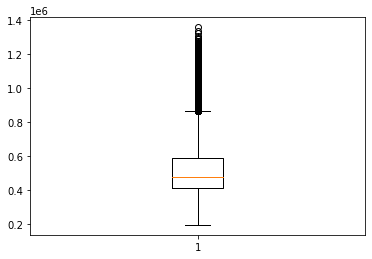

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

outlier_tracker = []
for i in range(len(hdb_resale['resale_price'])):
    resale_price = hdb_resale['resale_price'].iloc[i]
    outlier_tracker.append(resale_price)

np_outlier_tracker = np.array(outlier_tracker)

plt.boxplot(np_outlier_tracker)
fig = plt.figure()
fig.show()

# finding the 1st quartile
q1 = np.quantile(np_outlier_tracker, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(np_outlier_tracker, 0.75)
med = np.median(np_outlier_tracker)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

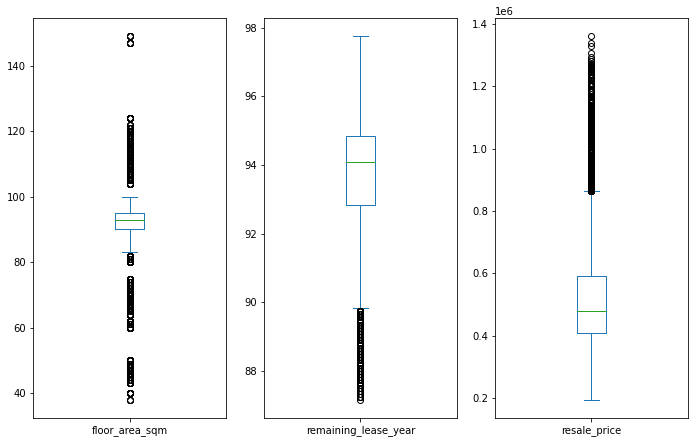

In [34]:
# Box Plot Before removing of outliers
data_numerics = hdb_resale[["floor_area_sqm", "remaining_lease_year", "resale_price"]]
data_numerics.plot(kind='box',  subplots=True, layout=(3, 5), figsize=(20, 25))
plt.show()

In [35]:
def outlier_threshold(col_name):
    Q1 = hdb_resale[col_name].describe()["25%"] 
    Q3 = hdb_resale[col_name].describe()["75%"]
    IQR = Q3 - Q1
    upper_threshold = Q3 + IQR * 1.5
    lower_threshold = Q1 - IQR * 1.5
    print("Variable:", col_name)
    print(f"Lower Threshold: {lower_threshold: .5f}")
    print(f"Upper Threshold: {upper_threshold: .5f}")

    num_below_threshold = len(hdb_resale[hdb_resale[col_name] < lower_threshold]) / len(hdb_resale)
    num_above_threshold = len(hdb_resale[hdb_resale[col_name] > upper_threshold]) / len(hdb_resale)

    print(f"Percentage of Outliers below Lower Threshold: {num_below_threshold * 100: .5f}%")
    print(f"Percentage of Outliers above Upper Threshold: {num_above_threshold * 100: .5f}%")
    print(f"Total Percentage of Outliers: {((num_above_threshold + num_below_threshold) * 100): .5f}%")
    print()


print("Analysis of Outliers:\n")
list_cols = ["floor_area_sqm", "remaining_lease_year", "resale_price"]
for i in list_cols:
    outlier_threshold(i)

Analysis of Outliers:

Variable: floor_area_sqm
Lower Threshold:  82.50000
Upper Threshold:  102.50000
Percentage of Outliers below Lower Threshold:  21.28423%
Percentage of Outliers above Upper Threshold:  19.95787%
Total Percentage of Outliers:  41.24210%

Variable: remaining_lease_year
Lower Threshold:  89.83333
Upper Threshold:  97.83333
Percentage of Outliers below Lower Threshold:  3.40173%
Percentage of Outliers above Upper Threshold:  0.00000%
Total Percentage of Outliers:  3.40173%

Variable: resale_price
Lower Threshold:  137342.00000
Upper Threshold:  864430.00000
Percentage of Outliers below Lower Threshold:  0.00000%
Percentage of Outliers above Upper Threshold:  4.60326%
Total Percentage of Outliers:  4.60326%



In [ ]:
def remove_outlier(list_remove_cols):
    list_tuples = []
    for i in list_remove_cols:
        Q1 = data[i].describe()["25%"]
        Q3 = data[i].describe()["75%"]
        IQR = Q3 - Q1
        lower_threshold = Q1 - IQR * 1.5
        upper_threshold = Q3 + IQR * 1.5
        threshold_tuple = (lower_threshold, upper_threshold)
        list_tuples.append(threshold_tuple)

    for i in range(len(list_tuples)):
        variable = list_remove_cols[i]
        threshold_tuple = list_tuples[i]
        print("Variable: ", variable)
        print("Number of rows before:", len(data))
        data.drop(data[data[variable] < threshold_tuple[0]].index, inplace=True)
        data.drop(data[data[variable] > threshold_tuple[1]].index, inplace=True)
        print("Number of rows after:", len(data))
        print()